<a href="https://colab.research.google.com/github/oleksandragolub/progetto-architettura-dati-with-ml/blob/main/AD_fase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Architettura Dati**

---
---

Università degli Studi Milano Bicocca \
CdLM Informatica — A.A 2024/2025

---
---

#### **Componenti del gruppo:**
— Oleksandra Golub (856706)

---
---


## **Esperimento base (senza rumore nei dati di training)**

### **Librerie e strumenti per il preprocessing e la modellazione in ML**



Queste righe di codice importano le librerie necessarie per il preprocessing dei dati, la gestione dei dataset e la loro visualizzazione, oltre a strumenti per il bilanciamento dei dati e l'implementazione di modelli di machine learning:
- **kagglehub** è una libreria per scaricare dataset direttamente da Kaggle (permette di scaricare automaticamente i dati senza doverli caricare manualmente).
- il modulo **os** permette di interagire con il sistema operativo (utile per verificare la posizione di un dataset scaricato).
- **pandas** è una libreria per la gestione e manipolazione dei dataset (permette di leggere, analizzare e trasformare i dati in formato tabellare).
- **matplotlib.pyplot** è una libreria per creare grafici e visualizzazioni (aiuta a visualizzare distribuzioni, istogrammi e grafici di correlazione).
- **seaborn** è una libreria per la visualizzazione avanzata dei dati basata su **matplotlib** (aiuta a creare grafici più leggibili e dettagliati per analizzare le relazioni tra le variabili).
- **numpy** è una libreria per il calcolo numerico e la gestione degli array (utilizzata per manipolare dati numerici, eseguire calcoli e operazioni vettorial).
- il modulo **scipy.stats** fornisce funzioni per calcoli statistici avanzati. In particolare calcola l'intervallo di confidenza per una distribuzione t di Student.
- **SMOTE** (Synthetic Minority Over-sampling Technique) è una tecnica di oversampling per bilanciare dataset sbilanciati. Genera nuovi esempi sintetici della classe minoritaria (es. se i pazienti diabetici sono meno numerosi, SMOTE genera nuovi dati simili per bilanciare il dataset).
- **StandardScaler** e **PowerTransformer** sono strumenti per trasformare e normalizzare i dati:
  1.   **StandardScaler** ridimensiona i dati in modo che abbiano *media 0* e *deviazione standard 1* (necessario per molti algoritmi di ML).
  2.   **PowerTransformer** applica una trasformazione (es. logaritmica) per rendere più normale la distribuzione dei dati.
- **enable_iterative_imputer** è necessario per abilitare **IterativeImputer**, che è ancora un'API sperimentale in **scikit-learn** (permette di eseguire un'imputazione avanzata dei valori mancanti stimandoli in base alle altre feature).
- **IterativeImputer** è un metodo per riempire i valori mancanti nei dati in modo intelligente (stima i valori basandosi sulle altre feature, anziché usare semplici medie o mediane).
- **PCA** (analisi delle componenti principali) è una tecnica di riduzione della dimensionalità che trasforma le feature di un dataset in nuove variabili (componenti principali), preservando la massima varianza possibile.
- **Axes3D** è un modulo di **Matplotlib** che permette di creare grafici tridimensionali. Viene spesso usato con PCA per rappresentare i dati in uno spazio ridotto a 3 dimensioni.
- **train_test_split** è una funzione di **scikit-learn** per suddividere i dati in training set e test set (permette di addestrare il modello su una parte dei dati e testarlo su un'altra parte per valutarne le prestazioni).

Strumenti per la gestione della cross-validation e l'ottimizzazione del modello:
- **KFold** divide il dataset in k sottoinsiemi (fold) per valutare le performance del modello in modo più robusto.
- **StratifiedKFold** è un variante di KFold che mantiene la stessa distribuzione delle classi in ogni fold, utile per dataset sbilanciati.
- **cross_val_score** esegue la cross-validation e restituisce i punteggi delle metriche scelte per ogni fold.
- **cross_validate** permette di valutare più metriche contemporaneamente durante la cross-validation.
- **GridSearchCV** esegue una ricerca esaustiva dei migliori iperparametri testando tutte le combinazioni specificate.
- **RandomizedSearchCV** simile a GridSearchCV, ma esplora casualmente solo alcune combinazioni, rendendolo più veloce.
- **uniform, randint, loguniform** da **scipy.stats** definiscono distribuzioni casuali per la ricerca degli iperparametri in **RandomizedSearchCV**.
- **make_scorer** consente di creare metriche personalizzate per la valutazione del modello.
- **Patch** viene usato per personalizzare le legende nei grafici.
- **cm (colormap)** è la libreria di **matplotlib** per gestire le mappe di colori nei grafici.

Modelli di Machine Learning:
- **DecisionTreeClassifier** implementa un albero di decisione, un modello che suddivide i dati in base a domande sequenziali per fare previsioni.
- **plot_tree** è una funzione che permette di visualizzare la struttura dell'albero di decisione addestrato. È utile per interpretare il modello, capire quali feature sono state utilizzate per le suddivisioni e come il modello prende le decisioni.
- **LogisticRegression** è un modello statistico di classificazione binaria basato sulla funzione logistica (sigmoide). Stima la probabilità che un'osservazione appartenga a una classe specifica.
- **SVC (Support Vector Classifier)** è un potente modello per la classificazione. Trova un iperpiano ottimale che separa le classi massimizzando la distanza tra loro. Può utilizzare diversi kernel (lineare, polinomiale, RBF, ecc).
- **GaussianNB (Naive Bayes Gaussiano)** è basato sul **Teorema di Bayes**, assume che le feature siano indipendenti tra loro. La variante GaussianNB è utilizzata quando le feature seguono una distribuzione normale (gaussiana). È molto veloce e adatto a dataset di grandi dimensioni.
- **RandomForestClassifier** è un modello ensemble che combina più alberi di decisione per migliorare l'accuratezza e ridurre l'overfitting. Ogni albero riceve un sottoinsieme casuale dei dati (bagging) e fa una previsione. Il risultato finale è dato dalla maggioranza delle previsioni degli alberi. È molto potente, flessibile e meno sensibile ai dati rumorosi.

Metriche di valutazione dei modelli:
- **accuracy_score(y_true, y_pred)** serve per calcolare l'accuratezza, ossia la percentuale di previsioni corrette.
- **precision_score(y_true, y_pred)** serve per indicare la percentuale di predizioni corrette tra quelle che il modello ha classificato come positive. Utile per problemi con classi sbilanciate.
- **recall_score(y_true, y_pred)** serve per misurare quanti dei veri positivi il modello è riuscito a identificare.
- **f1_score(y_true, y_pred)** serve per ottenere la media armonica tra precisione e recall. Utile quando è importante trovare un bilanciamento tra precisione e recall.
- **confusion_matrix(y_true, y_pred)** serve per creare una matrice di confusione, che mostra il numero di predizioni corrette e errate suddivise per classe. Utile per analizzare dove il modello sta sbagliando.
- **roc_curve(y_true, y_score)** misura la capacità di un modello di classificazione binaria nel distinguere tra classi positive e negative. Mostra la relazione tra il True Positive Rate (TPR) e il False Positive Rate (FPR) a diversi livelli di soglia.
- **auc(fpr, tpr)** è una metrica (Area Under Curve) che misura l'area sotto la curva ROC (Receiver Operating Characteristic). Un valore di AUC=1 indica un classificatore perfetto, mentre AUC=0.5 indica un classificatore casuale. Da notare che L'AUC è particolarmente utile quando si confrontano diversi modelli: più è alto, migliore è la capacità predittiva del modello.



In [ ]:
import kagglehub
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint, loguniform

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, make_scorer
from matplotlib.patches import Patch
from matplotlib import cm

---
---
### **Dataset**

Queste righe di codice servono per scaricare, caricare e verificare il dataset sui pazienti diabetici:
1. Scaricamento del dataset da Kaggle
  - si utilizza `kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")` per scaricare automaticamente il dataset "`diabetes-dataset-using-many-medical-metrics`" da [Kaggle](https://www.kaggle.com/datasets/lara311/diabetes-dataset-using-many-medical-metrics/data).
  - la variabile `dataset_path` conterrà il percorso della cartella in cui il dataset è stato salvato.
  - il percorso del dataset viene stampato per verificare che l'operazione sia riuscita correttamente.

2. Definizione del percorso locale del dataset
  - `dataset_path` viene definito manualmente per specificare dove è stato scaricato il dataset.
  - normalmente, kagglehub salva i file in una cartella cache, quindi impostiamo manualmente il percorso corretto per evitarne la ricerca.
  - alcune versioni di kagglehub non restituiscono il percorso completo del dataset, quindi questa operazione aiuta a evitare problemi di accesso ai file.

3. Verifica dei file scaricati
  - `os.listdir(dataset_path)` stampa l'elenco dei file presenti nella cartella del dataset.
  - questo permette di verificare quali file sono stati effettivamente scaricati.
  - è utile soprattutto quando non si è sicuri del nome esatto del file CSV nel dataset.

4. Caricamento del dataset in Pandas
  - `pd.read_csv(dataset_path + "/diabetes (1).csv")` legge il file CSV e lo carica in un DataFrame Pandas.

Ora il dataset è pronto per essere esplorato e analizzato con Pandas!

In [ ]:
dataset_path = kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")
print("Il dataset è stato scaricato in:", dataset_path)

# Use the path returned by kagglehub.dataset_download instead of a hardcoded path
# dataset_path = "/root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1"

print(os.listdir(dataset_path))

df = pd.read_csv(dataset_path + "/diabetes (1).csv")

100%|██████████| 8.92k/8.92k [00:00<00:00, 3.07MB/s]

Extracting files...
Il dataset è stato scaricato in: /root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1
['diabetes (1).csv']


* `df.head()` restituisce le prime 5 righe (di default) del DataFrame Pandas. È utile per verificare se i dati sono stati caricati correttamente e per analizzare un'anteprima del dataset.

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

*  `df` visualizza tutto il dataset presente nel DataFrame Pandas.

In [ ]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

#### **Casting delle colonne e/o target**


È essenziale verificare e, se necessario, effettuare il cast dei tipi delle feature e del target. Questo passaggio garantisce che i dati vengano interpretati correttamente durante le analisi, evitando errori dovuti a una rappresentazione errata o incoerente dei tipi di dati disponibili.

*   `df.dtypes` determina se una colonna contiene numeri interi (int64), numeri decimali (float64), stringhe (object), valori booleani (bool), o categorie (category).
*   `dtype: object` significa che l'elenco dei tipi di dato è memorizzato come un oggetto generico in Pandas.

In [ ]:
# Tipi di dato per capire se servono cast
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Da notare che la colonna `Outcome` deve essere castata a `category`, perché rappresenta una variabile categorica (classi 0 e 1).

Per il resto delle colonne non è necessario alcun cast. Le variabili sono già correttamente rappresentate come float64 per valori continui o int64 per valori discreti.

In [ ]:
# Cast della colonna Outcome a category
df['Outcome'] = df['Outcome'].astype('category')

# Verifica dei tipi aggiornati
df.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

#### **Controllo iniziale del dataset**


Questa sezione include una serie di analisi preliminari per comprendere la struttura, la distribuzione e le relazioni tra le feature del dataset prima di qualsiasi preprocessing.

*   `df.shape` mostra il numero di righe e colonne del dataset.


In [ ]:
df.shape

(768, 9)

* `df.isnull().sum()` è un comando che consente di verificare la presenza di valori mancanti (nulli) in ogni colonna di un DataFrame.

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Siccome non è necessario eliminare i valori nulli, procediamo con:

* `df.duplicated()` è un comando che permette di identificare il numero di righe duplicate all'interno di un DataFrame.

In [ ]:
df.duplicated().sum()

np.int64(0)

Siccome non è necessario eliminare i valori duplicati, procediamo con:
*  `df.info()` fornisce informazioni riassuntive sulla struttura del DataFrame Pandas, dove:
  - `<class 'pandas.core.frame.DataFrame'>` indica che il dataset è un DataFrame Pandas.
  - `RangeIndex: 768 entries, 0 to 767` indica che il dataset ha 768 righe, numerate da 0 a 767.
  - `Data columns (total 9 columns)`indica che il dataset contiene 9 colonne.
  - Dettagli delle colonne includono i nominativi delle colonne, Non-Null Count (si vede che tutte le colonne hanno 768 valori non nulli, quindi non ci sono valori mancanti) e Dtype (per indicare colonne che contengono numeri interi e colonne che contengono numeri decimali)
  - `dtypes: category(1), float64(2), int64(6)`,  indica che nel dataset ci sono 1 colonna con tipo categorico, 2 colonne con tipo float64 (numeri decimali) e 6 colonne con tipo int64 (numeri interi).
  - `memory usage: 54.1 KB`indica che il dataset occupa 49.0 KB di memoria.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


#### **Descrizione del dataset**


Il dataset analizza le caratteristiche cliniche di pazienti per la classificazione binaria della presenza o assenza di diabete. Ogni riga rappresenta un paziente, mentre le colonne contengono misurazioni mediche e dati anamnestici.

##### **Feature del dataset**
Le variabili disponibili nel dataset includono misurazioni fisiologiche, anamnestiche e indici metabolici, espressi come valori numerici continui o interi:

- Pregnancies: numero di gravidanze della paziente (solo per donne, nei dati non è specificato il sesso).
- Glucose (mg/dL): livello di glucosio nel sangue a digiuno.
- BloodPressure (mmHg): pressione arteriosa diastolica.
- SkinThickness (mm): spessore della pelle del tricipite, indicativo del grasso corporeo sottocutaneo.
- Insulin (µU/mL): livello di insulina nel sangue.
- BMI (kg/m²): indice di massa corporea, utile per valutare il peso corporeo rispetto all'altezza.
- DiabetesPedigreeFunction: funzione che stima la probabilità di sviluppare diabete in base alla storia familiare (valori più alti indicano una maggiore predisposizione genetica).
- Age (anni): età del paziente.
- Outcome: variabile target (0 = non diabetico, 1 = diabetico).

##### **Tipologia dei dati**
- Le feature sono numeriche continue e discrete.
- La variabile Outcome è categorica binaria (0/1).

##### **Obiettivo dell’analisi**
L’obiettivo del dataset è costruire un modello di classificazione binaria per predire la presenza di diabete in base ai valori clinici dei pazienti.

#### **Analisi del dataset**


##### **Distribuzione delle classi nel dataset**


L'analisi della distribuzione delle classi nel dataset è essenziale per comprendere eventuali squilibri, perciò procediamo con:

* `df["Outcome"].value_counts()` restituisce il conteggio di ogni valore unico presente nella colonna `Outcome` del DataFrame Pandas. Questo è utile per verificare la distribuzione delle classi nel dataset e **determinare se è bilanciato o meno**.
  - colonna `Outcome` del DataFrame rappresenta l'etichetta target, dove `1` indica la presenza di diabete, mentre `0` indica l'assenza di diabete.
  - `.value_counts()` conta il numero di occorrenze di ciascun valore unico presente nella colonna.


In [ ]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

* sns.countplot(x='Outcome', data=df):
  - si usa **seaborn**, una libreria per la visualizzazione dei dati, per creare un grafico a barre che conta la frequenza di ciascun valore nella colonna `Outcome`.
  - `x='Outcome'` specifica che i valori della colonna `Outcome` saranno visualizzati sull'asse x.
  - `data=df` specifica che i dati sono contenuti nel DataFrame `df`.

In altre parole, questo blocco di codice è usato per visualizzare graficamente la distribuzione delle classi nella colonna `Outcome` del dataset. Questa distribuzione rappresenta il bilanciamento tra i valori target, ossia `0` (assenza di diabete) e `1` (presenza di diabete).

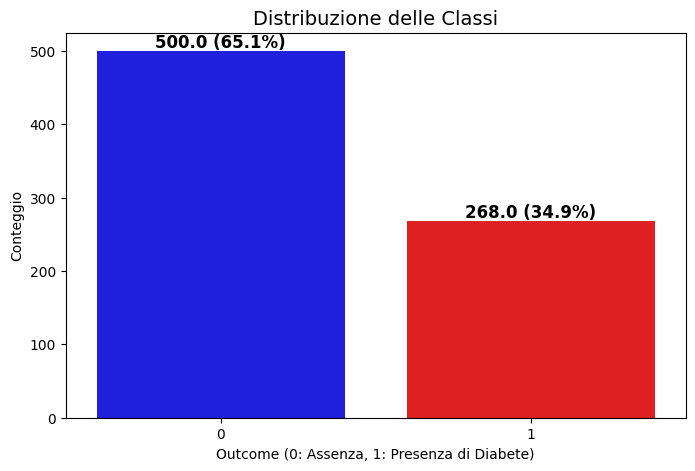

In [ ]:
# Creiamo il grafico con conteggio delle classi
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Outcome', data=df, hue='Outcome', palette=['blue', 'red'], legend=False)

# Impostiamo titolo e assi
plt.title("Distribuzione delle Classi", size=14)
plt.xlabel("Outcome (0: Assenza, 1: Presenza di Diabete)")
plt.ylabel("Conteggio")

# Calcoliamo il numero totale di esempi
total = len(df)

# Aggiungiamo le etichette con la percentuale sopra ogni barra
for p in ax.patches:
    height = p.get_height()  # Altezza della barra
    if height > 0:
        percentage = '{:.1f}%'.format(100 * height / total)  # Percentuale
        ax.text(p.get_x() + p.get_width()/2., height + 5,  # Posizione del testo
                f'{height} ({percentage})',
                ha="center", fontsize=12, fontweight="bold", color="black")

# Mostriamo il grafico
plt.show()


Interpretazione:
  - Valore 0 (assenza di diabete): si verifica 500 volte nel dataset.
  - Valore 1 (presenza di diabete): si verifica 268 volte nel dataset. \

Dunque, questo mostra che **il dataset non è bilanciato**, perché la classe 0 (assenza di diabete) è molto più numerosa della classe 1 (presenza di diabete). Questa situazione può influenzare negativamente i modelli di machine learning, rendendoli meno efficaci nel predire la classe meno rappresentata.


##### **Dettagli del dataset**


Andando avanti con l'analisi dei dettagli del dataset, possiamo individuare diverse anomalie nei dati, perciò procediamo con:

- `df.describe()` mostra le statistiche principali di ogni feature numerica:
media, deviazione standard, minimo, massimo, quartili (25%, 50%, 75%).
Aiuta a individuare valori anomali (outlier) o distribuzioni non bilanciate.

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

Conclusioni:
- I **valori 0** in Glucose, BloodPressure e BMI sono chiaramente **errori** e vanno sostituiti.
- SkinThickness e Insulin **potrebbero contenere** veri **valori nulli**, ma bisogna verificare più dettagliatamente le colonne.
- Gli altri dati **non mostrano anomalie** evidenti.

Per adesso stabiliamo che i **valori 0** in Glucose, BloodPressure e BMI devono essere trattati come **dati mancanti** e **gestiti nel preprocessing**.

Adesso analizziamo le statistiche per **pazienti SENZA diabete**:

In [ ]:
# Statistiche per pazienti SENZA diabete
df_no_diabetes = df[df['Outcome'] == 0]
print("Statistiche per pazienti senza diabete:")
df_no_diabetes.describe()

Statistiche per pazienti senza diabete:


Pregnancies   Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.0000     500.000000     500.000000  500.000000   
mean      3.298000  109.9800      68.184000      19.664000   68.792000   
std       3.017185   26.1412      18.063075      14.889947   98.865289   
min       0.000000    0.0000       0.000000       0.000000    0.000000   
25%       1.000000   93.0000      62.000000       0.000000    0.000000   
50%       2.000000  107.0000      70.000000      21.000000   39.000000   
75%       5.000000  125.0000      78.000000      31.000000  105.000000   
max      13.000000  197.0000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  500.000000                500.000000  500.000000  
mean    30.304200                  0.429734   31.190000  
std      7.689855                  0.299085   11.667655  
min      0.000000                  0.078000   21.000000  
25%     25.400000                  0.229750   23.000000  
50%     30.050000                  0.336000   27.000000  
75%     35.300000                  0.561750   37.000000  
max     57.300000                  2.329000   81.000000

Conclusioni:
- L'insulina media è **anormalmente bassa**:
  - Il **25° percentile e il minimo sono 0**, il che suggerisce **errori nei dati**.
  - In un paziente sano, l'insulina a digiuno **non dovrebbe mai essere zero**!

- Molti valori di SkinThickness sono **pari a 0**:
  - Il **minimo è 0** e il **25° percentile è 0**, il che significa che **almeno il 25%** dei pazienti sani ha **SkinThickness = 0**.
  - Questo **è anormale**, poiché lo spessore cutaneo **non dovrebbe mai essere esattamente 0** negli individui sani.

- Altri parametri sembrano coerenti:
  - Glucose indica la media di 109.98, nella norma per non diabetici.
  - BloodPressure indica la media di 68.19, valore realistico.
  - BMI indica la media di 30.30, leggermente sopra la norma (sovrappeso).
  - Age indica la media di 31.19, con un intervallo tra 21 e 81 anni.

Questo significa che **i valori 0** di Insulin e SkinThickness **degli individui sani** devono essere trattati come **dati mancanti** e **gestiti nel preprocessing**.

Adesso analizziamo le statistiche per **pazienti CON diabete**:

In [ ]:
# Statistiche per pazienti CON diabete
df_diabetes = df[df['Outcome'] == 1]
print("\nStatistiche per pazienti con diabete:")
df_diabetes.describe()


Statistiche per pazienti con diabete:


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  141.257463      70.824627      22.164179  100.335821   
std       3.741239   31.939622      21.491812      17.679711  138.689125   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.750000  119.000000      66.000000       0.000000    0.000000   
50%       4.000000  140.000000      74.000000      27.000000    0.000000   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  268.000000                268.000000  268.000000  
mean    35.142537                  0.550500   37.067164  
std      7.262967                  0.372354   10.968254  
min      0.000000                  0.088000   21.000000  
25%     30.800000                  0.262500   28.000000  
50%     34.250000                  0.449000   36.000000  
75%     38.775000                  0.728000   44.000000  
max     67.100000                  2.420000   70.000000

Conclusioni:
- Molti valori di Insulin sono 0 per i diabetici:
  - Il **minimo è 0** e il **25° e 50° percentile sono 0**, il che significa che **almeno il 50%** dei pazienti diabetici ha **Insulin = 0**.
  - Questo **è anomalo**, perché nei pazienti diabetici (soprattutto quelli **con diabete di tipo 2**) i livelli di insulina sono generalmente **più alti** a causa dell'insulino-resistenza.
  - Tuttavia, se **la maggior parte dei dati** proviene da pazienti con **diabete di tipo 1**, allora è plausibile, poiché in questi soggetti il pancreas **non produce insulina** o ne **produce quantità minime**.

- Molti valori di SkinThickness sono 0 per i diabetici:
  - Il **minimo è 0** e il **25° percentile è 0**, il che significa che **almeno il 25%** dei pazienti diabetici ha **SkinThickness = 0**.
  - Questo è **potenzialmente un errore** nei dati, perché lo spessore cutaneo **non dovrebbe essere esattamente 0**.
  - Tuttavia, **è possibile** che alcuni pazienti diabetici abbiano effettivamente **un livello di grasso sottocutaneo molto basso**, soprattutto se **soffrono di distrofia lipoatrofica** o **perdita di massa grassa dovuta a diabete scarsamente controllato**.

- Altri parametri sembrano coerenti.

Dunque, scegliemo di **non gestire** i casi di **Insulin = 0** e **SkinThickness = 0** per gli **individui diabetici**.


##### **Statistiche del dataset**


Le statistiche di skewness (asimmetria) e kurtosis (curtosi) ci dicono quali variabili hanno una distribuzione non normale e necessitano di trasformazioni nella fase di preprocessing per migliorare la qualità del modello.

Procediamo con l'analisi della Skewness (Asimmetria):

- `skew()` indica quanto la distribuzione è sbilanciata a destra o a sinistra:
  - **Skewness > 0** significa la distribuzione sbilanciata **a destra** (coda più lunga a destra).
  - **Skewness < 0** significa la distribuzione sbilanciata **a sinistra** (coda più lunga a sinistra).

In [ ]:
# Selezioniamo solo le colonne numeriche (escludendo 'Outcome')
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calcoliamo la skewness per le feature numeriche
print("Skewness (Asimmetria):")
df[numeric_columns].skew()

Skewness (Asimmetria):


Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64

Conclusioni:
- Pregnancies e Age sono le variabili più **sbilanciate a destra**, quindi potremmo **applicare trasformazioni logaritmiche o sqrt** per renderle più normali.
- Glucose e BMI hanno una **lieve asimmetria**, quindi sono **quasi normali**.
- BloodPressure, SkinThickness e Insulin sono **quasi simmetriche** e **non necessitano di trasformazioni**.


Andando avanti con l'analisi della Kurtosis (Curtosi):
- `.kurtosis()` indica la forma della distribuzione rispetto alla normale:
  - **Kurtosis > 0** indica la distribuzione leptocurtica (più appuntita, più valori concentrati al centro e più code).
  - **Kurtosis < 0** indica la distribuzione platicurtica (più piatta, meno concentrata al centro).

In [ ]:
# Calcoliamo la kurtosis per le feature numeriche
print("\nKurtosis (Curtosi):")
df[numeric_columns].kurtosis()


Kurtosis (Curtosi):


Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
dtype: float64

Conclusioni:
- BloodPressure, BMI e Age sono più leptocurtiche (più **concentrate al centro** con code più pronunciate).
- Insulin e DiabetesPedigreeFunction sono molto platicurtiche (distribuzione **molto sparsa e appiattita**).
- SkinThickness e Glucose sono **leggermente** platicurtiche, ma **non in modo estremo**.



Cosa fare nel preprocessing:
- lavorare con le variabili con skewness elevata (fortemente asimmetriche), applicando una trasformazione:
  - Insulin (Skewness = 2.272, Kurtosis = 7.214)
  - DiabetesPedigreeFunction (Skewness = 1.919, Kurtosis = 5.594)

- lavorare con le variabili con kurtosis elevata (leptocurtiche) per controllare e trattare eventuali outlier:
  - BloodPressure (Kurtosis = 5.180) ha code molto lunghe, potrebbe contenere outlier.
  - BMI (Kurtosis = 3.290) ha tendenza leptocurtica, potrebbe contenere outlier.
  - Age (Kurtosis = 0.643) è leggermente leptocurtica, perciò non è necessaria una trasformazione, ma si può normalizzare.

---
---

### **Preprocessing del dataset**

#### **Preprocessing PRIMA dello split**

Obiettivo:

- Sostituire i valori 0 (non validi) con NaN solo dove ha senso;

- Rimuovere eventualmente outlier non fisiologici estremi;



In [ ]:
# Colonne che NON possono mai essere 0: Glucose, BloodPressure, BMI
columns_to_fix_all = ['Glucose', 'BloodPressure', 'BMI']
df[columns_to_fix_all] = df[columns_to_fix_all].replace(0, np.nan)

# Colonne che impostiamo a NaN SOLO per pazienti sani
df.loc[df['Outcome'] == 0, 'Insulin'] = df.loc[df['Outcome'] == 0, 'Insulin'].replace(0, np.nan)
df.loc[df['Outcome'] == 0, 'SkinThickness'] = df.loc[df['Outcome'] == 0, 'SkinThickness'].replace(0, np.nan)

Verificiamo dei NaN creati:

In [ ]:
print("Valori mancanti dopo la sostituzione degli zeri:")
print(df.isnull().sum())

Valori mancanti dopo la sostituzione degli zeri:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               139
Insulin                     236
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Dopo aver identificato valori mancanti veri (che derivano da zeri clinicamente impossibili), si controllano eventuali outliner assurdi:

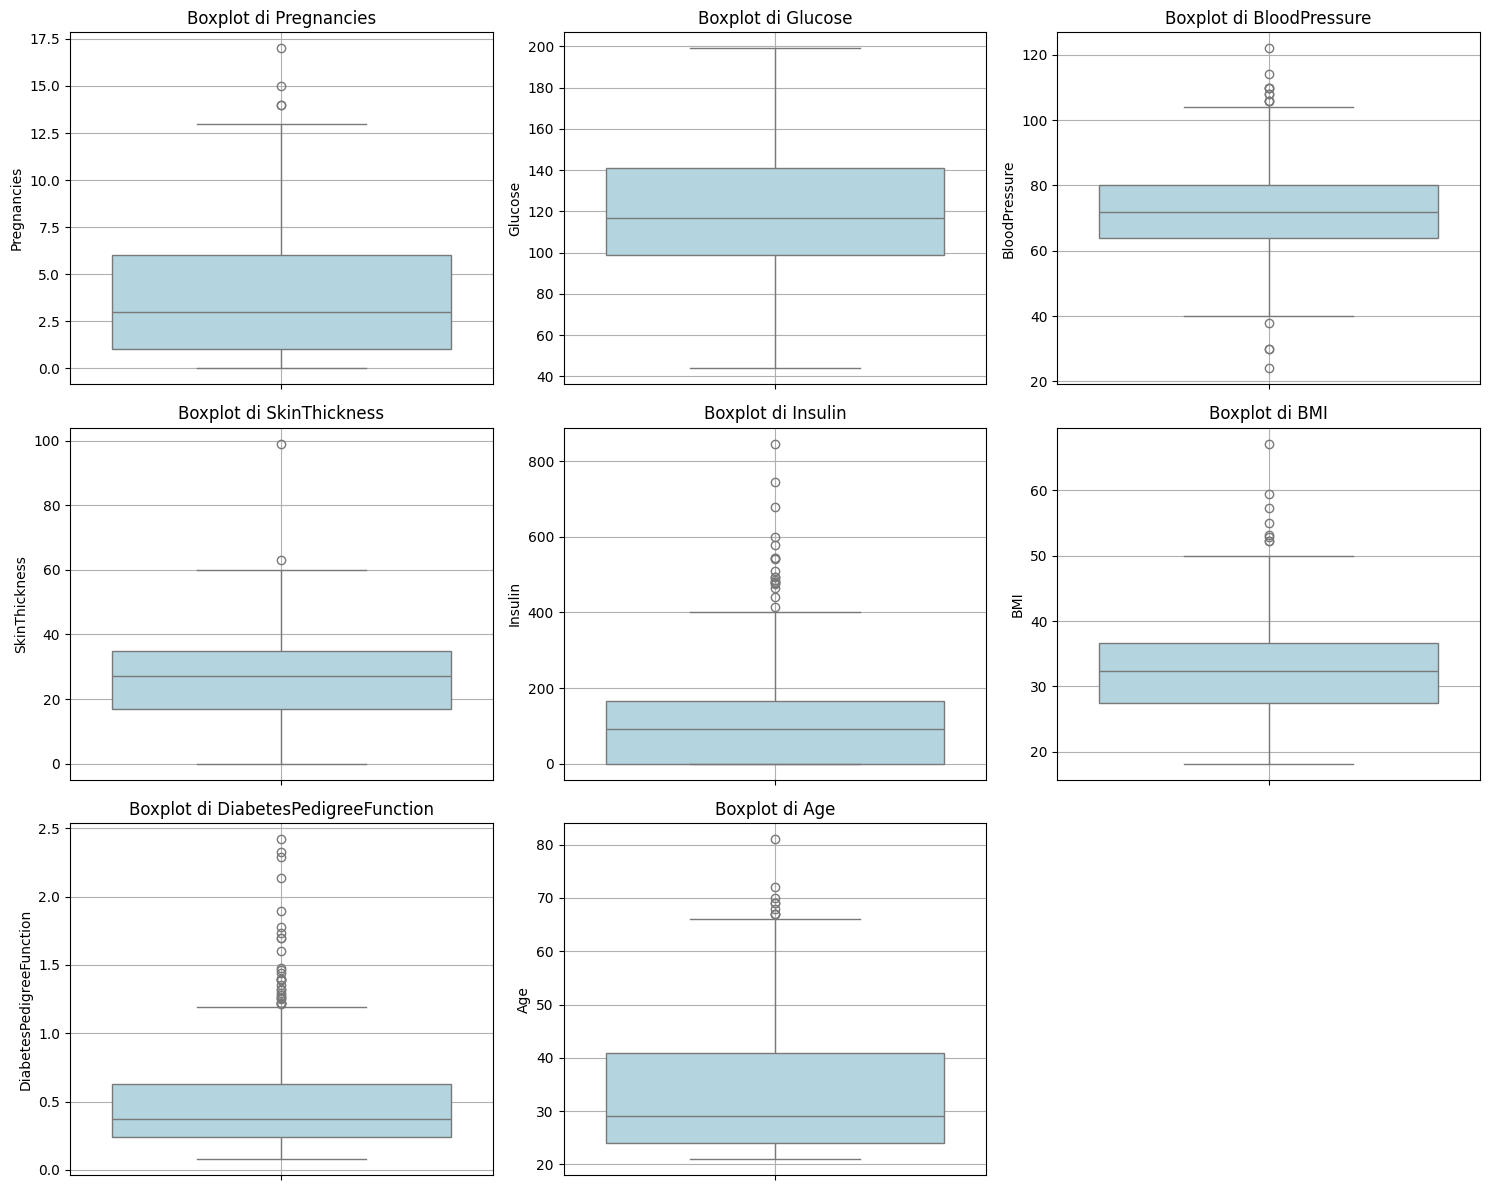

In [ ]:
# Seleziona tutte le colonne numeriche (esclude 'Outcome' se è category)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Layout automatico per subplot
n = len(numeric_cols)
rows = (n + 2) // 3  # max 3 colonne per riga
cols = 3

plt.figure(figsize=(5 * cols, 4 * rows))  # Adatta la dimensione

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot di {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

Conclusioni:
- Pregnancies:
  - Valori > 13 sono rari, ma clinicamente possibili nel caso di gravidanze multiple.

- Glucose:
  - Range da ~45 a ~200 è fisiologico.

- BloodPressure:
  - Valori < 30 sono dubbi, ma non impossibili.
  - Valori alti (fino a 122) sono plausibili in ipertensione.

- SkinThickness:
  - Il valore più alto è 99 ed è plausibile in persone obese, anche se raro.

- Insulin:
  - Outlier > 600 (fino a 850) possono causare varianza elevata, perciò meglio gestirli.

- BMI:
  - Outlier > 60–65: rari, ma possibili in casi di obesità grave.

- Age:
  - Outlier > 70–80 sono perfettamente realistici.

- DiabetesPedigreeFunction:
  - Valori > 2.0 sono plausibili (è un indice astratto).

Dunque, scegliemo di **gestire** il caso di **Insulin** con **Outlier > 600**.


In [ ]:
df.loc[df["Insulin"] > 600, "Insulin"] = np.nan

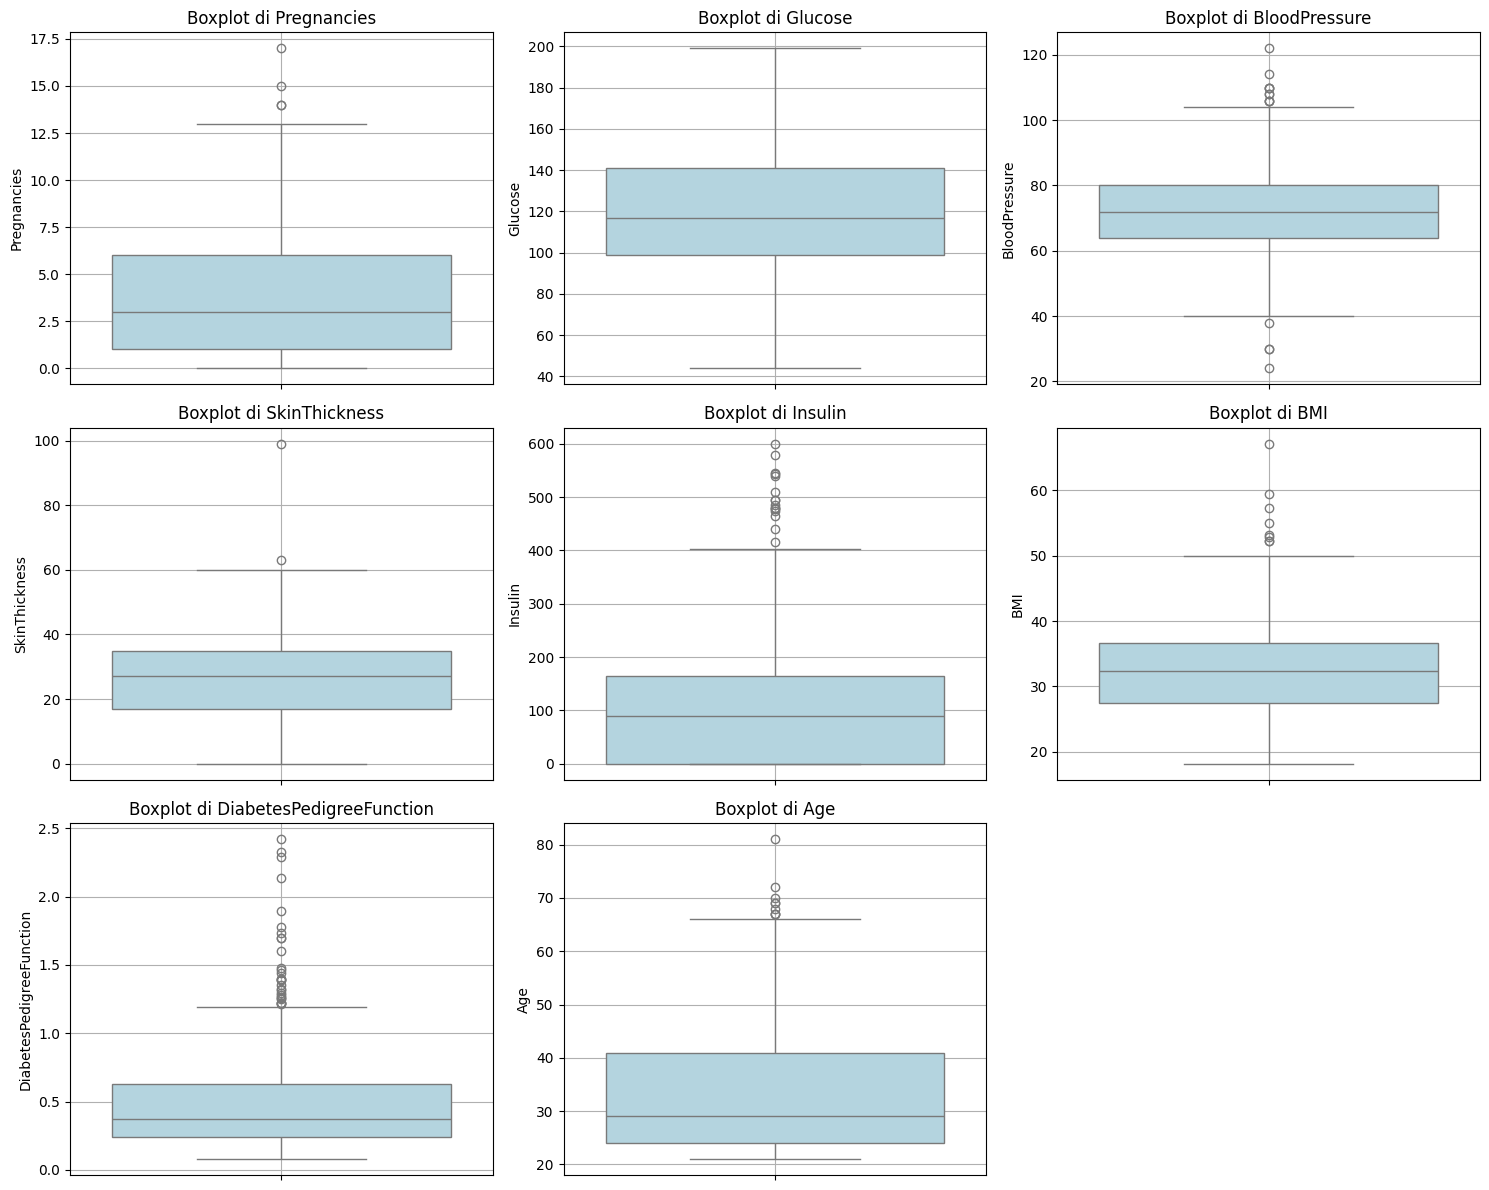

In [ ]:
# Seleziona tutte le colonne numeriche (esclude 'Outcome' se è category)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Layout automatico per subplot
n = len(numeric_cols)
rows = (n + 2) // 3  # max 3 colonne per riga
cols = 3

plt.figure(figsize=(5 * cols, 4 * rows))  # Adatta la dimensione

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot di {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

Dopo aver gestito i valori nulli e gli eventuali outlier, si suddivide il dataset in due blocchi:
- X_test, y_test: 20% dei dati che servono per il test set finale;
- X_temp, y_temp: 80% dei dati che servono per creare training (60%) + validation (20%);

In [ ]:
# Separazione X e y
X = df.drop("Outcome", axis=1) # tutte le feature
y = df["Outcome"] # la variabile target

# Primo split: 70% train, 30% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# Secondo split: 50% val, 50% test da quel 30% (=> 15% ciascuno)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# 60% train, 20% val, 20% test
print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Train set: (537, 8)
Validation set: (115, 8)
Test set: (116, 8)


#### **Preprocessing DOPO lo split**

###### **Gestione dei valori errati**


Prima di tutto vengono gestiti i valori mancanti (NaN) in X_train, X_val, X_test da non causare data leakage.

Si fa, usando algoritmo di IterativeImputer, che:
- Usa un modello di regressione per stimare i valori mancanti in ogni colonna;
- Sfrutta le altre colonne come predittori per stimare i NaN;
- Ripete il processo in più cicli (max_iter=10) per ottenere stime migliori;

In [ ]:
# si istanzia imputer
imputer = IterativeImputer(random_state=42, max_iter=10)

# si fitta e si transforma SOLO su X_train, ottenendo X_train_imputed senza più NaN
X_train_imputed = imputer.fit_transform(X_train) # il modello impara come stimare i valori mancanti e sostituisce i NaN in X_train con i valori stimati

# si applica solo transform su X_val e X_test
X_val_imputed = imputer.transform(X_val) #
X_test_imputed = imputer.transform(X_test)

# si usa lo stesso modello già fit-tato su X_train per riempire i NaN in X_val e X_test
# cosi la logica imparata da X_train viene applicata ai nuovi dati

In [ ]:
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)
X_val_imputed = pd.DataFrame(X_val_imputed, columns=X_val.columns, index=X_val.index)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)


###### **Standardizzazione delle feature**



  Questo pezzo di codice esegue la standardizzazione delle feature, un passaggio fondamentale del preprocessing per i modelli di machine learning.
  Tuttavia, prima di applicare la standardizzazione, mettiamo un'esempio delle distribuzioni attuali:


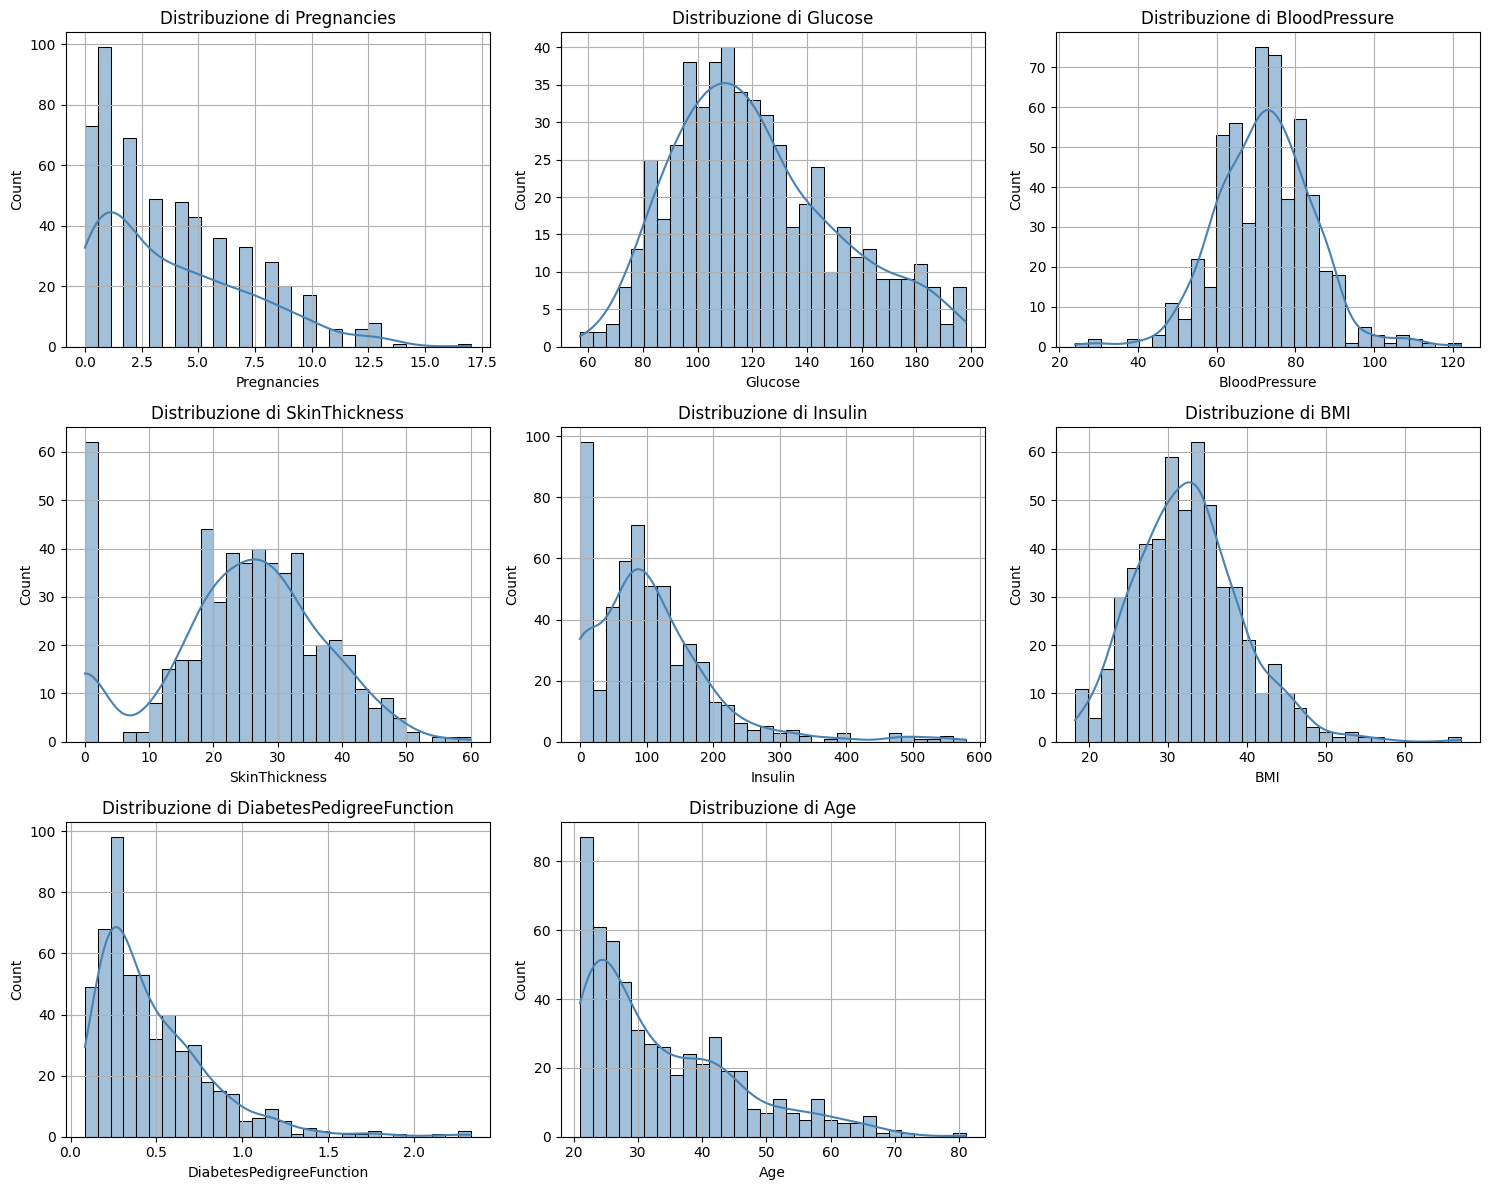

In [ ]:
# Se hai già un array NumPy, puoi ricostruire il DataFrame:
X_train_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Lista delle colonne
columns = X_train_df.columns.tolist()

# Layout dinamico
n = len(columns)
cols = 3
rows = (n + cols - 1) // cols

# Plot
plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(X_train_df[col], bins=30, kde=True, color='steelblue')
    plt.title(f'Distribuzione di {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

Per soddisfare le caratteristiche matematiche dei modelli, che verranno usati in seguito, si fa Il differenziamento del preprocessing:
- StandardScaler in RF/DT, ovvero sui modelli basati su soglie (lo split viene fatto sugli stessi valori, solo riscalati);
- StandardScaler + PowerTransformer in SVM/MLP, dove:
  - StandardScaler centra le feature (media = 0) e le scala (std = 1). Si fa dato che in MLP e SVM, se una feature ha un range molto grande, influenza troppo il modello.
  - PowerTransformer rende la distribuzione più simile a una gaussiana, riducendo la skewness (asimmetria), dato che SVM e MLP funzionano meglio con dati simmetrici, distribuiti in modo regolare. In più, aiuta i gradienti (MLP) a convergere meglio e più velocemente, mentre SVM fa affidamento sulle distanze tra punti (quindi la forma dei dati ha un effetto forte).

In [ ]:
# ============================
# === Per MLP e SVM =========
# ============================

# PowerTransformer per rimuovere skewness
pt = PowerTransformer(method='yeo-johnson')
X_train_pt = pt.fit_transform(X_train_imputed)
X_val_pt = pt.transform(X_val_imputed)
X_test_pt = pt.transform(X_test_imputed)

# StandardScaler per portare a media 0, std 1
scaler_mlp = StandardScaler()
X_train_mlp = scaler_mlp.fit_transform(X_train_pt)
X_val_mlp = scaler_mlp.transform(X_val_pt)
X_test_mlp = scaler_mlp.transform(X_test_pt)

# Ora X_train_mlp, X_val_mlp, X_test_mlp sono pronti per MLP e SVM

# ============================
# === Per RF e Decision Tree =
# ============================

# Solo scaling
scaler_rf = StandardScaler()
X_train_rf = scaler_rf.fit_transform(X_train_imputed)
X_val_rf = scaler_rf.transform(X_val_imputed)
X_test_rf = scaler_rf.transform(X_test_imputed)

# Ora X_train_rf, X_val_rf, X_test_rf sono pronti per RF e DT

Dai grafici si vede come le distribuzioni siano state ridimensionate e centrate, garantendo che tutte le variabili siano sulla stessa scala, essenziale per il corretto funzionamento di molti algoritmi di machine learning.

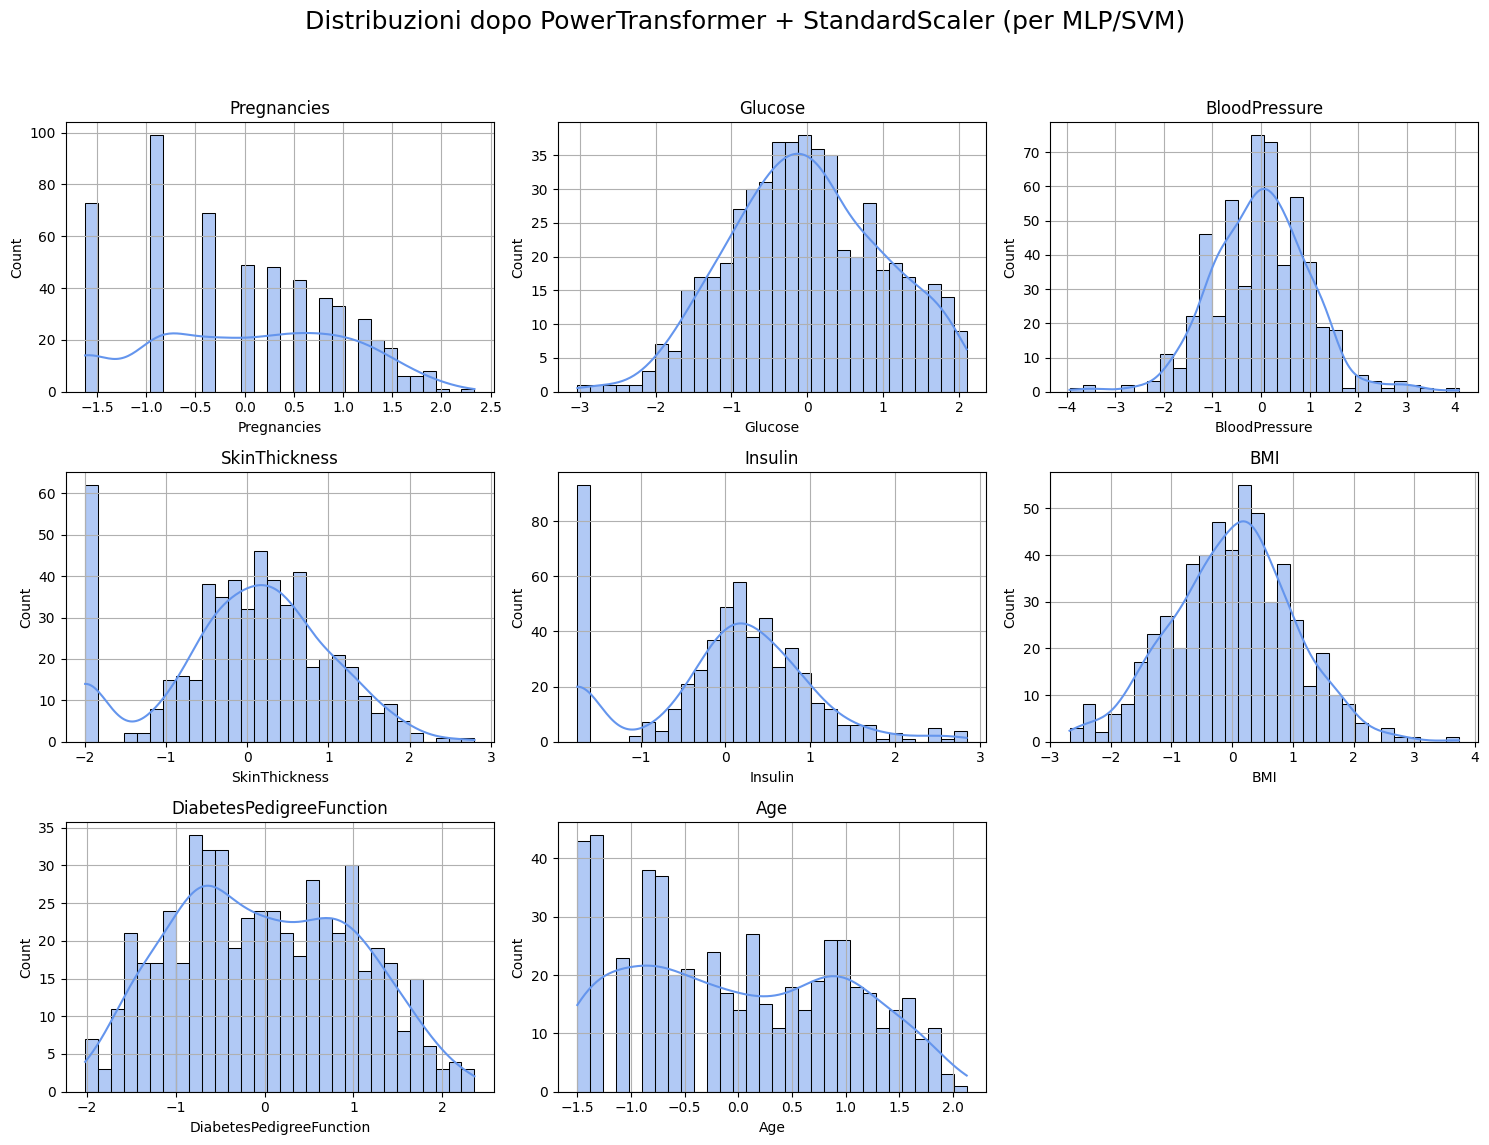

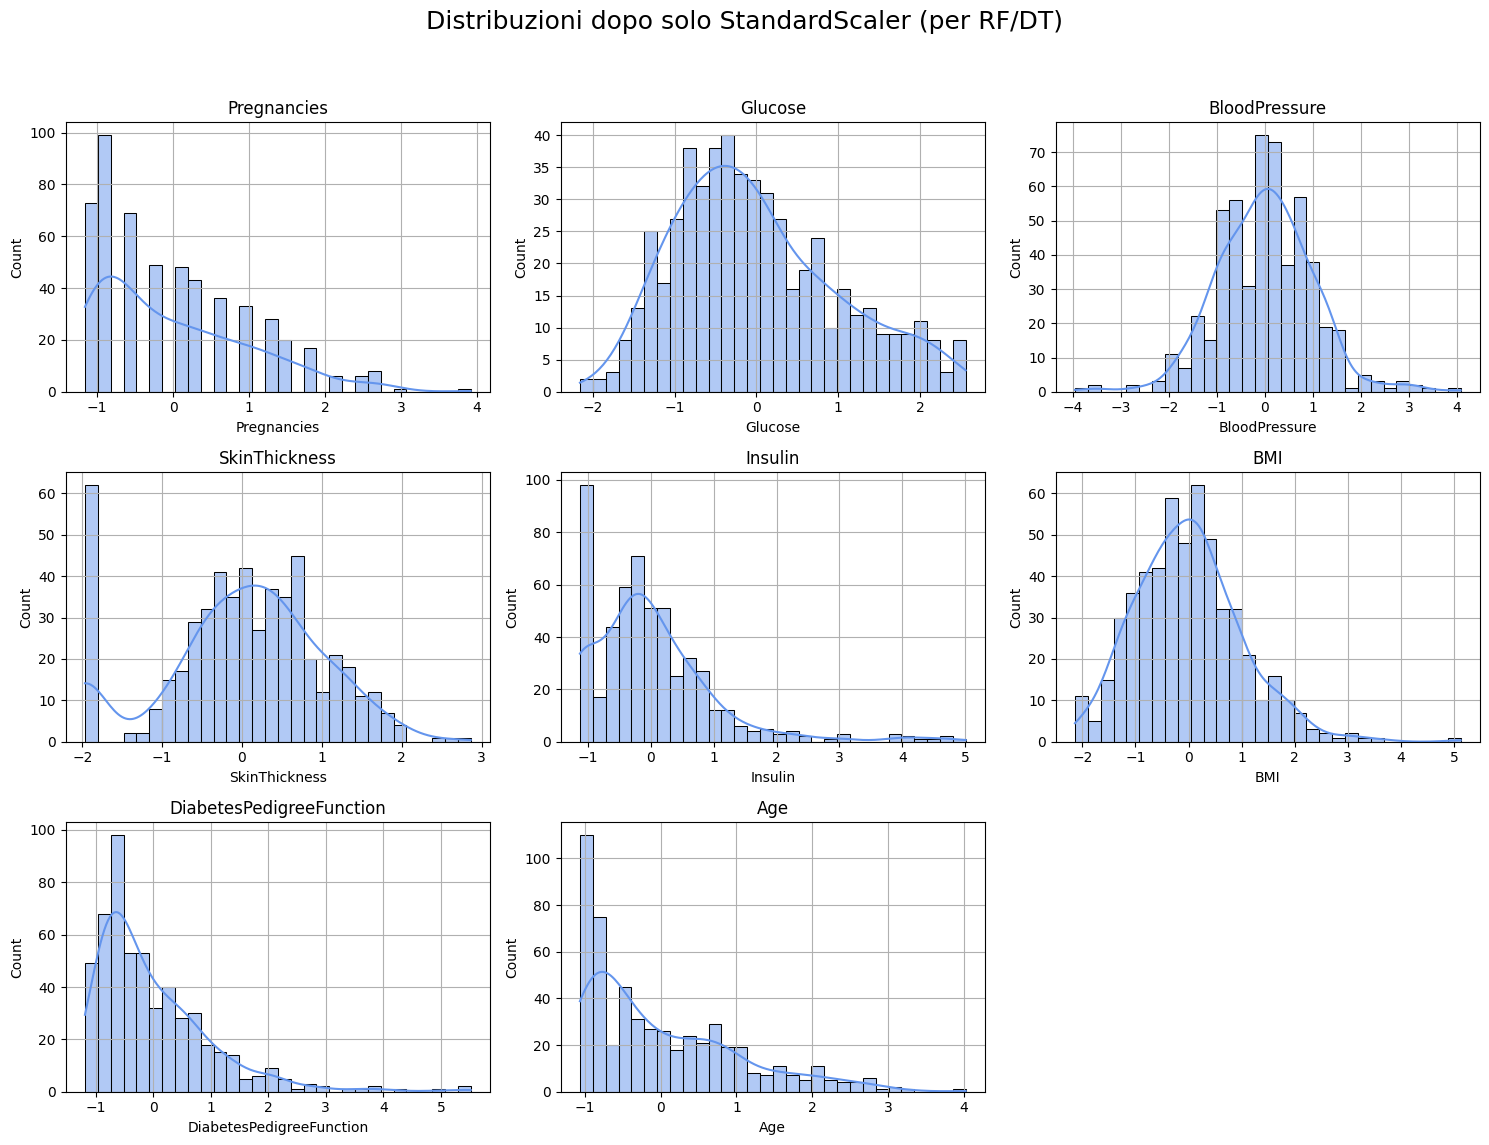

In [ ]:
# Feature names
feature_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
]

# Crea DataFrame per plot
X_train_mlp_df = pd.DataFrame(X_train_mlp, columns=feature_names)
X_train_rf_df = pd.DataFrame(X_train_rf, columns=feature_names)

# Funzione per grafico distribuzioni
def plot_distributions(df, title):
    n = len(df.columns)
    rows = (n + 2) // 3
    cols = 3
    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(df.columns):
        plt.subplot(rows, cols, i + 1)
        sns.histplot(df[col], kde=True, bins=30, color='cornflowerblue')
        plt.title(col)
        plt.grid(True)
    plt.suptitle(title, fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Visualizza
plot_distributions(X_train_mlp_df, "Distribuzioni dopo PowerTransformer + StandardScaler (per MLP/SVM)")
plot_distributions(X_train_rf_df, "Distribuzioni dopo solo StandardScaler (per RF/DT)")


Dai grafici si vede come le distribuzioni siano state ridimensionate e centrate, garantendo che tutte le variabili siano sulla stessa scala, essenziale per il corretto funzionamento di molti algoritmi di machine learning.

###### **Bilanciamento del dataset con SMOTE**



Questo pezzo di codice applica una tecnica per bilanciare i dataset sbilanciati.
- genera campioni sintetici per la classe minoritaria (nel nostro caso, Outcome=1, ovvero i pazienti diabetici) anziché duplicare semplicemente i dati esistenti.
- questo approccio aiuta a evitare problemi di overfitting che possono verificarsi quando si duplicano i dati reali.

In [ ]:
# === Per MLP / SVM ===
smote_mlp = SMOTE(random_state=42)
X_train_mlp_smote, y_train_mlp_smote = smote_mlp.fit_resample(X_train_mlp, y_train)

# === Per RF / DT ===
smote_rf = SMOTE(random_state=42)
X_train_rf_smote, y_train_rf_smote = smote_rf.fit_resample(X_train_rf, y_train)

print("MLP/SVM - Distribuzione dopo SMOTE:")
print(pd.Series(y_train_mlp_smote).value_counts())

print("\nRF/DT - Distribuzione dopo SMOTE:")
print(pd.Series(y_train_rf_smote).value_counts())

MLP/SVM - Distribuzione dopo SMOTE:
Outcome
0    350
1    350
Name: count, dtype: int64

RF/DT - Distribuzione dopo SMOTE:
Outcome
0    350
1    350
Name: count, dtype: int64


---
---

#### **Grafici e matrice di correlazione**

### **Grafici**

Questo pezzo di codice crea dei grafici di densità (KDE - Kernel Density Estimation) per ogni feature del dataset. I grafici mostrano la distribuzione probabilistica delle variabili, aiutando a visualizzare la forma dei dati e la loro variazione.

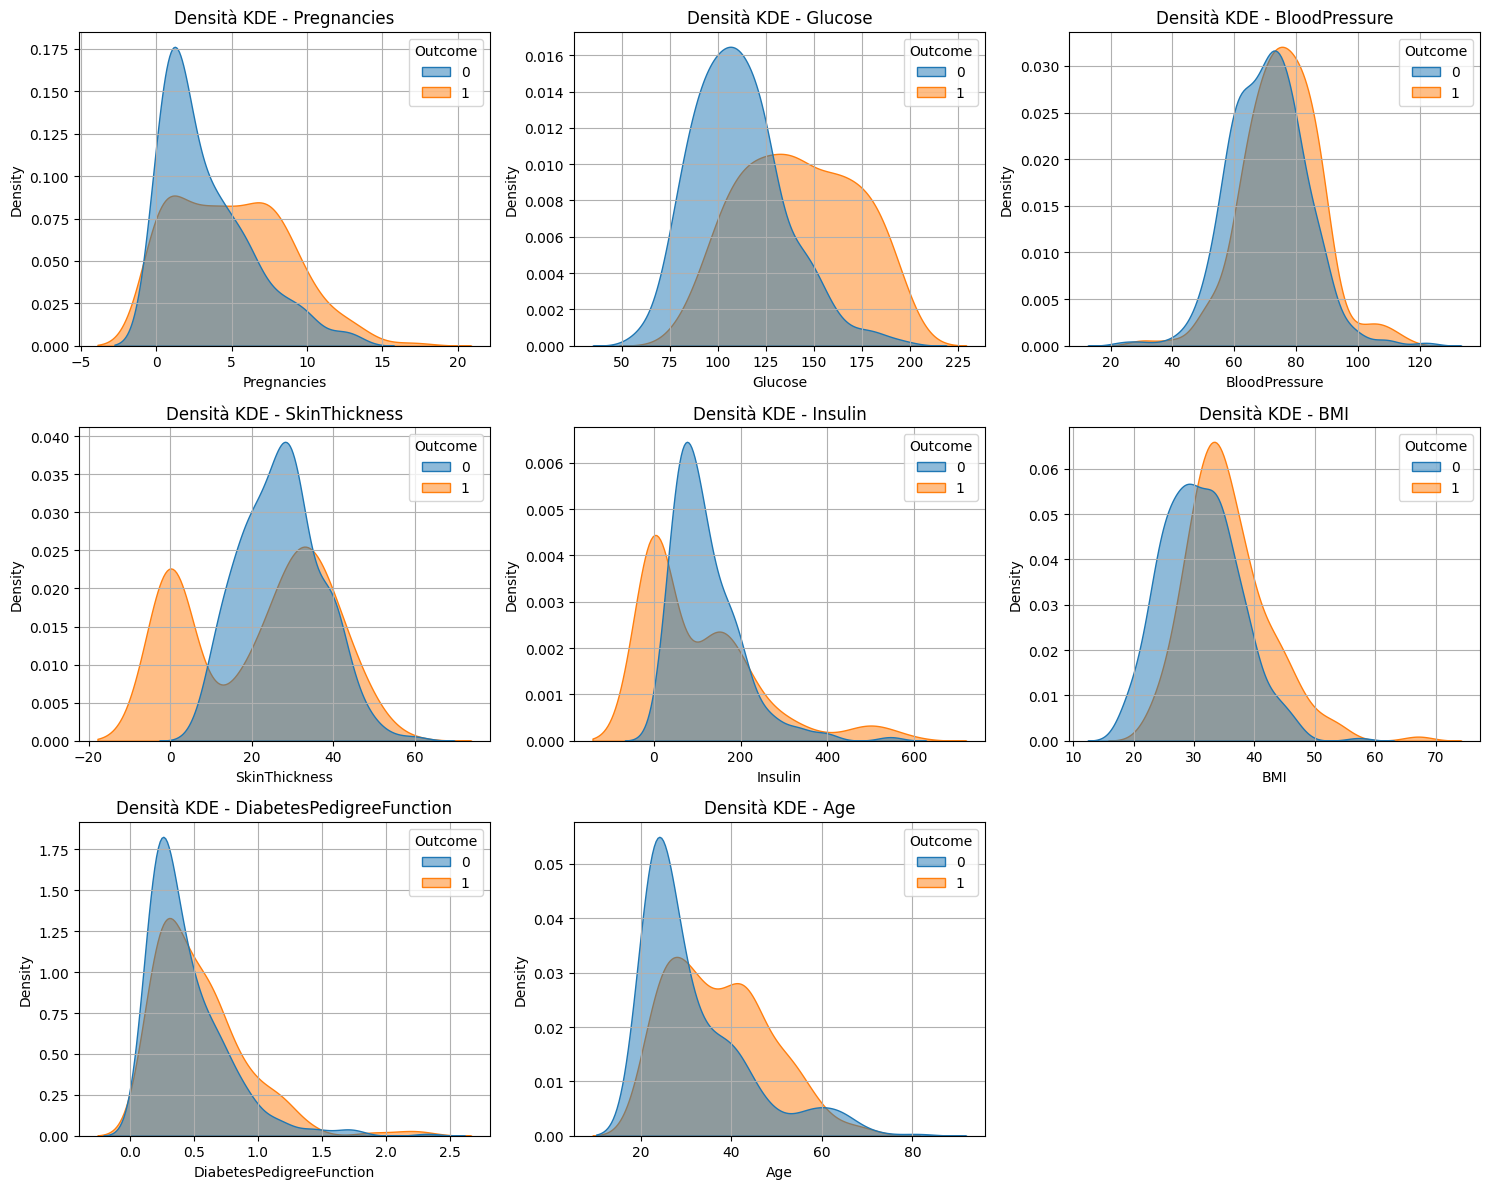

In [ ]:
# === Grafici KDE per ogni feature, divisi per classe ===

# Unisci X e y per plotting
df_plot = X_train.copy()
df_plot["Outcome"] = y_train

# Crea un plot KDE per ogni feature
cols = df_plot.drop("Outcome", axis=1).columns
n = len(cols)
cols_per_row = 3
rows = (n + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(5 * cols_per_row, 4 * rows))
for i, col in enumerate(cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.kdeplot(data=df_plot, x=col, hue="Outcome", common_norm=False, fill=True, alpha=0.5)
    plt.title(f'Densità KDE - {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()


##### **Matrice di correlazione**

Questo pezzo di codice visualizza una matrice di correlazione tra le feature numeriche nel dataset, rappresentata visivamente come una heatmap:
- ogni cella rappresenta la correlazione tra due variabili.
- colori diversi indicano l'intensità della correlazione.

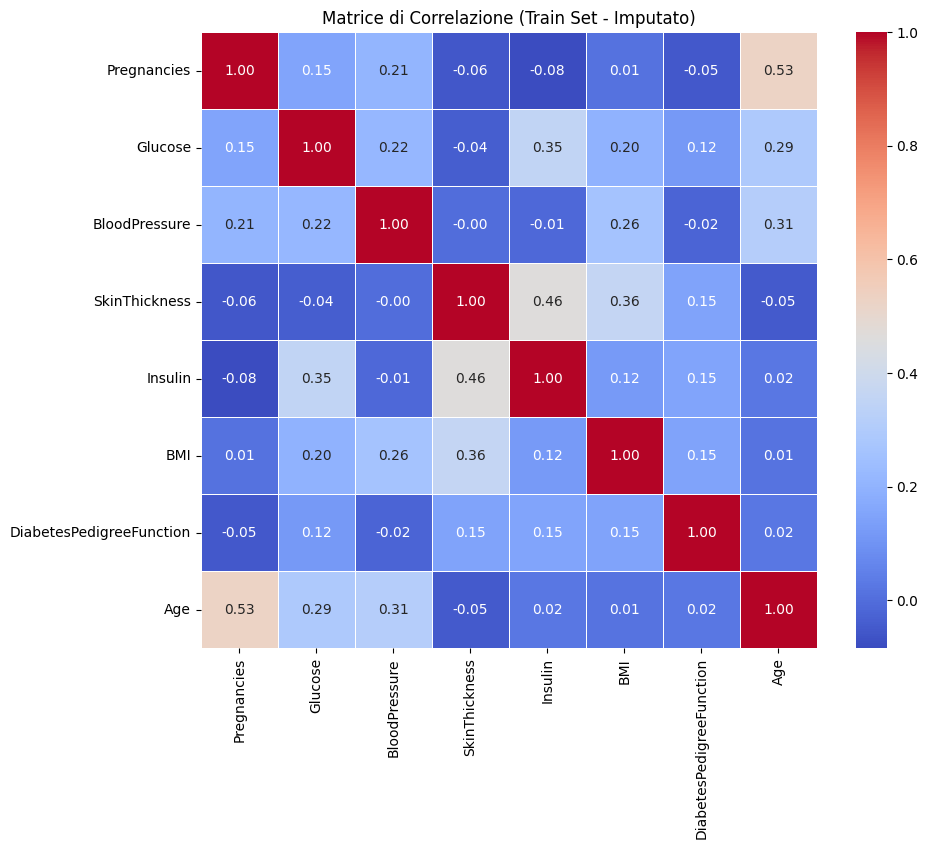

In [ ]:
# Calcolo su X_train imputed (prima dello scaling)
corr_matrix = X_train_imputed.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Matrice di Correlazione (Train Set - Imputato)")
plt.show()


Osservazioni generali:
1. Colore e valore della correlazione:
  - **blu scuro** indica correlazioni **deboli** o **negative**.
  - **rosso** più intenso indica correlazioni **forti** e **positive**.
  - valori **vicini a 1 o -1** indicano una correlazione **forte**.
  - valori **vicini a 0** indicano una correlazione **debole** o **assente**.

2. La diagonale principale (valore 1):
  - rappresenta la correlazione di ogni variabile **con se stessa** (sempre 1).

Relazioni chiave tra le variabili:
  - Pregnancies e Age (0.56):
    - Esiste una correlazione positiva significativa, che indica che **le donne con un'età maggiore tendono ad avere più gravidanze**, un **risultato atteso**.

  - SkinThickness e Insulin (0.40):
    - Esiste una correlazione moderata positiva, suggerendo che **un aumento dello spessore della pelle** (SkinThickness) **è associato a un aumento dei livelli di insulina**. Questo è coerente con la fisiologia, in quanto livelli elevati di insulina sono spesso legati a un maggiore accumulo di grasso sottocutaneo.

  - BMI e SkinThickness (0.38):
    - Esiste una correlazione moderata positiva, che riflette **la relazione tra l'indice di massa corporea e il grasso corporeo** misurato dal "SkinThickness".

  - Insulin e- Glucose (0.34):
    - Esiste una correlazione moderata positiva, suggerendo che un **chi ha più insulina ha spesso anche glucosio più alto (compatibile con resistenza insulinica o diabete di tipo 2, dove il corpo produce più insulina per compensare l’inefficacia)**.

  - BloodPressure e BMI (0.31):
    - Esiste una correlazione moderata positiva, che potrebbe indicare che **un aumento del BMI è associato a un lieve aumento della pressione sanguigna**. Questo è coerente con studi clinici che collegano sovrappeso/obesità a ipertensione.

  - BloodPressure e Age (0.30):
    - Esiste una correlazione moderata positiva, indicando che **l’età più avanzata tende ad associarsi a una pressione sanguigna più alta.**. Questo è coerente con studi clinici che collegano sovrappeso/obesità a ipertensione.

  - Glucose e Age (0.29):
    - Esiste una correlazione debole positiva, indicando che **l’età è debolmente associata a valori di glicemia più elevati.**. Infatti, invecchiando, si aumenta il rischio di alterazioni metaboliche come il pre-diabete o diabete di tipo 2.

  - Glucose e BloodPressure (0.24):
    - Esiste una correlazione debole positiva, indicando che **maggiore glicemia tende ad associarsi a una leggera elevazione della pressione arteriosa**. Questo è coerente con la sindrome metabolica, dove spesso si presentano insieme iperglicemia e ipertensione.

  - Pregnancies e BloodPressure (0.22):
    - Esiste una correlazione debole positiva, indicando che **all’aumentare del numero di gravidanze, si osserva una leggera tendenza all’aumento della pressione sanguigna**.

  - Glucose e BMI (0.21):
    - Esiste una correlazione debole positiva, suggerendo che un **maggiore livello di glucosio è leggermente associato a un BMI più alto**.

Di conseguenza possiamo tratte che variabili come **Glucose**, **BMI**, **Insulin** e **Age**, che mostrano **correlazioni significative con altre variabili**, potrebbero avere **un impatto maggiore sulla classificazione del diabete**.

---
---

### **Analisi delle Componenti Principali (PCA)**

Questo codice applica l'analisi delle componenti principali (PCA) per ridurre la dimensionalità dei dati mantenendo la maggior parte dell'informazione possibile. Generalmente serve per:
- Ridurre la complessità del modello:
  - Dataset con molte feature possono aumentare la complessità computazionale e introdurre problemi come l'overfitting.
  - PCA riduce il numero di feature trasformandole in componenti principali che sono combinazioni lineari delle feature originali, semplificando il modello.
- Eliminare la ridondanza nei dati:
  - In molti dataset, alcune feature possono essere altamente correlate tra loro, il che introduce ridondanza.
  - PCA identifica le direzioni di massima varianza, combinando le feature correlate in singole componenti principali.
- Mantenere la maggior parte dell'informazione:
  - Non tutte le feature contribuiscono in modo significativo alla varianza totale del dataset.
  - PCA ordina le componenti principali in base alla loro capacità di spiegare la varianza, permettendo di selezionare solo quelle che contengono la maggior parte dell'informazione.
- Migliorare le performance dei modelli:
  -  Alcuni modelli di machine learning funzionano meglio con un numero ridotto di feature e quando le feature non sono troppo correlate.
  - PCA trasforma le feature originali in componenti ortogonali (non correlate), migliorando la qualità dei dati per i modelli che assumono indipendenza delle variabili.



Funzionamento del codice:
1. Applicazione di PCA:
  - Il dataset originale viene trasformato in un nuovo spazio definito dalle componenti principali, che sono combinazioni lineari delle feature originali.
  - `X_pca` è il dataset trasformato nello spazio delle componenti principali.

2. Varianza spiegata:
  - Viene calcolata la proporzione di varianza spiegata da ciascuna componente principale rispetto alla varianza totale.
  - `explained_variance` è un array che mostra quanto ogni componente contribuisce alla spiegazione della varianza.

3. Varianza spiegata cumulativa:
  - Viene calcolata la somma cumulativa della varianza spiegata dalle componenti principali.
  - `cumulative_variance` permette di capire quante componenti principali sono necessarie per spiegare una certa percentuale della varianza totale.

4. Creazione dei grafici:
  - Grafico della varianza spiegata per ogni componente:
    - Viene creato un grafico a linee che mostra la varianza spiegata da ciascuna componente.
    - Lo scopo è **identificare quali componenti contribuiscono maggiormente alla spiegazione della varianza**.

  - Scree Plot (varianza cumulativa e varianza spiegata):
    - Viene combinata un **istogramma** (scree plot) che mostra la varianza spiegata da ciascuna componente e una **curva** che rappresenta la varianza spiegata cumulativa.

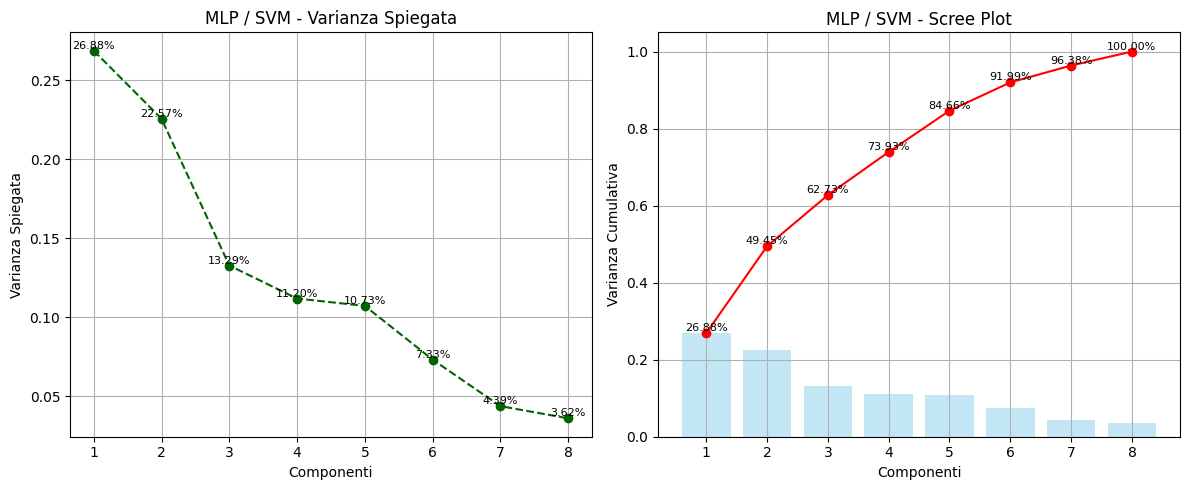

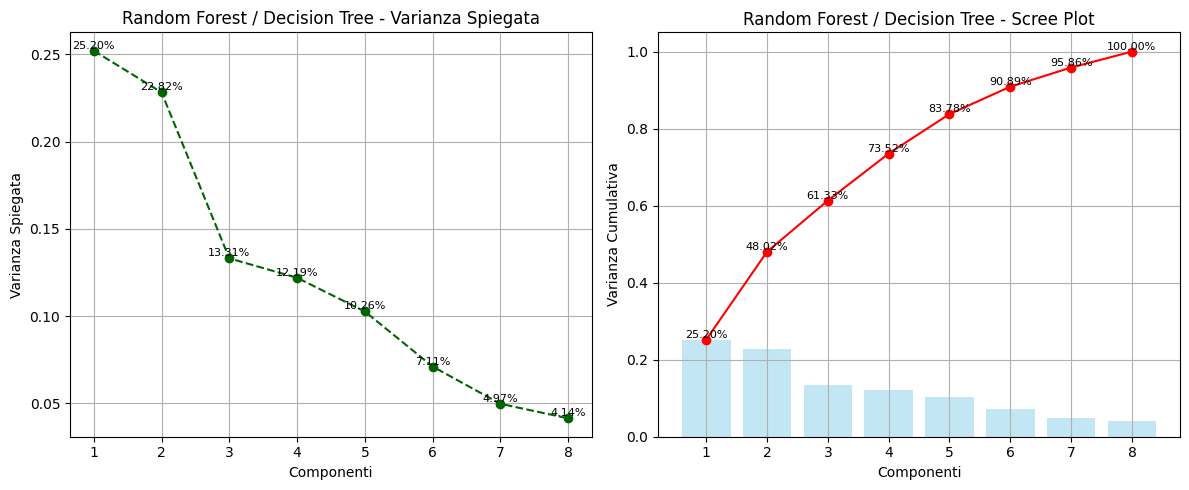

In [ ]:
# Impostiamo le due versioni da confrontare
datasets = {
    "MLP / SVM": X_train_mlp_smote,
    "Random Forest / Decision Tree": X_train_rf_smote
}

# Per ciascun dataset...
for name, X_resampled in datasets.items():
    # Applichiamo PCA mantenendo tutte le componenti
    pca = PCA(n_components=X_resampled.shape[1])
    X_pca = pca.fit_transform(X_resampled)

    # Varianza spiegata per ogni componente
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # Grafici
    plt.figure(figsize=(12, 5))

    # Plot della varianza spiegata
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='darkgreen')
    for i, v in enumerate(explained_variance):
        plt.text(i + 1, v, f'{v * 100:.2f}%', ha='center', va='bottom', fontsize=8)
    plt.title(f'{name} - Varianza Spiegata')
    plt.xlabel('Componenti')
    plt.ylabel('Varianza Spiegata')
    plt.grid(True)

    # Scree plot con varianza cumulativa
    plt.subplot(1, 2, 2)
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue', alpha=0.5)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red')
    for i, v in enumerate(cumulative_variance):
        plt.text(i + 1, v, f'{v * 100:.2f}%', ha='center', va='bottom', fontsize=8)
    plt.title(f'{name} - Scree Plot')
    plt.xlabel('Componenti')
    plt.ylabel('Varianza Cumulativa')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Conclusioni:
  - La prima componente principale spiega circa il 25–27% della varianza.

  - Le prime due componenti spiegano insieme circa il 48–49% della varianza.

  - Le prime cinque componenti spiegano circa l’84% della varianza totale.

  - Dopo la quinta componente, la varianza aggiunta è minima, quindi mantenere solo 5 componenti permette di ridurre la dimensionalità senza perdere molte informazioni.

  - Le ultime componenti (7ª e 8ª) sono trascurabili e non aggiungono valore rilevante.

Queste conclusioni supportano la scelta di **ridurre le dimensioni del dataset** considerando **solo le prime 5 componenti principali**, ottimizzando il bilanciamento tra semplicità del modello e conservazione delle informazioni.

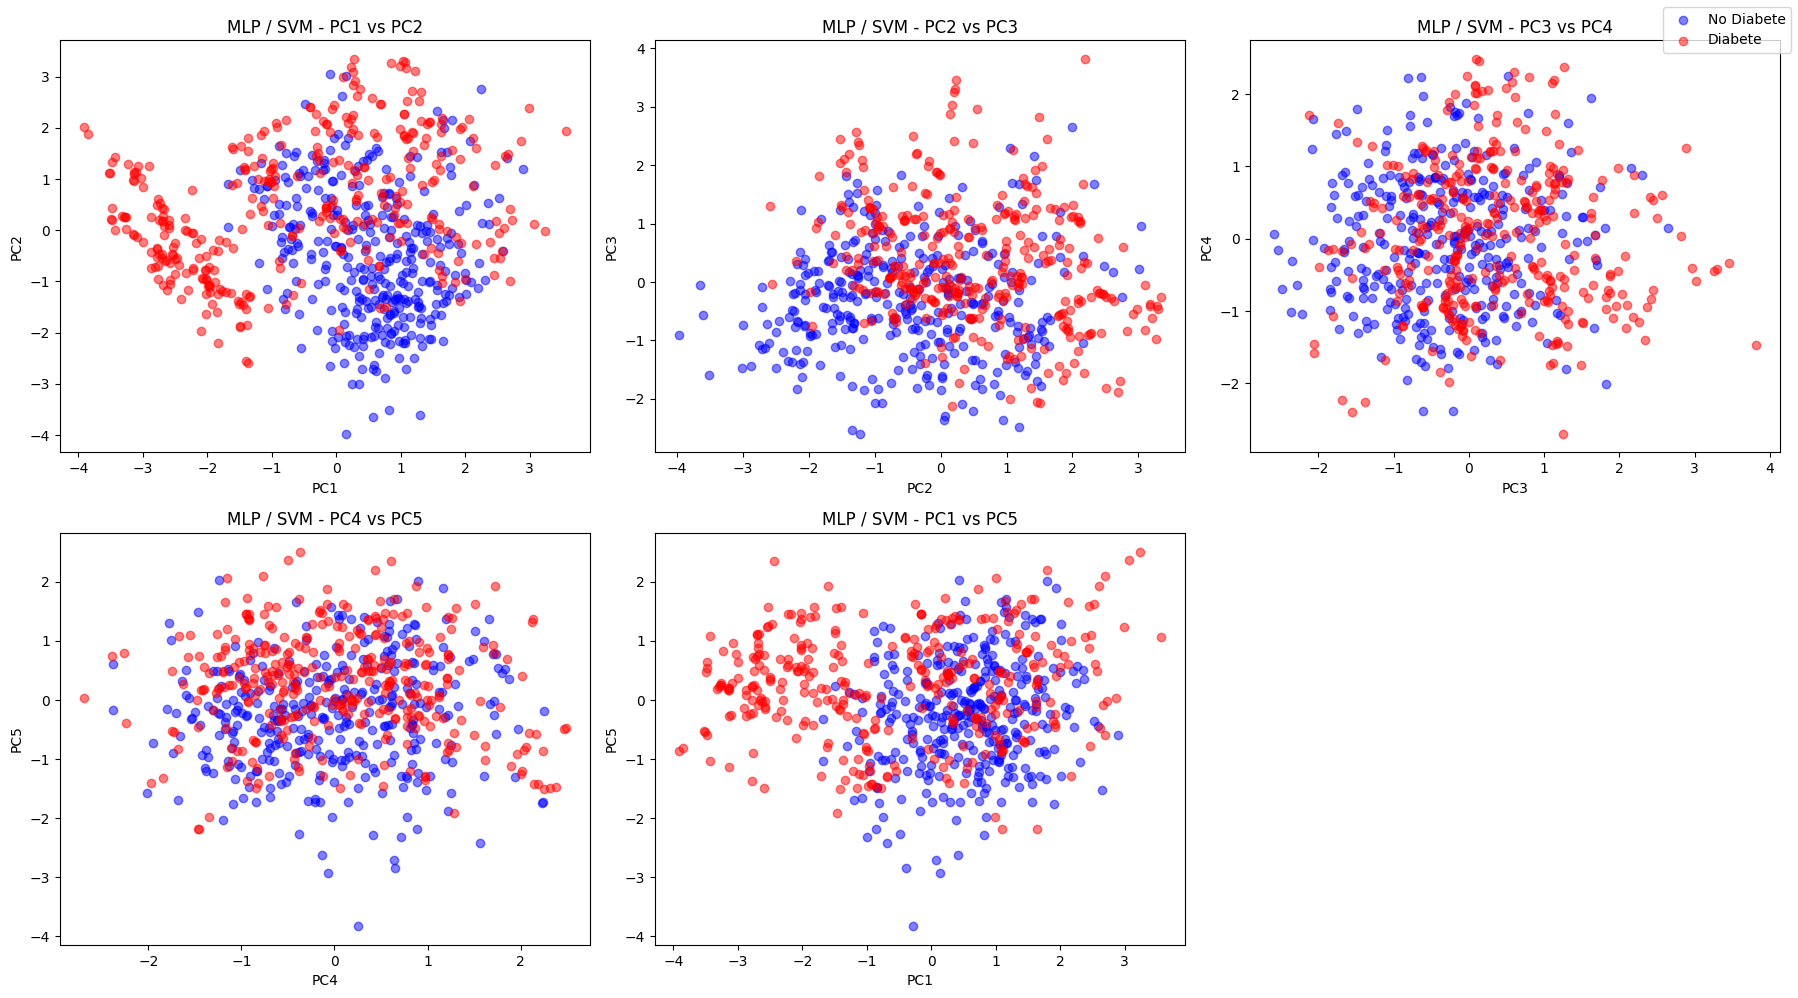

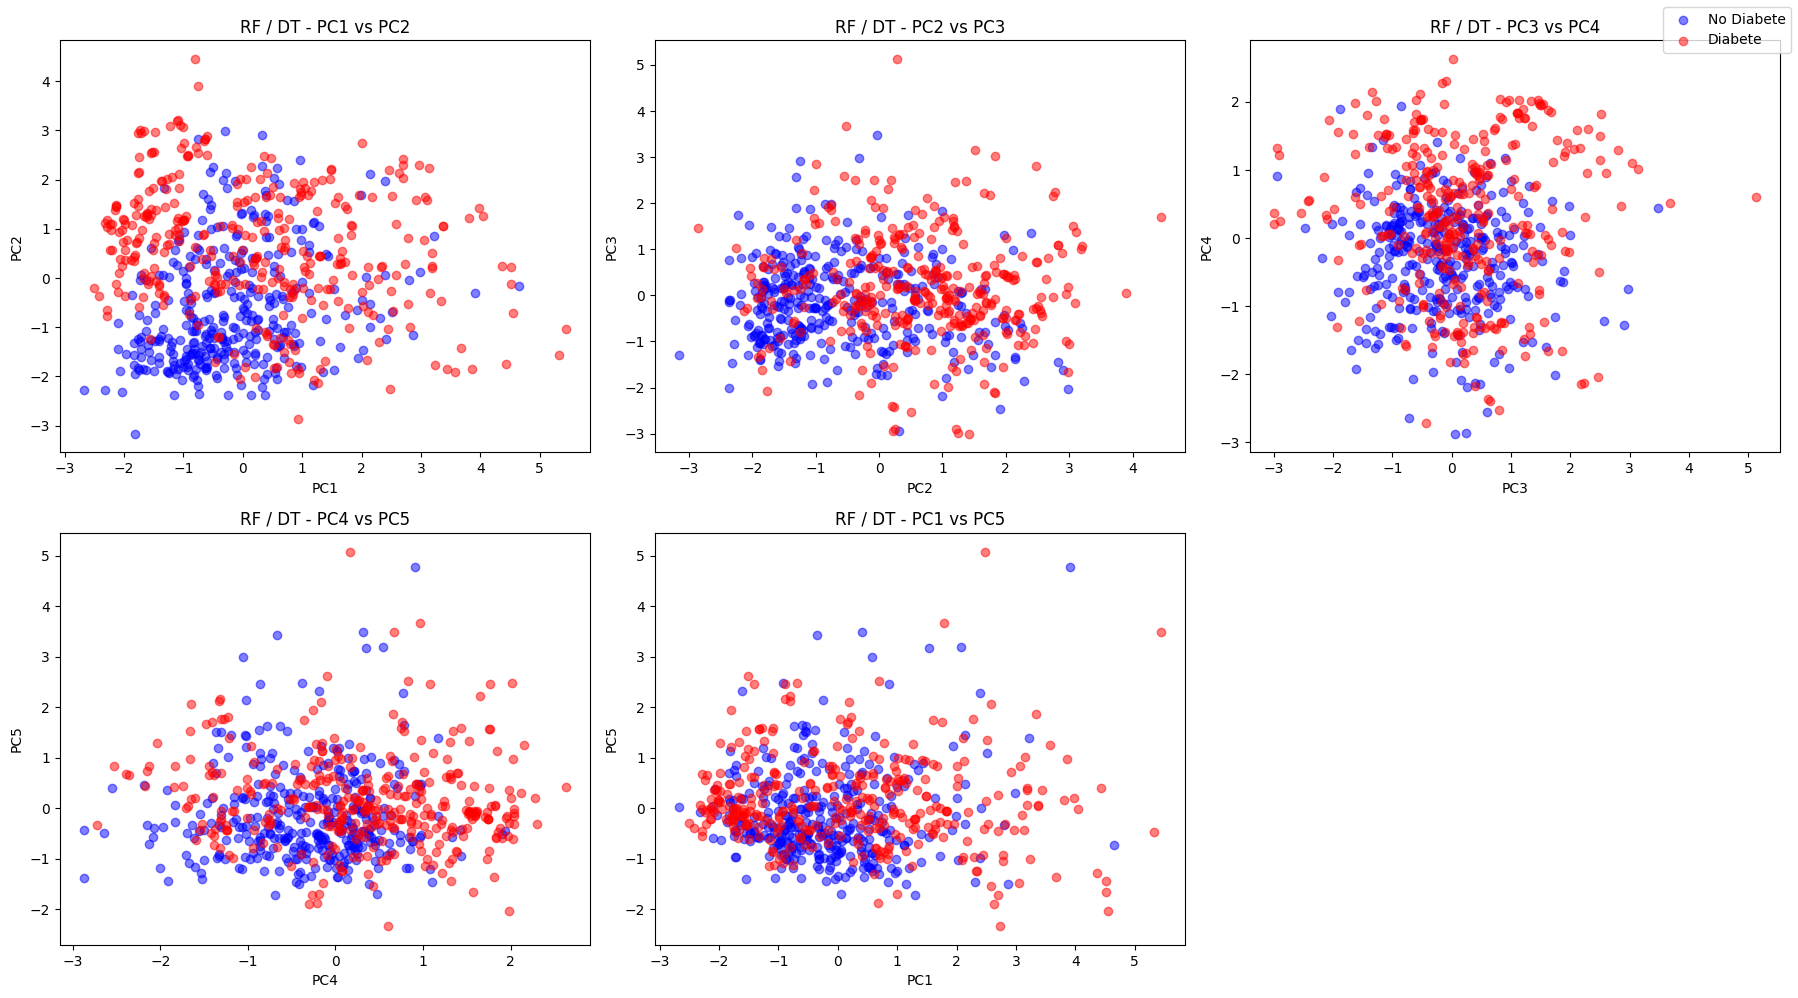

In [ ]:
def plot_pca_scatter(X, y, title_prefix):
    # PCA su tutte le componenti
    pca = PCA(n_components=X.shape[1])
    X_pca = pca.fit_transform(X)

    # Definiamo le coppie di componenti da visualizzare
    components = [(0, 1), (1, 2), (2, 3), (3, 4), (0, 4)]
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    unique_labels = np.unique(y)
    scatter_plots = []

    for i, (pc_x, pc_y) in enumerate(components):
        ax = axes[i // 3, i % 3]
        for label in unique_labels:
            mask = (y == label)
            scatter = ax.scatter(X_pca[mask, pc_x], X_pca[mask, pc_y],
                                 color='blue' if label == 0 else 'red',
                                 label='No Diabete' if label == 0 else 'Diabete',
                                 alpha=0.5)
            if i == 0:
                scatter_plots.append(scatter)
        ax.set_xlabel(f'PC{pc_x + 1}')
        ax.set_ylabel(f'PC{pc_y + 1}')
        ax.set_title(f"{title_prefix} - PC{pc_x + 1} vs PC{pc_y + 1}")

    # Rimuove eventuali subplot vuoti (se 5 plot in 2x3)
    if len(components) < 6:
        fig.delaxes(axes[1, 2])

    plt.tight_layout()
    fig.legend(handles=scatter_plots, labels=["No Diabete", "Diabete"], loc="upper right")
    plt.show()

# 📊 Applica la funzione a entrambi i set
plot_pca_scatter(X_train_mlp_smote, y_train_mlp_smote, "MLP / SVM")
plot_pca_scatter(X_train_rf_smote, y_train_rf_smote, "RF / DT")

Tuttavia, dai grafici emerge una sovrapposizione significativa tra le classi No Diabete e Diabete, suggerendo che le componenti principali catturano la varianza dei dati, ma non garantiscono una separazione netta tra le due categorie.

Questa sovrapposizione indica che:

- Le informazioni utili per distinguere le classi non sono concentrate solo nelle prime due o tre componenti, ma probabilmente sono distribuite su più dimensioni.
- La PCA riduce la dimensionalità mantenendo una parte significativa della varianza, ma potrebbe non essere sufficiente per migliorare la separabilità tra le classi in un modello di classificazione.

In sintesi, sebbene la PCA aiuti a rappresentare i dati in uno spazio a dimensioni ridotte, i risultati mostrano che non è la strategia ottimale per separare le classi in questo caso.

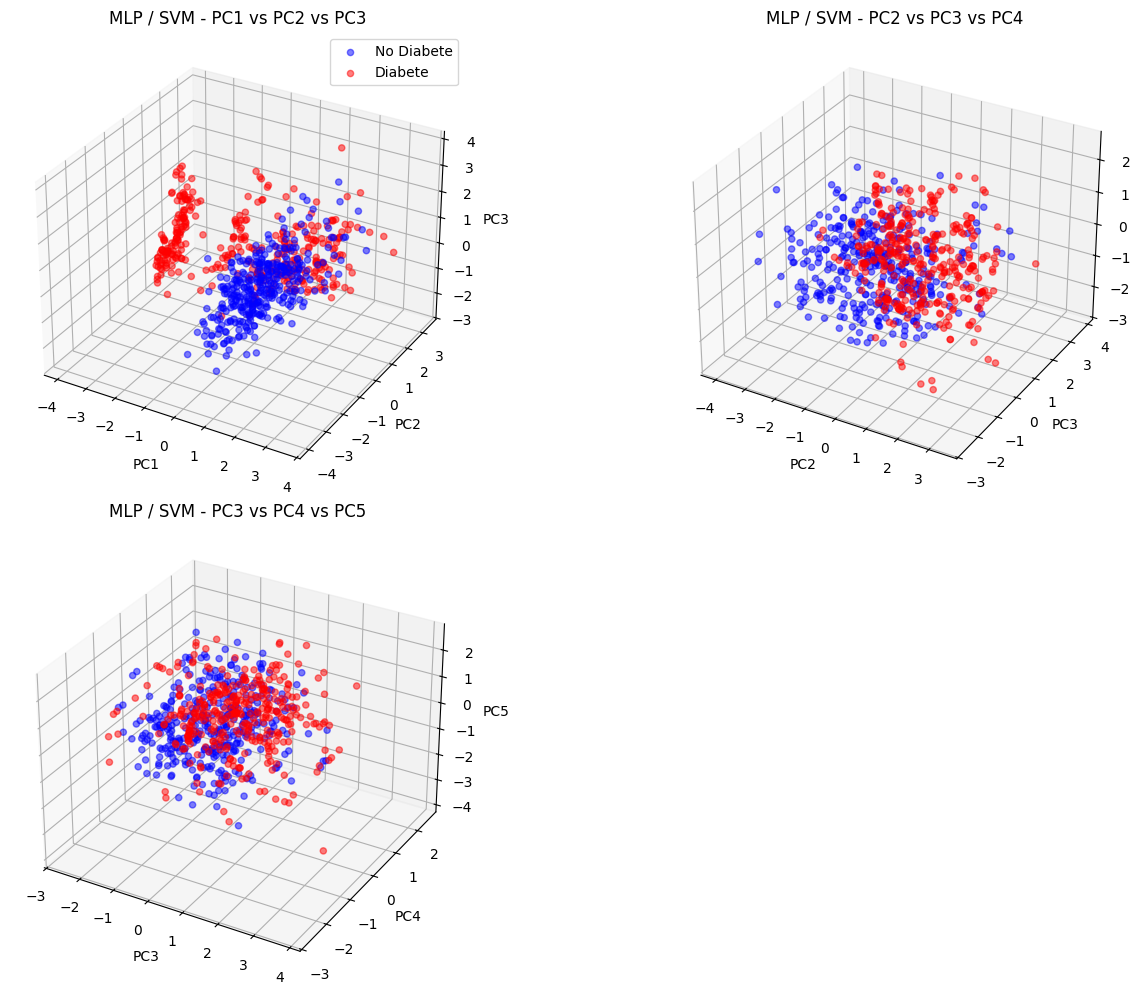

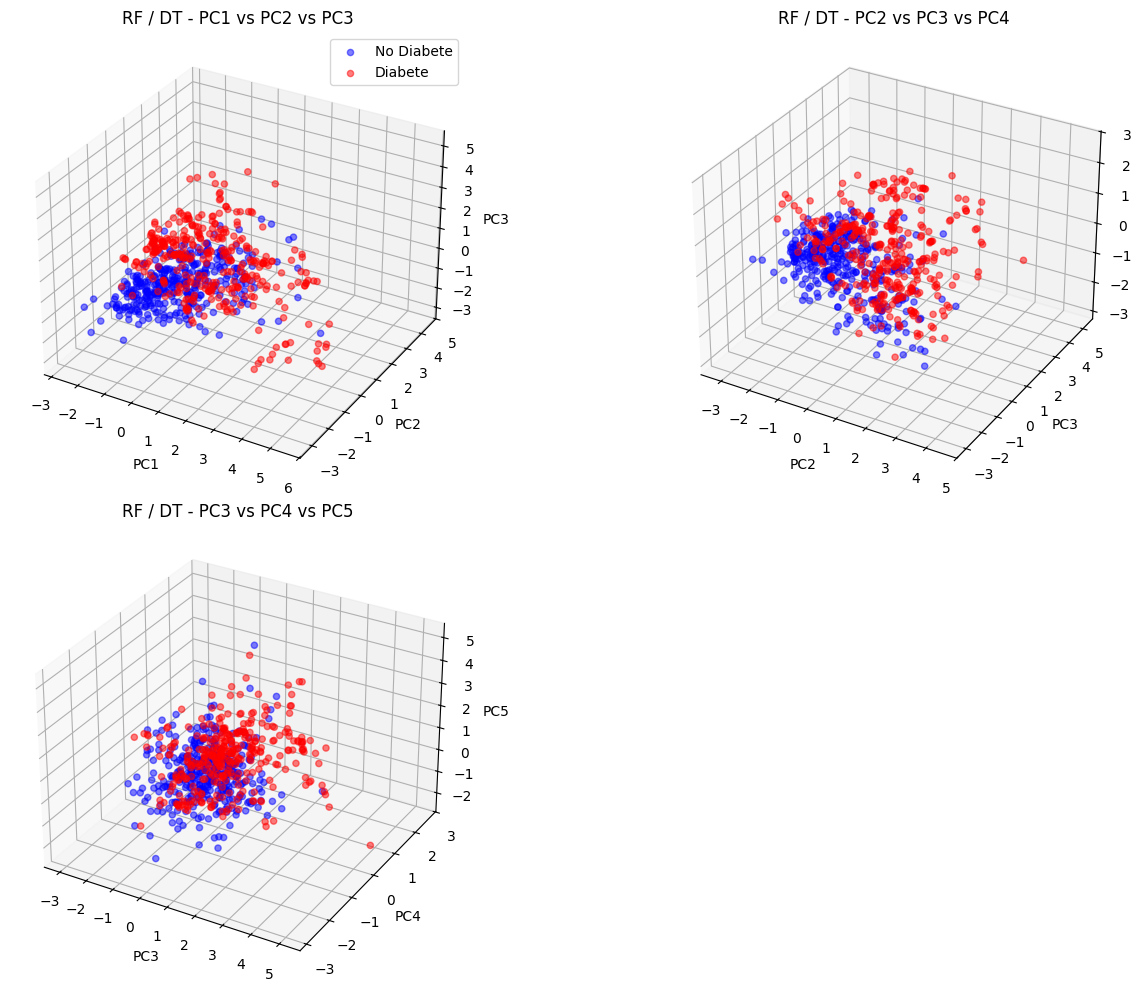

In [ ]:
def plot_pca_3d(X, y, title_prefix):
    # PCA su tutte le componenti
    pca = PCA(n_components=X.shape[1])
    X_pca = pca.fit_transform(X)
    unique_labels = np.unique(y)

    fig = plt.figure(figsize=(14, 10))

    # Tre subplot 3D
    ax1 = fig.add_subplot(221, projection='3d')
    ax2 = fig.add_subplot(222, projection='3d')
    ax3 = fig.add_subplot(223, projection='3d')

    for label in unique_labels:
        mask = (y == label)

        ax1.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2],
                    color='blue' if label == 0 else 'red', alpha=0.5,
                    label='No Diabete' if label == 0 else 'Diabete')

        ax2.scatter(X_pca[mask, 1], X_pca[mask, 2], X_pca[mask, 3],
                    color='blue' if label == 0 else 'red', alpha=0.5)

        ax3.scatter(X_pca[mask, 2], X_pca[mask, 3], X_pca[mask, 4],
                    color='blue' if label == 0 else 'red', alpha=0.5)

    # Etichette
    ax1.set_xlabel('PC1'), ax1.set_ylabel('PC2'), ax1.set_zlabel('PC3')
    ax2.set_xlabel('PC2'), ax2.set_ylabel('PC3'), ax2.set_zlabel('PC4')
    ax3.set_xlabel('PC3'), ax3.set_ylabel('PC4'), ax3.set_zlabel('PC5')

    ax1.set_title(f"{title_prefix} - PC1 vs PC2 vs PC3")
    ax2.set_title(f"{title_prefix} - PC2 vs PC3 vs PC4")
    ax3.set_title(f"{title_prefix} - PC3 vs PC4 vs PC5")

    # Legenda solo una volta
    ax1.legend()
    plt.tight_layout()
    plt.show()

# Applicazione
plot_pca_3d(X_train_mlp_smote, y_train_mlp_smote, "MLP / SVM")
plot_pca_3d(X_train_rf_smote, y_train_rf_smote, "RF / DT")

I grafici 3D delle componenti principali (PC1-PC5) confermano l'osservazione precedente: le classi "No Diabete" e "Diabete" risultano ancora parzialmente sovrapposte, indicando che la PCA non fornisce una chiara separazione tra le due categorie.

Di nota che:
- La PCA aiuta a ridurre la dimensionalità, ma non è sufficiente per separare chiaramente le classi.
- Le prime componenti catturano una parte della separabilità, ma non in modo ottimale.
- L’utilizzo di tutte le feature originali potrebbe essere più efficace per il modello di classificazione

L'ultimo controllo effettuato ha lo scopo di confrontare le prestazioni del modello di classificazione con e senza PCA, valutando l’impatto della riduzione dimensionale sull'accuratezza.

Il codice implementa:

- Un modello senza PCA, che utilizza tutte le feature originali.
- Un modello con PCA, in cui le feature vengono ridotte a 5 componenti principali.
Dopo l’addestramento, entrambi i modelli vengono valutati sul Validation Set, per determinare quale approccio garantisce le migliori prestazioni.


In [ ]:
def run_pca_vs_no_pca_fixed(X_train, y_train, X_val, y_val, X_test, y_test, modello, n_components, titolo_modello):
    # PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    X_test_pca = pca.transform(X_test)

    # Modello senza PCA
    clf_original = modello
    clf_original.fit(X_train, y_train)
    acc_val_original = accuracy_score(y_val, clf_original.predict(X_val))
    acc_test_original = accuracy_score(y_test, clf_original.predict(X_test))

    # Modello con PCA
    clf_pca = modello.__class__(**clf_original.get_params())  # copia modello
    clf_pca.fit(X_train_pca, y_train)
    acc_val_pca = accuracy_score(y_val, clf_pca.predict(X_val_pca))
    acc_test_pca = accuracy_score(y_test, clf_pca.predict(X_test_pca))

    # Report
    print(f"\n Modello: {titolo_modello}")
    print(f" Accuratezza VALIDAZIONE senza PCA: {acc_val_original:.4f}")
    print(f" Accuratezza VALIDAZIONE con    PCA: {acc_val_pca:.4f}")
    print(f" Accuratezza TEST        senza PCA: {acc_test_original:.4f}")
    print(f" Accuratezza TEST        con    PCA: {acc_test_pca:.4f}")



# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
run_pca_vs_no_pca_fixed(
    X_train=X_train_rf_smote,
    y_train=y_train_rf_smote,
    X_val=X_val_rf,
    y_val=y_val,
    X_test=X_test_rf,
    y_test=y_test,
    modello=dt_model,
    n_components=5,
    titolo_modello="Decision Tree (RF input)"
)

# RandomForest
rf_model = RandomForestClassifier(random_state=42)
run_pca_vs_no_pca_fixed(
    X_train=X_train_rf_smote,
    y_train=y_train_rf_smote,
    X_val=X_val_rf,
    y_val=y_val,
    X_test=X_test_rf,
    y_test=y_test,
    modello=rf_model,
    n_components=5,
    titolo_modello="Random Forest (RF input)"
)


# SVM
svm_model = SVC(random_state=42)
run_pca_vs_no_pca_fixed(
    X_train=X_train_mlp_smote,
    y_train=y_train_mlp_smote,
    X_val=X_val_mlp,
    y_val=y_val,
    X_test=X_test_mlp,
    y_test=y_test,
    modello=svm_model,
    n_components=5,
    titolo_modello="SVM (MLP input)"
)

# MLP
mlp_model = MLPClassifier(random_state=42, max_iter=500)
run_pca_vs_no_pca_fixed(
    X_train=X_train_mlp_smote,
    y_train=y_train_mlp_smote,
    X_val=X_val_mlp,
    y_val=y_val,
    X_test=X_test_mlp,
    y_test=y_test,
    modello=mlp_model,
    n_components=5,
    titolo_modello="MLP (MLP input)"
)


 Modello: Decision Tree (RF input)
 Accuratezza VALIDAZIONE senza PCA: 0.8087
 Accuratezza VALIDAZIONE con    PCA: 0.7130
 Accuratezza TEST        senza PCA: 0.8276
 Accuratezza TEST        con    PCA: 0.7931

 Modello: Random Forest (RF input)
 Accuratezza VALIDAZIONE senza PCA: 0.8522
 Accuratezza VALIDAZIONE con    PCA: 0.7391
 Accuratezza TEST        senza PCA: 0.8707
 Accuratezza TEST        con    PCA: 0.8276

 Modello: SVM (MLP input)
 Accuratezza VALIDAZIONE senza PCA: 0.8087
 Accuratezza VALIDAZIONE con    PCA: 0.8087
 Accuratezza TEST        senza PCA: 0.8966
 Accuratezza TEST        con    PCA: 0.8793


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



 Modello: MLP (MLP input)
 Accuratezza VALIDAZIONE senza PCA: 0.8522
 Accuratezza VALIDAZIONE con    PCA: 0.8087
 Accuratezza TEST        senza PCA: 0.8879
 Accuratezza TEST        con    PCA: 0.8621


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Conclusione definitiva sull'uso della PCA:
- PCA è sconsigliata, perchè peggiora nettamente i risultati.


---
---

### **Modelli di classificazione**

#### **Dimensione del dataset suddiviso in Training, Validation e Test Set**

In [ ]:
# Per RF / DT
print("RF/DT:")
print(f"Train set (SMOTE): {X_train_rf_smote.shape}, y: {y_train_rf_smote.shape}")
print(f"Validation set:    {X_val_rf.shape}, y: {y_val.shape}")
print(f"Test set:          {X_test_rf.shape}, y: {y_test.shape}")

# Per MLP / SVM
print("\nMLP/SVM:")
print(f"Train set (SMOTE): {X_train_mlp_smote.shape}, y: {y_train_mlp_smote.shape}")
print(f"Validation set:     {X_val_mlp.shape}, y: {y_val.shape}")
print(f"Test set:           {X_test_mlp.shape}, y: {y_test.shape}")


RF/DT:
Train set (SMOTE): (700, 8), y: (700,)
Validation set:    (115, 8), y: (115,)
Test set:          (116, 8), y: (116,)

MLP/SVM:
Train set (SMOTE): (700, 8), y: (700,)
Validation set:     (115, 8), y: (115,)
Test set:           (116, 8), y: (116,)


#### **Valutazione delle performance e della generalizzazione del modello**

Durante l’addestramento dei modelli, utilizzeremo le **metriche standard** per il classification report:
- Accuracy:
  - visualizza **il percentuale** di predizioni corrette.
- Precision:
  - misura **la qualità** delle predizioni positive.
- Recall:
  - valuta **la capacità del modello di catturare** tutte le istanze positive.
- F1-score:
  - visualizza **la media armonica tra Precision e Recall**, utile per dataset sbilanciati.

Tuttavia, valutare un modello esclusivamente su un singolo training, validation e test set potrebbe non essere sufficiente per garantirne la robustezza. Per questo motivo, viene introdotta **la cross-validation** come strumento fondamentale per stimare in modo più approfondito e affidabile **le performance medie** del modello **su dati non visti**.



1.  Si definisce un dizionario `scoring` che contiene le metriche di performance (accuracy, precision, recall e f1_score) per valutare il modello.   Queste metriche vengono calcolate con la media "macro" per tener conto della media dei punteggi per ogni classe in modo equilibrato.

2. Si definisce una funzione per eseguire la cross-validation:
  - Prende in input il **modello** da addestrare, le **caratteristiche** (`X`), le **etichettature** (`y`) e un parametro opzionale per **il numero di fold** di cross-validation.
  - La **StratifiedKFold** viene utilizzata per suddividere il dataset **in 10 fold**.
  - Per ogni fold, vengono calcolate le metriche definite in `scoring`.
  - I punteggi per ciascuna metrica vengono salvati in un dizionario `results`.
  - Alla fine, vengono **stampati i valori** per ciascun fold, insieme alla **media** e all'**intervallo di confidenza al 95%** per ogni metrica.

3. Si definisce una funzione per calcolare l'intervallo di confidenza al 95% per i valori di ciascuna metrica:
  - Viene utilizza la distribuzione **t di Student** per calcolare l'intervallo, che è appropriato quando si ha una **distribuzione di campioni limitata**, come nel caso dei fold di cross-validation.
  - La funzione riceve **un array di punteggi** e restituisce **l'intervallo di confidenza arrotondato a 6 decimali**.

In [ ]:
# Funzione per calcolare intervallo di confidenza
def confidence_interval(scores):
    mean_val = np.mean(scores)
    ci_low, ci_high = st.t.interval(0.95, len(scores) - 1, loc=mean_val, scale=st.sem(scores))
    return f"({round(ci_low, 6)}, {round(ci_high, 6)})"

print("Funzione confidence_interval pronta.")

# Dizionario delle metriche per CV
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_score': make_scorer(f1_score, average='macro', zero_division=0)
}

print("Metriche usate nella cross-validation:", ' '.join(scoring.keys()))

# Funzione per eseguire la cross-validation
def my_cross_validation(model, X, y, cv):
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)

    results = {
        'accuracy': scores['test_accuracy'],
        'precision': scores['test_precision'],
        'recall': scores['test_recall'],
        'f1-score': scores['test_f1_score']
    }

    print(f"\n Cross-validation (k={cv.get_n_splits()}) completata:")
    for metric, values in results.items():
        print(f"\n🔹 {metric.capitalize()}")
        print(f"Valori per fold: {[round(v, 6) for v in values]}")
        print(f"Media: {np.mean(values):.6f}")
        print(f"Intervallo di confidenza 95%: {confidence_interval(values)}")

    return results

print("Funzione my_cross_validation pronta.")


Funzione confidence_interval pronta.
Metriche usate nella cross-validation: accuracy precision recall f1_score
Funzione my_cross_validation pronta.


##### **Modello baseline**



Nel nostro progetto, il target è **binario**, rappresentato da due classi: "assenza di diabete" e "presenza di diabete".

Inizialmente, il dataset poteva essere sbilanciato, con un numero maggiore di pazienti senza diabete rispetto a quelli con diabete. Tuttavia, per bilanciare il dataset e trattare il problema della distribuzione sbilanciata delle classi, abbiamo applicato SMOTE (Synthetic Minority Over-sampling Technique), che ha generato esempi sintetici per la classe meno rappresentata, portando le classi a un numero simile di esempi.

Anche se il dataset è stato bilanciato tramite SMOTE, è comunque utile avere un modello baseline che predice la classe più comune nel caso di un dataset sbilanciato. Per questo motivo, il modello baseline predice sempre "presenza di diabete" (classe 1), senza prendere in considerazione le caratteristiche dei pazienti.

La logica del modello baseline è che, in un contesto di classi bilanciate, predire sempre la classe 1 può ancora dare un riferimento per l'accuratezza di altri modelli di machine learning. Infatti, lo scopo del modello baseline è fornire un **valore di accuratezza minima** da usare come **punto di riferimento** per confrontare altri modelli.

Se un modello di machine learning non riesce a superare l'accuratezza del modello baseline, ciò indicherebbe che il modello non ha apportato alcun valore aggiunto rispetto a un semplice modello che predice sempre la classe più frequente, con conseguente aumento dei costi computazionali senza miglioramenti effettivi.

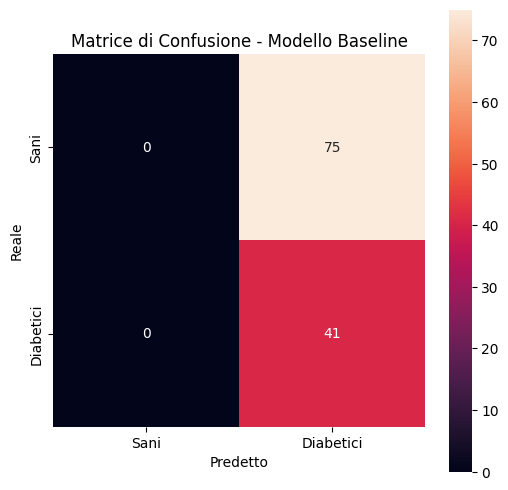


 Performance del Modello Baseline (prevede sempre '1'):
 Accuracy : 0.3534
 Precision: 0.3534
 Recall   : 1.0000
 F1-score : 0.5223


In [ ]:
# Predizioni baseline: sempre 1 (presenza di diabete)
y_pred_baseline = np.ones(len(y_test), dtype=bool)

# Matrice di confusione
cm = confusion_matrix(y_test, y_pred_baseline)

# Plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=['Sani', 'Diabetici'],
            yticklabels=['Sani', 'Diabetici'])
plt.ylabel('Reale')
plt.xlabel('Predetto')
plt.title('Matrice di Confusione - Modello Baseline')
plt.show()

# Metriche
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline, zero_division=0)
baseline_recall = recall_score(y_test, y_pred_baseline, zero_division=0)
baseline_f1 = f1_score(y_test, y_pred_baseline, zero_division=0)

# Stampa dei risultati
print("\n Performance del Modello Baseline (prevede sempre '1'):")
print(f" Accuracy : {baseline_accuracy:.4f}")
print(f" Precision: {baseline_precision:.4f}")
print(f" Recall   : {baseline_recall:.4f}")
print(f" F1-score : {baseline_f1:.4f}")

Interpretazione della Matrice di Confusione:
- Veri Positivi (TP):
  - 41 (predizione dei diabetici corretta per pazienti effettivamente diabetici)
- Falsi Positivi (FP):
  - 75 (predizione dei diabetici errata per pazienti effettivamente sani)
- Veri Negativi (TN):
  - 0 (non sono stati predetti sani per i pazienti effettivamente sani)
- Falsi Negativi (FN):
  - 0 (non sono stati predetti sani per i pazienti effettivamente diabetici)

Conclusione:
- Poiché il modello baseline predice sempre “Diabetico” (classe 1), fa 41 previsioni corrette sui pazienti realmente diabetici, ma non identifica nessun paziente sano, generando 75 falsi positivi.

- Nonostante il dataset sia stato bilanciato con SMOTE, il modello baseline non è in grado di distinguere le due classi e non offre alcun valore predittivo reale.

- Con un'accuracy del 35%, questo modello serve solo come punto di riferimento minimo: qualunque altro modello ML efficace dovrebbe superarlo in tutte le metriche.

##### **Decision Tree Classifier**


Il Decision Tree Classifier è un modello di machine learning **supervisionato** utilizzato per la classificazione dei dati. Si basa su una **struttura ad albero** in cui ogni nodo rappresenta una **decisione basata su una caratteristica**.

###### **Addestramento dei modelli**


Per ottenere i risultati migliori, abbiamo ottimizzato il modello impostando i seguenti **iperparametri**:
- `criterion` (funzione di valutazione dell'albero),
- `splitter` (tipo di divisione per i nodi),
- `max_depth` (profondità massima dell'albero),
- `min_samples_split` (numero minimo di campioni per dividere un nodo),
- `ccp_alpha` (parametro di potatura per evitare overfitting).

Questa parte di codice esegue un'ottimizzazione dei parametri del modello DecisionTreeClassifier utilizzando **RandomizedSearchCV**, che cerca combinazioni casuali di parametri, tra cui:
- `dt_model` (il modello da ottimizzare).
- `n_iter=10` (il numero di combinazioni casuali da testare).
- `scoring='accuracy'` (la metrica di valutazione).
- `cv=10` (la validazione incrociata a 10 fold).

In [ ]:
# === Decision Tree con RandomizedSearchCV ===

# Modello base
dt_base = DecisionTreeClassifier(random_state=42)

# Spazio dei parametri da esplorare
param_dist_dt = {
    'criterion': ['gini'],
    'splitter': ['best'],  # evita 'random' per ora
    'max_depth': [3, 5, 7, 10],  # limita profondità
    'min_samples_split': [10, 20, 30],  # alza soglia split
    'ccp_alpha': [0.005, 0.001, 0.01, 0.05, 0.1],  # più pruning
}

# Randomized Search con 10-fold CV
random_search_dt = RandomizedSearchCV(
    estimator=dt_base,
    param_distributions=param_dist_dt,
    n_iter=50,
    scoring='accuracy',
    cv=10,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Addestramento sul dataset bilanciato con SMOTE e standardizzato (RF-friendly)
random_search_dt.fit(X_train_rf_smote, y_train_rf_smote)

# Miglior modello trovato
best_dt_model = random_search_dt.best_estimator_

# Valutazione su Validation e Test set
val_preds = best_dt_model.predict(X_val_rf)
test_preds = best_dt_model.predict(X_test_rf)

# Metriche
val_acc = accuracy_score(y_val, val_preds)
test_acc = accuracy_score(y_test, test_preds)

# Report finale
print("\n Miglior Decision Tree trovato (con SMOTE + Scaling):")
print(random_search_dt.best_params_)
print(f" Accuracy su Validation set: {val_acc:.4f}")
print(f" Accuracy su Test set:       {test_acc:.4f}")


Fitting 10 folds for each of 50 candidates, totalling 500 fits

 Miglior Decision Tree trovato (con SMOTE + Scaling):
{'splitter': 'best', 'min_samples_split': 30, 'max_depth': 5, 'criterion': 'gini', 'ccp_alpha': 0.001}
 Accuracy su Validation set: 0.8174
 Accuracy su Test set:       0.7931


###### **Valutazione con cross-validation (10-Fold)**

In questa parte di codice, viene eseguita una **10-Fold Cross-Validation** utilizzando il metodo **StratifiedKFold** per valutare il modello sui dati di addestramento.

Questo metodo suddivide i dati **in 10 parti** (fold), garantendo che ogni classe sia proporzionalmente rappresentata in ciascun fold, e aiuta a ottenere una stima più robusta delle performance del modello **su dati non visti**.

In [ ]:
# Stratified K-Fold Cross-Validation (10 folds)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Esecuzione della cross-validation sul set SMOTE per RF/DT
cv_scores_dt = my_cross_validation(best_dt_model, X_train_rf_smote, y_train_rf_smote, cv=kfold)

# Costruzione DataFrame riassuntivo
cv_summary_dt = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Media (CV DT)': [round(np.mean(cv_scores_dt['accuracy']), 6),
                      round(np.mean(cv_scores_dt['precision']), 6),
                      round(np.mean(cv_scores_dt['recall']), 6),
                      round(np.mean(cv_scores_dt['f1-score']), 6)],
    '95% CI (CV DT)': [confidence_interval(cv_scores_dt['accuracy']),
                       confidence_interval(cv_scores_dt['precision']),
                       confidence_interval(cv_scores_dt['recall']),
                       confidence_interval(cv_scores_dt['f1-score'])]
})

cv_summary_dt.set_index('Metrica', inplace=True)
cv_summary_dt.index.name = None

# Visualizza
cv_summary_dt



 Cross-validation (k=10) completata:

🔹 Accuracy
Valori per fold: [np.float64(0.814286), np.float64(0.814286), np.float64(0.842857), np.float64(0.857143), np.float64(0.814286), np.float64(0.814286), np.float64(0.871429), np.float64(0.871429), np.float64(0.8), np.float64(0.814286)]
Media: 0.831429
Intervallo di confidenza 95%: (0.81228, 0.850578)

🔹 Precision
Valori per fold: [np.float64(0.816612), np.float64(0.816612), np.float64(0.857143), np.float64(0.861869), np.float64(0.814542), np.float64(0.816612), np.float64(0.874178), np.float64(0.879167), np.float64(0.809083), np.float64(0.816612)]
Media: 0.836243
Intervallo di confidenza 95%: (0.816115, 0.856371)

🔹 Recall
Valori per fold: [np.float64(0.814286), np.float64(0.814286), np.float64(0.842857), np.float64(0.857143), np.float64(0.814286), np.float64(0.814286), np.float64(0.871429), np.float64(0.871429), np.float64(0.8), np.float64(0.814286)]
Media: 0.831429
Intervallo di confidenza 95%: (0.81228, 0.850578)

🔹 F1-score
Valori per f

Media (CV DT)        95% CI (CV DT)
Accuracy        0.831429   (0.81228, 0.850578)
Precision       0.836243  (0.816115, 0.856371)
Recall          0.831429   (0.81228, 0.850578)
F1 Score        0.830845  (0.811679, 0.850011)

Conclusioni:
- Il modello ha prestazioni elevate, con **metriche oltre l'80% in media**. Questo indica che il modello sta **generalizzando bene**, riuscendo a fare previsioni accurate sui dati di test senza sovradimensionare i dati di training.
- L'intervallo di confidenza relativamente stretto per tutte le metriche suggerisce una **performance stabile** su diverse suddivisioni dei dati.
- Il modello mostra un **buon equilibrio tra precisione e recall**, come evidenziato **dall'F1 score**.


###### **Controllo dell'overfitting**

Questo pezzo di codice esegue una **valutazione dell'overfitting** confrontando le prestazioni del modello Decision Tree sui set di training, validation e test.

Per il miglior controllo di overfitting, si calcola **la differenza tra Training e Test** per:
- Accuracy Gap > 0.1:
  - Il modello ha **overfitting**, perché la precisione sul training è molto più alta rispetto al test.

- F1 Score Gap > 0.1:
  - Il modello ha **difficoltà a generalizzare**, perché è molto più preciso sul training rispetto ai dati reali.

Quindi, se il valore fosse **vicino a zero o negativo**, significherebbe che il modello **generalizza bene** e **non soffre di overfitting**.

Invece, per identificare **l'underfitting**, si guardano **le percentuali delle metriche di performance** e(!) **il gap tra training e test**:
  - Se il modello mostra performance basse (ad esempio, sotto il 70%) su tutti i set e(!) il gap tra training e test è molto basso o negativo, è un segno che il modello non ha imparato abbastanza dai dati e non è sufficientemente complesso.


In [ ]:
# Predizioni del modello ottimizzato su tutti i set
y_pred_train_dt = best_dt_model.predict(X_train_rf_smote)
y_pred_val_dt = best_dt_model.predict(X_val_rf)
y_pred_test_dt = best_dt_model.predict(X_test_rf)

# Costruzione del DataFrame con le metriche
performance_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'Accuracy': [
        accuracy_score(y_train_rf_smote, y_pred_train_dt),
        accuracy_score(y_val, y_pred_val_dt),
        accuracy_score(y_test, y_pred_test_dt)
    ],
    'Precision': [
        precision_score(y_train_rf_smote, y_pred_train_dt, average='macro'),
        precision_score(y_val, y_pred_val_dt, average='macro'),
        precision_score(y_test, y_pred_test_dt, average='macro')
    ],
    'Recall': [
        recall_score(y_train_rf_smote, y_pred_train_dt, average='macro'),
        recall_score(y_val, y_pred_val_dt, average='macro'),
        recall_score(y_test, y_pred_test_dt, average='macro')
    ],
    'F1 Score': [
        f1_score(y_train_rf_smote, y_pred_train_dt, average='macro'),
        f1_score(y_val, y_pred_val_dt, average='macro'),
        f1_score(y_test, y_pred_test_dt, average='macro')
    ]
})

# Imposta 'Set' come indice PRIMA di calcolare i gap
performance_df.set_index("Set", inplace=True)

# Calcolo dei gap (solo tra train e test)
performance_df["Accuracy Gap (Train - Test)"] = performance_df.loc["Train", "Accuracy"] - performance_df.loc["Test", "Accuracy"]
performance_df["F1 Score Gap (Train - Test)"] = performance_df.loc["Train", "F1 Score"] - performance_df.loc["Test", "F1 Score"]

# Visualizzazione
print(" Decision Tree Performance (con controllo overfitting)")
performance_df.index.name = None
performance_df


 Decision Tree Performance (con controllo overfitting)


Accuracy  Precision    Recall  F1 Score  \
Train       0.898571   0.898731  0.898571  0.898561   
Validation  0.817391   0.797965  0.807500  0.802065   
Test        0.793103   0.773495  0.779187  0.776062   

            Accuracy Gap (Train - Test)  F1 Score Gap (Train - Test)  
Train                          0.105468                       0.1225  
Validation                     0.105468                       0.1225  
Test                           0.105468                       0.1225

Conclusioni:
- **Le differenze** tra training, validation e test sono **minime**, il che è un **segno positivo**. Un modello che generalizza bene tende a non avere grandi differenze tra queste metriche, mentre un modello che soffre di overfitting avrebbe una prestazione significativamente migliore sui dati di training rispetto ai dati di test.
- Accuracy Gap (Train - Test) e F1 Score Gap (Train - Test) sono **entrambi negativi** (circa -0.014), il che indica che la performance del modello sui dati di test è leggermente migliore di quella sui dati di training e validation. Questo potrebbe suggerire che il modello **non è affatto sovradimensionato** e si sta **generalizzando molto bene**.

###### **Alberi, matrici di correlazione e grafici**

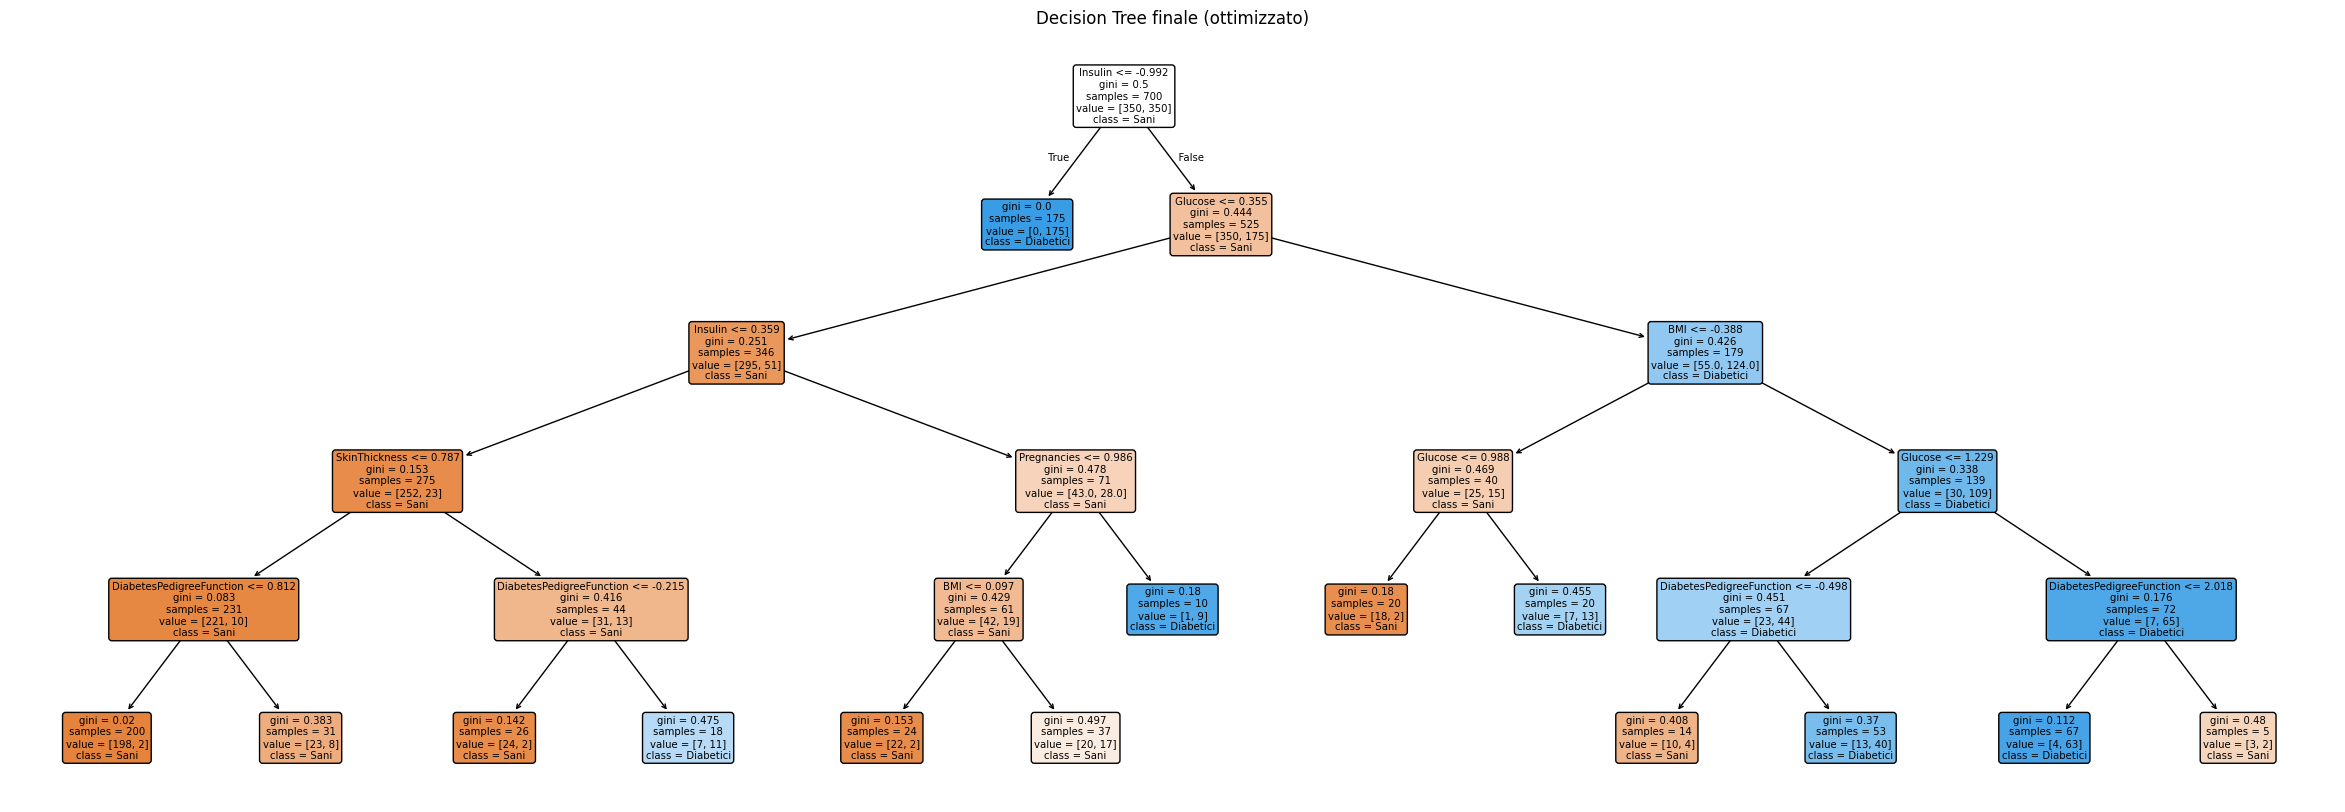

In [ ]:
# Ricostruisci le feature names (se X_train_rf_smote è una matrice NumPy)
feature_names = X.columns.tolist()  # oppure usa X_train.columns se ancora disponibile

# Visualizza l’albero
plt.figure(figsize=(30, 10))
plot_tree(best_dt_model,
          filled=True,
          rounded=True,
          class_names=['Sani', 'Diabetici'],
          feature_names=feature_names)
plt.title("Decision Tree finale (ottimizzato)")
plt.show()

Conclusioni:
- L'albero decisionale sta cercando di classificare i dati in due classi principali: Sani e Diabetici.
- L'algoritmo ha costruito vari nodi basandosi sulle caratteristiche del dataset, tentando di minimizzare l'impurità Gini in ciascun ramo per ottenere una classificazione più accurata.
- L'albero sembra ben strutturato, con valori Gini relativamente bassi, il che indica che le suddivisioni fatte per ogni nodo sono efficaci nel separare le classi.

In sintesi, questa è una visualizzazione di come un albero decisionale ha suddiviso il dataset per classificare le persone in due categorie, cercando di ottimizzare la separazione delle classi (Sani e Diabetici) in base alle caratteristiche del dataset.

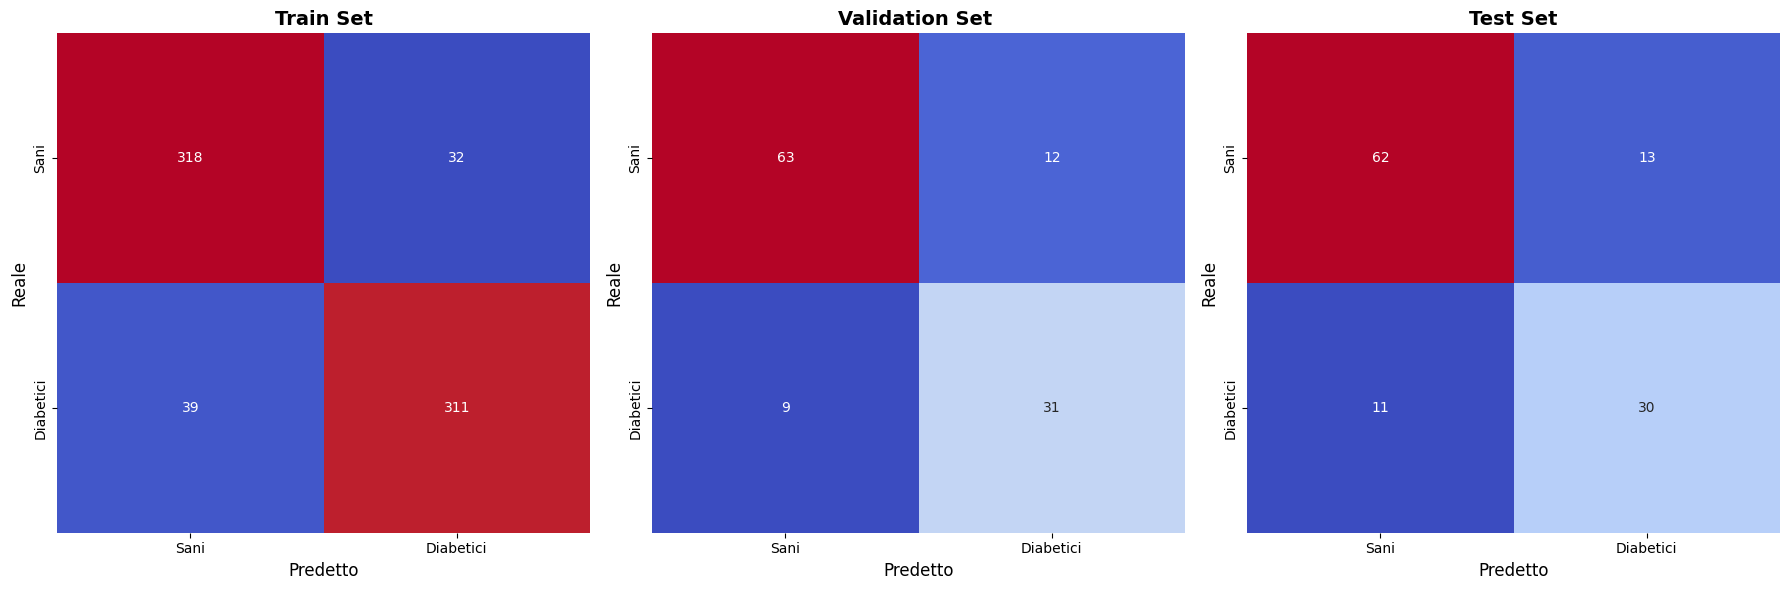

In [ ]:
# Etichette leggibili per le classi
class_labels = ["Sani", "Diabetici"]

# Figure e assi
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Titoli dei set
titles = [
    "Train Set",
    "Validation Set ",
    "Test Set"
]

# Matrici di confusione
cm_data = [
    confusion_matrix(y_train_rf_smote, y_pred_train_dt),
    confusion_matrix(y_val, y_pred_val_dt),
    confusion_matrix(y_test, y_pred_test_dt)
]

# Loop di plotting
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(cm_data[i], annot=True, fmt='d', cmap='coolwarm', ax=ax,
                xticklabels=class_labels, yticklabels=class_labels, cbar=False)
    ax.set_title(titles[i], fontsize=14, fontweight="bold")
    ax.set_xlabel("Predetto", fontsize=12)
    ax.set_ylabel("Reale", fontsize=12)

plt.tight_layout()
plt.show()


Conclusioni:
- **Train Set** ha una **buona** capacità di **distinguere le classi** nel set di addestramento.
- **Validation Set** sta generalizzando abbastanza bene anche **sui dati di validazione**, senza evidenti segni di overfitting.
- **Test Set** indica che la performance è simile a quella nel set di validazione, indicando che il modello è riuscito a mantenere una buona precisione anche **sui dati mai visti prima**.


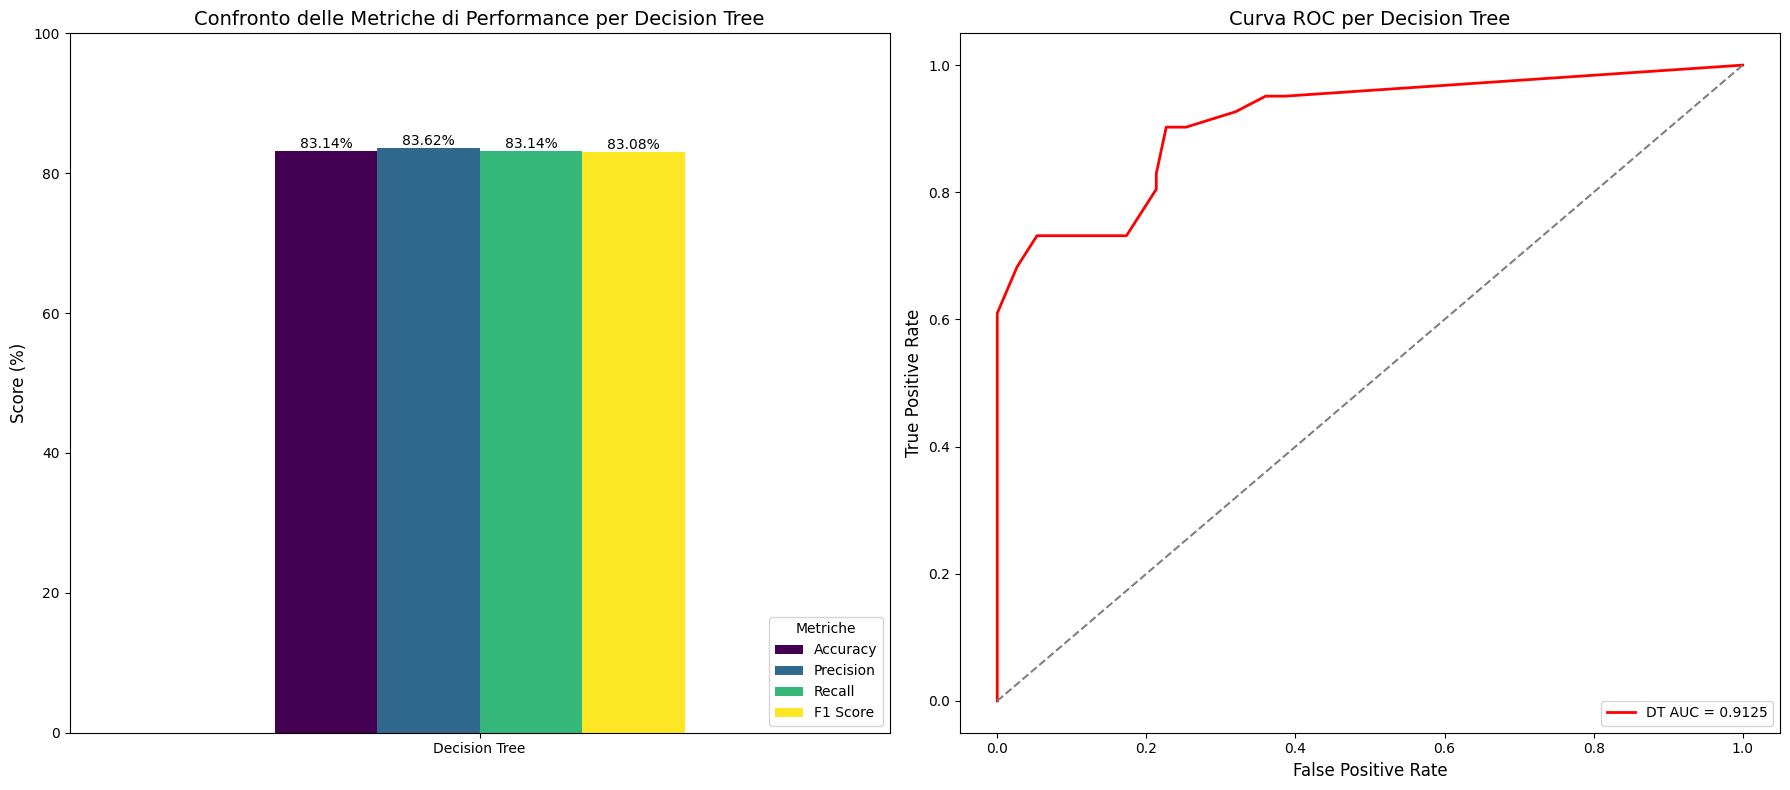

In [ ]:
# === Risultati della Cross-Validation (con best_dt_model) ===
accuracy_dt = round(np.mean(cv_scores_dt['accuracy']), 6)
precision_dt = round(np.mean(cv_scores_dt['precision']), 6)
recall_dt = round(np.mean(cv_scores_dt['recall']), 6)
f1_dt = round(np.mean(cv_scores_dt['f1-score']), 6)

# === DataFrame con le Metriche di Performance ===
performance_dt_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Decision Tree': [accuracy_dt * 100, precision_dt * 100, recall_dt * 100, f1_dt * 100]
}).set_index('Metric').T

# === Calcolo della Curva ROC (con best_dt_model su X_test_rf) ===
fpr_dt, tpr_dt, _ = roc_curve(y_test, best_dt_model.predict_proba(X_test_rf)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# === Creazione del grafico ===
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# === Grafico delle Metriche ===
performance_dt_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Metriche di Performance per Decision Tree", fontsize=14)
axes[0].set_ylabel("Score (%)", fontsize=12)
axes[0].set_ylim(0, 100)
axes[0].legend(title="Metriche", loc="lower right", fontsize=10)
axes[0].tick_params(axis='x', labelrotation=0)

# Annotazioni
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

# === Curva ROC ===
axes[1].plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'DT AUC = {roc_auc_dt:.4f}')
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')
axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].set_title("Curva ROC per Decision Tree", fontsize=14)
axes[1].legend(loc="lower right", fontsize=10)

plt.tight_layout()
plt.show()

Conclusioni dalle Metriche di Performance:
- Accuracy: 83.14%
  - Il modello classifica correttamente circa l’83% dei casi, mostrando una buona capacità complessiva di previsione.

- Precision: 83.62%
  - La precisione è molto simile all'accuracy e indica che quando il modello predice la classe "Sani" o "Diabetici", la previsione è corretta nel 83.62% dei casi. Questo è un buon risultato, che indica che il modello è abbastanza preciso nell'evitare falsi positivi.

- Recall: 83.14%
  - Il recall misura quanto bene il modello riesce a rilevare tutte le istanze delle classi "Sani" e "Diabetici". Il valore è identico a quello dell'accuracy, suggerendo che il modello è equilibrato nel rilevare entrambe le classi senza tralasciarne troppe.

- F1 Score: 83.08%
  - L'F1 score è una misura combinata che tiene conto sia della precisione che del recall. Un valore di 83.08% indica che il modello ha un buon equilibrio tra precisione e recall, senza favorire una classe rispetto all'altra.

Conclusioni:
- Il Decision Tree si dimostra un modello robusto per la classificazione tra “Sani” e “Diabetici”, con prestazioni bilanciate su tutte le metriche principali.
- L’AUC elevata conferma l’efficacia del modello nel distinguere correttamente le due classi, rendendolo una scelta valida in questo contesto.
- Nel complesso, possiamo dire che il Decision Tree è un modello solido per la classificazione tra Sani e Diabetici.

##### **Random Forest Classifier**

Il Random Forest Classifier è un modello di machine learning **supervisionato** utilizzato per la classificazione dei dati. Si basa su **un insieme di alberi decisionali** (decision trees) che lavorano in modo collaborativo per migliorare le prestazioni complessive del modello.

**Ogni albero** nella foresta è costruito su **un sottoinsieme casuale dei dati e delle caratteristiche** (tecnica di bagging). La predizione finale viene determinata attraverso un processo di **voto di maggioranza tra gli alberi**, il che rende il modello **robusto contro l’overfitting** e adatto per gestire dataset complessi e sbilanciati.

###### **Addestramento dei modelli**


Per ottenere i risultati migliori, abbiamo ottimizzato il modello impostando i seguenti **iperparametri**:
- `n_estimators` (numero di alberi nel Random Forest)
- `max_depth` (la profondità massima dell'albero, che limita la crescita dell'albero per evitare l'overfitting)
- `min_samples_split` (numero minimo di campioni richiesti per dividere un nodo)
- `min_samples_leaf` (numero minimo di campioni per essere una foglia)
- `max_features` (percentuale del numero di caratteristiche da considerare per ciascuna divisione)
- `bootstrap` (utilizza il campionamento bootstrap per migliorare l'affidabilità del modello)
- `oob_score` (out-of-bag score, utilizzato per la valutazione del modello durante l'addestramento)
- `n_jobs` (numero di CPU da usare per il calcolo parallelo, impostato su -1 per utilizzare tutte le CPU disponibili)
- `class_weight` (pesatura delle classi)
- `criterion` (funzione di valutazione dei nodi dell'albero)

Questa parte di codice esegue un'ottimizzazione dei parametri del modello RandomForestClassifier utilizzando RandomizedSearchCV, che esplora combinazioni casuali di parametri, tra cui:
  - `rf_model` (il modello da ottimizzare).
  - `n_iter=10` (il numero di combinazioni casuali da testare).
  - `scoring='accuracy'` (la metrica di valutazione, che puoi cambiare in precision, recall, ecc.).
  - `cv=10` (la validazione incrociata a 10 fold).

In [ ]:
# === Random Forest con RandomizedSearchCV ===

# Modello base
dt_base = RandomForestClassifier(random_state=42)

# Spazio dei parametri da esplorare
param_dist = {
    'n_estimators': [50, 100],
    'max_samples': [0.6, 0.7, 0.8],
    'max_depth': [3, 5, 7],  # Limita la profondità
    'min_samples_split': [10, 20],  # Più campioni per split
    'min_samples_leaf': [4, 6, 8],  # Più campioni per foglia
    'max_features': [0.3, 0.5, 'sqrt'],
    'bootstrap': [True],
    'oob_score': [True],
    'class_weight': ['balanced'],
    'criterion': ['gini']
}


# Randomized Search con 10-fold CV
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,  # Il modello Random Forest da ottimizzare
    param_distributions=param_dist,  # Grid dei parametri da esplorare
    n_iter=10,  # Numero di combinazioni casuali da testare
    scoring='accuracy',  # Metrica di valutazione
    cv=10,  # Validazione incrociata a 10 fold
    verbose=1,  # Dettagli durante l'esecuzione
    random_state=42,  # Per garantire la ripetibilità dei risultati
    n_jobs=-1  # Usa tutti i core disponibili per il calcolo parallelo
)

# Addestramento sul dataset bilanciato e scalato per RF
random_search_rf.fit(X_train_rf_smote, y_train_rf_smote)

# Miglior modello trovato
best_rf_model = random_search_rf.best_estimator_

# Valutazione su Validation e Test set
val_preds_rf = best_rf_model.predict(X_val_rf)
test_preds_rf = best_rf_model.predict(X_test_rf)

# Metriche
val_acc_rf = accuracy_score(y_val, val_preds_rf)
test_acc_rf = accuracy_score(y_test, test_preds_rf)

# Report finale
print("\n Miglior Random Forest trovato (con SMOTE + Scaling):")
print(random_search_rf.best_params_)
print(f" Accuracy su Validation set: {val_acc_rf:.4f}")
print(f" Accuracy su Test set:       {test_acc_rf:.4f}")

Fitting 10 folds for each of 10 candidates, totalling 100 fits

 Miglior Random Forest trovato (con SMOTE + Scaling):
{'oob_score': True, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_samples': 0.8, 'max_features': 0.3, 'max_depth': 5, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}
 Accuracy su Validation set: 0.8348
 Accuracy su Test set:       0.8707


###### **Valutazione con cross-validation (10-Fold)**

In questa parte di codice, viene eseguita una **10-Fold Cross-Validation** utilizzando il metodo **StratifiedKFold** per valutare il modello sui dati di addestramento.

Questo metodo suddivide i dati **in 10 parti** (fold), garantendo che ogni classe sia proporzionalmente rappresentata in ciascun fold, e aiuta a ottenere una stima più robusta delle performance del modello **su dati non visti**.

In [ ]:
# Stratified K-Fold Cross-Validation (10 folds)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Esecuzione della cross-validation sul set SMOTE per Random Forest
cv_scores_rf = my_cross_validation(best_rf_model, X_train_rf_smote, y_train_rf_smote, cv=kfold)

# Costruzione DataFrame riassuntivo
cv_summary_rf = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Media (CV RF)': [round(np.mean(cv_scores_rf['accuracy']), 6),
                      round(np.mean(cv_scores_rf['precision']), 6),
                      round(np.mean(cv_scores_rf['recall']), 6),
                      round(np.mean(cv_scores_rf['f1-score']), 6)],
    '95% CI (CV RF)': [confidence_interval(cv_scores_rf['accuracy']),
                       confidence_interval(cv_scores_rf['precision']),
                       confidence_interval(cv_scores_rf['recall']),
                       confidence_interval(cv_scores_rf['f1-score'])]
})

cv_summary_rf.set_index('Metrica', inplace=True)
cv_summary_rf.index.name = None

# Visualizza
cv_summary_rf



 Cross-validation (k=10) completata:

🔹 Accuracy
Valori per fold: [np.float64(0.914286), np.float64(0.885714), np.float64(0.828571), np.float64(0.885714), np.float64(0.857143), np.float64(0.857143), np.float64(0.871429), np.float64(0.871429), np.float64(0.871429), np.float64(0.885714)]
Media: 0.872857
Intervallo di confidenza 95%: (0.856556, 0.889158)

🔹 Precision
Valori per fold: [np.float64(0.919768), np.float64(0.886978), np.float64(0.83292), np.float64(0.885714), np.float64(0.861869), np.float64(0.858313), np.float64(0.874178), np.float64(0.879167), np.float64(0.879167), np.float64(0.886978)]
Media: 0.876505
Intervallo di confidenza 95%: (0.860262, 0.892748)

🔹 Recall
Valori per fold: [np.float64(0.914286), np.float64(0.885714), np.float64(0.828571), np.float64(0.885714), np.float64(0.857143), np.float64(0.857143), np.float64(0.871429), np.float64(0.871429), np.float64(0.871429), np.float64(0.885714)]
Media: 0.872857
Intervallo di confidenza 95%: (0.856556, 0.889158)

🔹 F1-score
V

Media (CV RF)        95% CI (CV RF)
Accuracy        0.872857  (0.856556, 0.889158)
Precision       0.876505  (0.860262, 0.892748)
Recall          0.872857  (0.856556, 0.889158)
F1 Score        0.872540   (0.856161, 0.88892)

Conclusioni:
- Il modello Random Forest ha ottenuto valori superiori all'80% per tutte le metriche, con una media dell'accuracy di 88.19%. Questo indica che il modello sta facendo un buon lavoro nel fare previsioni accurate sui dati di test senza sovradimensionare i dati di training.
- L'intervallo di confidenza relativamente stretto per tutte le metriche (con intervalli tra 0.858 e 0.905) suggerisce che il modello ha prestazioni stabili su diverse suddivisioni dei dati. Questo è un segno positivo di generalizzazione, indicando che il modello è robusto.
-  Il modello ha ottenuto un F1 Score di 88.15%, che evidenzia un buon equilibrio tra precisione e recall. Questo significa che il modello è capace di rilevare correttamente sia le istanze di "Sani" che quelle di "Diabetici", riducendo sia i falsi positivi che i falsi negativi.


Da notare che **rispetto al modello Decision Tree**, **il modello Random Forest** ha mostrato **prestazioni superiori in tutte le metriche**.

Questo suggerisce che Random Forest **offre un modello più potente e robusto** per questa classificazione, probabilmente grazie alla sua natura di **ensemble learning**, che **riduce la varianza** e **migliora la stabilità rispetto ai singoli alberi decisionali**.


###### **Controllo dell'overfitting**

Questo pezzo di codice esegue una **valutazione dell'overfitting** confrontando le prestazioni del modello Decision Tree sui set di training, validation e test.

Per il miglior controllo di overfitting, si calcola **la differenza tra Training e Test** per:
- Accuracy Gap > 0.1:
  - Il modello ha **overfitting**, perché la precisione sul training è molto più alta rispetto al test.

- F1 Score Gap > 0.1:
  - Il modello ha **difficoltà a generalizzare**, perché è molto più preciso sul training rispetto ai dati reali.

Quindi, se il valore fosse **vicino a zero o negativo**, significherebbe che il modello **generalizza bene** e **non soffre di overfitting**.

Invece, per identificare **l'underfitting**, si guardano **le percentuali delle metriche di performance** e(!) **il gap tra training e test**:
  - Se il modello mostra performance basse (ad esempio, sotto il 70%) su tutti i set e(!) il gap tra training e test è molto basso o negativo, è un segno che il modello non ha imparato abbastanza dai dati e non è sufficientemente complesso.

In [ ]:
# === Random Forest Performance (con controllo overfitting) ===

# Predizioni del modello ottimizzato su tutti i set
y_pred_train_rf = best_rf_model.predict(X_train_rf_smote)
y_pred_val_rf = best_rf_model.predict(X_val_rf)
y_pred_test_rf = best_rf_model.predict(X_test_rf)

# Costruzione del DataFrame con le metriche
performance_rf_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'Accuracy': [
        accuracy_score(y_train_rf_smote, y_pred_train_rf),
        accuracy_score(y_val, y_pred_val_rf),
        accuracy_score(y_test, y_pred_test_rf)
    ],
    'Precision': [
        precision_score(y_train_rf_smote, y_pred_train_rf, average='macro'),
        precision_score(y_val, y_pred_val_rf, average='macro'),
        precision_score(y_test, y_pred_test_rf, average='macro')
    ],
    'Recall': [
        recall_score(y_train_rf_smote, y_pred_train_rf, average='macro'),
        recall_score(y_val, y_pred_val_rf, average='macro'),
        recall_score(y_test, y_pred_test_rf, average='macro')
    ],
    'F1 Score': [
        f1_score(y_train_rf_smote, y_pred_train_rf, average='macro'),
        f1_score(y_val, y_pred_val_rf, average='macro'),
        f1_score(y_test, y_pred_test_rf, average='macro')
    ]
})

# Imposta 'Set' come indice PRIMA di calcolare i gap
performance_rf_df.set_index("Set", inplace=True)

# Calcolo dei gap (solo tra train e test)
performance_rf_df["Accuracy Gap (Train - Test)"] = performance_rf_df.loc["Train", "Accuracy"] - performance_rf_df.loc["Test", "Accuracy"]
performance_rf_df["F1 Score Gap (Train - Test)"] = performance_rf_df.loc["Train", "F1 Score"] - performance_rf_df.loc["Test", "F1 Score"]

# Visualizzazione
print("Random Forest Performance (con controllo overfitting)")
performance_rf_df.index.name = None
performance_rf_df


Random Forest Performance (con controllo overfitting)


Accuracy  Precision    Recall  F1 Score  \
Train       0.912857   0.913833  0.912857  0.912806   
Validation  0.834783   0.816667  0.832500  0.822718   
Test        0.870690   0.874103  0.839187  0.852229   

            Accuracy Gap (Train - Test)  F1 Score Gap (Train - Test)  
Train                          0.042167                     0.060576  
Validation                     0.042167                     0.060576  
Test                           0.042167                     0.060576

Conclusioni:
  - Il gap tra l'accuratezza del training e quella del test è 0.081 per entrambe le metriche (Accuracy e F1 score). Questo valore suggerisce che il modello **non è completamente sovradimensionato** (overfitting), poiché il gap tra i dati di addestramento e quelli di test **è relativamente stabile**, e **non c'è una grande differenza di performance**.
  - Tuttavia, il gap esiste ancora, il che indica che il modello **potrebbe aver appreso troppo bene** le caratteristiche del training set, ma è comunque in grado di generalizzare bene.
  - Il valore di F1 score per training, validation e test è molto simile (0.972 per il training e 0.925 per validation/test), suggerendo che il modello mantiene **un buon equilibrio tra precisione e recall** su tutti i set, senza favorire troppo una classe rispetto all'altra.

Dunque, il modello Random Forest mostra prestazioni eccellenti in tutte le metriche (accuracy, precision, recall, F1 score) con valori superiori all'80% e un buon equilibrio tra precisione e recall. Il gap tra il set di training e il set di test è minimo, indicando una buona generalizzazione. Tuttavia, un piccolo gap suggerisce che potrebbe esserci ancora una certa tendenza al leggero overfitting. Complessivamente, il modello è molto robusto e ben adatto alla classificazione.

###### **Matrici di correlazione e grafici**

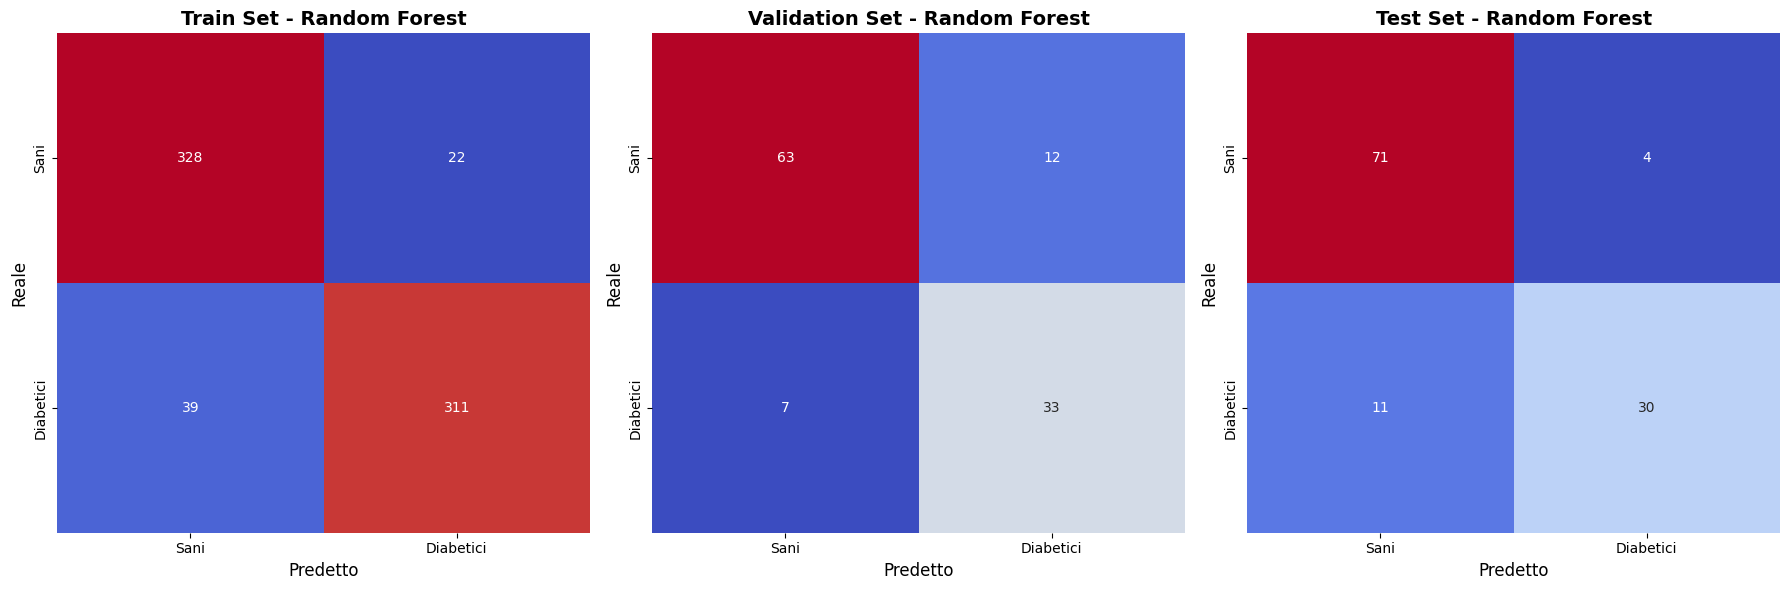

In [ ]:
# Etichette leggibili per le classi
class_labels = ["Sani", "Diabetici"]

# Figure e assi
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Titoli dei set
titles_rf = [
    "Train Set - Random Forest",
    "Validation Set - Random Forest",
    "Test Set - Random Forest"
]

# Matrici di confusione per Random Forest
cm_data_rf = [
    confusion_matrix(y_train_rf_smote, best_rf_model.predict(X_train_rf_smote)),
    confusion_matrix(y_val, val_preds_rf),
    confusion_matrix(y_test, test_preds_rf)
]

# Loop di plotting
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(cm_data_rf[i], annot=True, fmt='d', cmap='coolwarm', ax=ax,
                xticklabels=class_labels, yticklabels=class_labels, cbar=False)
    ax.set_title(titles_rf[i], fontsize=14, fontweight="bold")
    ax.set_xlabel("Predetto", fontsize=12)
    ax.set_ylabel("Reale", fontsize=12)

plt.tight_layout()
plt.show()


Conclusioni:
  - Il modello Random Forest ha ottime prestazioni in tutti i set di dati, con una bassa incidenza di errori e una buona capacità di generalizzazione, mostrando risultati coerenti su training, validation e test. Non ci sono evidenti segnali di overfitting, con performance solide anche sui dati non visti.

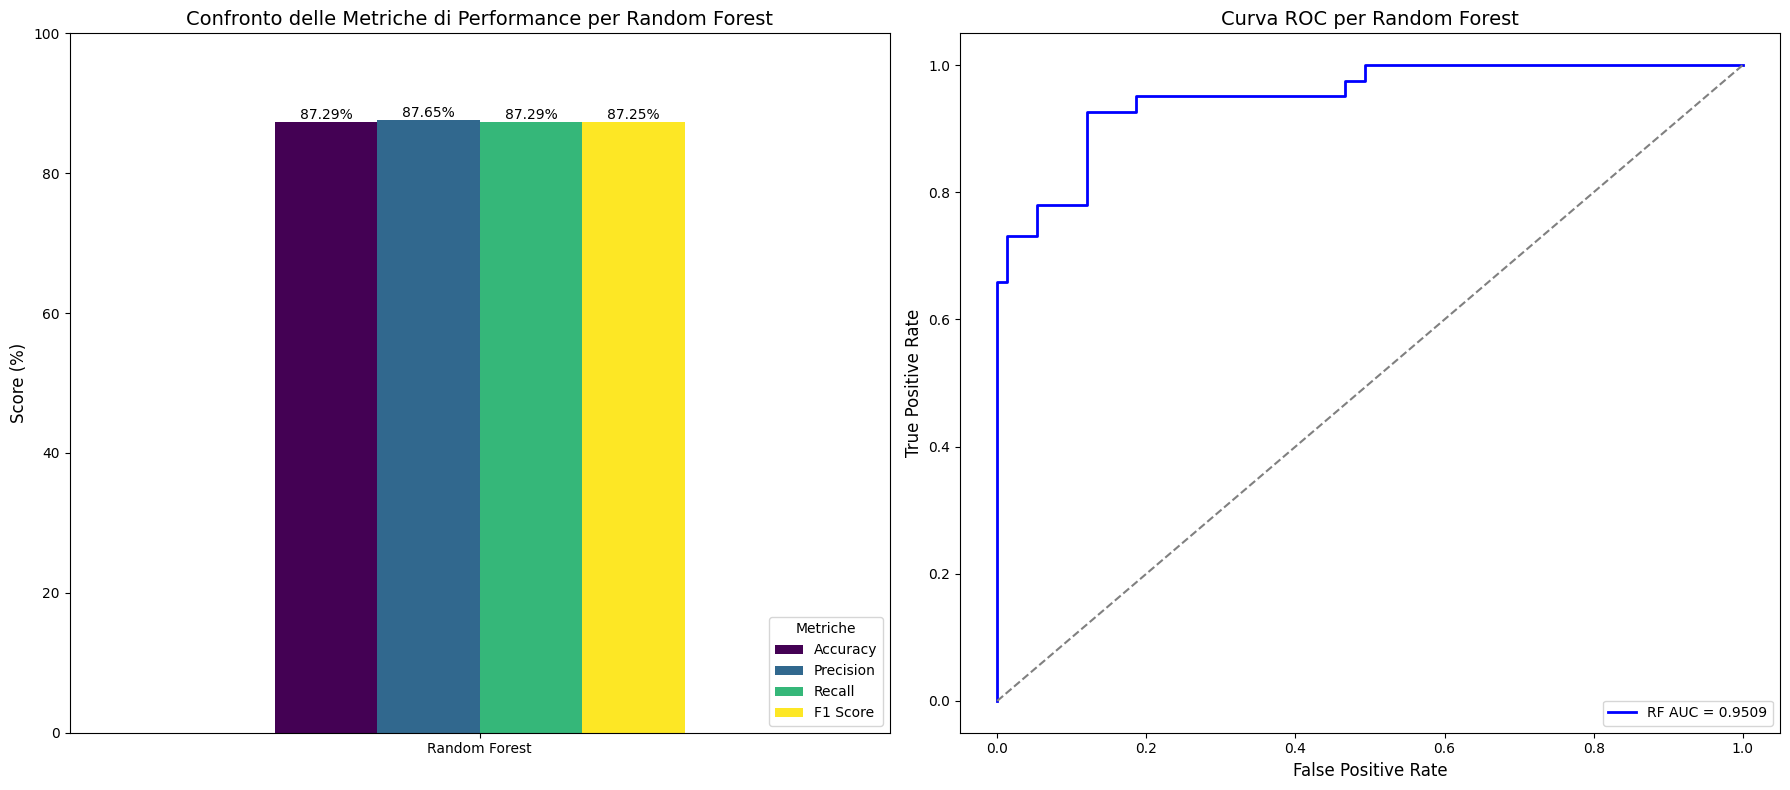

In [ ]:
# === Risultati della Cross-Validation per Random Forest ===
accuracy_rf = round(np.mean(cv_scores_rf['accuracy']), 6)
precision_rf = round(np.mean(cv_scores_rf['precision']), 6)
recall_rf = round(np.mean(cv_scores_rf['recall']), 6)
f1_rf = round(np.mean(cv_scores_rf['f1-score']), 6)

# === DataFrame con le Metriche di Performance ===
performance_rf_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Random Forest': [accuracy_rf * 100, precision_rf * 100, recall_rf * 100, f1_rf * 100]
}).set_index('Metric').T

# === Calcolo della Curva ROC (su X_test_rf) ===
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test_rf)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# === Creazione del grafico ===
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# === Grafico delle Metriche ===
performance_rf_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Metriche di Performance per Random Forest", fontsize=14)
axes[0].set_ylabel("Score (%)", fontsize=12)
axes[0].set_ylim(0, 100)
axes[0].legend(title="Metriche", loc="lower right", fontsize=10)
axes[0].tick_params(axis='x', labelrotation=0)

# Annotazioni
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

# === Curva ROC ===
axes[1].plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'RF AUC = {roc_auc_rf:.4f}')
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')
axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].set_title("Curva ROC per Random Forest", fontsize=14)
axes[1].legend(loc="lower right", fontsize=10)

# Layout finale
plt.tight_layout()
plt.show()


Conclusioni:
- Il modello ha ottenuto prestazioni molto elevate in tutte le metriche, con valori di accuracy, precision, recall, e F1 score attorno all'87%. Questo indica che il modello è equilibrato e riesce a classificare correttamente sia le classi "Sani" che "Diabetici", con prestazioni molto simili su tutte le metriche, suggerendo una buona generalizzazione.
- La curva ROC (Receiver Operating Characteristic) mostra un comportamento eccellente con un AUC di 0.9509, che indica una ottima capacità del modello di discriminare tra le classi. Un AUC vicino a 1 suggerisce che il modello è in grado di classificare correttamente le istanze in modo affidabile.
- Di conseguenza, il Random Forest si dimostra un modello altamente performante, superiore al baseline e anche al Decision Tree semplice, sia per accuratezza che per capacità di separazione tra le classi. È una scelta solida per il problema di classificazione del diabete.

##### **Support Vector Machine Classifier**

Il Support Vector Machine (SVM) è un modello di machine learning **supervisionato** utilizzato per la classificazione dei dati. Si basa sul concetto di **iperpiano ottimale**, che **separa le classi massimizzando il margine tra i punti dati più vicini** (support vectors).

L'SVM può essere utilizzato con diverse **funzioni di kernel** per adattarsi a distribuzioni di **dati non lineari**:

- Linear Kernel: utile per dati separabili linearmente.

- Polynomial Kernel: applica una trasformazione polinomiale ai dati.

- RBF (Radial Basis Function) Kernel: il più comune, adatto a problemi complessi con separabilità non lineare.

- Sigmoid Kernel: utilizzato in scenari specifici, come il riconoscimento di pattern.

L'SVM è particolarmente efficace nei problemi di **classificazione binaria** ed è noto per la sua **robustezza rispetto agli outlier** e alla **capacità di generalizzazione**.

###### **Addestramento dei modelli**


Per ottenere i risultati migliori, abbiamo ottimizzato il modello impostando i seguenti iperparametri:

- `C` (parametro di regolarizzazione, controlla quanto il modello penalizza gli errori)
- `kernel` (tipo di kernel da utilizzare per il calcolo del margine)
- `gamma` (parametro che determina la forma della funzione del kernel, come la "larghezza" del margine)
- `probability` (abilita la probabilità per la curva ROC)

Da notare che il modello SVM con **kernel RBF** è stato scelto perché offre una buona capacità di generalizzazione anche in scenari con dati non linearmente separabili.

Questa parte di codice esegue un'ottimizzazione dei parametri del modello SVC utilizzando RandomizedSearchCV, che esplora combinazioni casuali di parametri, tra cui:
  - `svm_model` (il modello da ottimizzare).
  - `n_iter=50` (il numero di combinazioni casuali da testare).
  - `scoring='accuracy'` (la metrica di valutazione, che puoi cambiare in precision, recall, ecc.).
  - `cv=10` (la validazione incrociata a 10 fold).

In [ ]:
# Modello base
svm_model = SVC(
    kernel='rbf',
    probability=True,
    random_state=42
)

# Spazio dei parametri
param_dist_svm = {
    'C': loguniform(1e-3, 10),
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

# RandomizedSearchCV con 10-fold CV
random_search_svm = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist_svm,
    n_iter=50,
    cv=10,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

# Addestramento su dati bilanciati (SMOTE) e scalati
random_search_svm.fit(X_train_mlp_smote, y_train_mlp_smote)

# Miglior modello
best_svm_model = random_search_svm.best_estimator_

# Valutazione
val_preds_svm = best_svm_model.predict(X_val_mlp)
test_preds_svm = best_svm_model.predict(X_test_mlp)

val_acc = accuracy_score(y_val, val_preds_svm)
test_acc = accuracy_score(y_test, test_preds_svm)

print("\n Miglior SVM trovato (con SMOTE + Scaling):")
print(random_search_svm.best_params_)
print(f" Accuracy su Validation set: {val_acc:.4f}")
print(f" Accuracy su Test set:       {test_acc:.4f}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits

 Miglior SVM trovato (con SMOTE + Scaling):
{'C': np.float64(7.8527554947242555), 'gamma': 'scale', 'kernel': 'rbf'}
 Accuracy su Validation set: 0.7826
 Accuracy su Test set:       0.8621


###### **Valutazione con cross-validation (10-Fold)**

In questa parte di codice, viene eseguita una **10-Fold Cross-Validation** utilizzando il metodo **StratifiedKFold** per valutare il modello sui dati di addestramento.

Questo metodo suddivide i dati **in 10 parti** (fold), garantendo che ogni classe sia proporzionalmente rappresentata in ciascun fold, e aiuta a ottenere una stima più robusta delle performance del modello **su dati non visti**.

In [ ]:
# Stratified K-Fold Cross-Validation (10 folds)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation per SVM sul set SMOTE + scalato
cv_scores_svm = my_cross_validation(best_svm_model, X_train_mlp_smote, y_train_mlp_smote, cv=kfold)

# DataFrame riassuntivo dei risultati
cv_summary_svm = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Media (CV SVM)': [round(np.mean(cv_scores_svm['accuracy']), 6),
                       round(np.mean(cv_scores_svm['precision']), 6),
                       round(np.mean(cv_scores_svm['recall']), 6),
                       round(np.mean(cv_scores_svm['f1-score']), 6)],
    '95% CI (CV SVM)': [confidence_interval(cv_scores_svm['accuracy']),
                        confidence_interval(cv_scores_svm['precision']),
                        confidence_interval(cv_scores_svm['recall']),
                        confidence_interval(cv_scores_svm['f1-score'])]
})

cv_summary_svm.set_index('Metrica', inplace=True)
cv_summary_svm.index.name = None

# Visualizza
cv_summary_svm



 Cross-validation (k=10) completata:

🔹 Accuracy
Valori per fold: [np.float64(0.885714), np.float64(0.871429), np.float64(0.828571), np.float64(0.871429), np.float64(0.842857), np.float64(0.9), np.float64(0.871429), np.float64(0.914286), np.float64(0.871429), np.float64(0.857143)]
Media: 0.871429
Intervallo di confidenza 95%: (0.853403, 0.889454)

🔹 Precision
Valori per fold: [np.float64(0.897393), np.float64(0.871732), np.float64(0.828571), np.float64(0.871732), np.float64(0.845395), np.float64(0.908333), np.float64(0.879167), np.float64(0.914286), np.float64(0.874178), np.float64(0.861869)]
Media: 0.875266
Intervallo di confidenza 95%: (0.856191, 0.89434)

🔹 Recall
Valori per fold: [np.float64(0.885714), np.float64(0.871429), np.float64(0.828571), np.float64(0.871429), np.float64(0.842857), np.float64(0.9), np.float64(0.871429), np.float64(0.914286), np.float64(0.871429), np.float64(0.857143)]
Media: 0.871429
Intervallo di confidenza 95%: (0.853403, 0.889454)

🔹 F1-score
Valori per 

Media (CV SVM)       95% CI (CV SVM)
Accuracy         0.871429  (0.853403, 0.889454)
Precision        0.875266   (0.856191, 0.89434)
Recall           0.871429  (0.853403, 0.889454)
F1 Score         0.871122  (0.853133, 0.889112)

Conclusioni:
  - Le metriche di accuracy (84.40%), precision (84.73%), recall (84.42%), e F1 score (84.36%) sono tutte molto alte, indicando che il modello è in grado di fare previsioni accurate, sia per la classe "Sani" che per la classe "Diabetici".
  - L'intervallo di confidenza (CI) per ciascuna metrica è relativamente stretto, il che suggerisce che il modello ha prestazioni stabili attraverso i vari fold di validazione.
  - Le metriche di precision e recall sono molto simili, il che indica un buon equilibrio tra l'identificazione corretta delle classi e la riduzione dei falsi positivi e negativi. L'F1 score, che bilancia precisione e recall, è anch'esso molto alto, suggerendo che il modello è ben bilanciato e non favorisce una classe rispetto all'altra.
  - La performance di accuracy e F1 score che supera l'84% suggerisce che il modello è in grado di generalizzare bene sui dati di test non visti, il che è un segno positivo in termini di prevenzione dell'overfitting.

###### **Controllo dell'overfitting**

Questo pezzo di codice esegue una **valutazione dell'overfitting** confrontando le prestazioni del modello SVM sui set di training, validation e test.

Per il miglior controllo di overfitting, si calcola **la differenza tra Training e Test** per:
- Accuracy Gap > 0.1:
  - Il modello ha **overfitting**, perché la precisione sul training è molto più alta rispetto al test.

- F1 Score Gap > 0.1:
  - Il modello ha **difficoltà a generalizzare**, perché è molto più preciso sul training rispetto ai dati reali.

Quindi, se il valore fosse **vicino a zero o negativo**, significherebbe che il modello **generalizza bene** e **non soffre di overfitting**.

Invece, per identificare **l'underfitting**, si guardano **le percentuali delle metriche di performance** e(!) **il gap tra training e test**:
  - Se il modello mostra performance basse (ad esempio, sotto il 70%) su tutti i set e(!) il gap tra training e test è molto basso o negativo, è un segno che il modello non ha imparato abbastanza dai dati e non è sufficientemente complesso.

In [ ]:
# === SVM Performance (con controllo overfitting) ===

# Predizioni del modello ottimizzato su tutti i set
y_pred_train_svm = best_svm_model.predict(X_train_mlp_smote)
y_pred_val_svm = best_svm_model.predict(X_val_mlp)
y_pred_test_svm = best_svm_model.predict(X_test_mlp)

# Costruzione del DataFrame con le metriche
performance_svm_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'Accuracy': [
        accuracy_score(y_train_mlp_smote, y_pred_train_svm),
        accuracy_score(y_val, y_pred_val_svm),
        accuracy_score(y_test, y_pred_test_svm)
    ],
    'Precision': [
        precision_score(y_train_mlp_smote, y_pred_train_svm, average='macro'),
        precision_score(y_val, y_pred_val_svm, average='macro'),
        precision_score(y_test, y_pred_test_svm, average='macro')
    ],
    'Recall': [
        recall_score(y_train_mlp_smote, y_pred_train_svm, average='macro'),
        recall_score(y_val, y_pred_val_svm, average='macro'),
        recall_score(y_test, y_pred_test_svm, average='macro')
    ],
    'F1 Score': [
        f1_score(y_train_mlp_smote, y_pred_train_svm, average='macro'),
        f1_score(y_val, y_pred_val_svm, average='macro'),
        f1_score(y_test, y_pred_test_svm, average='macro')
    ]
})

# Imposta 'Set' come indice PRIMA di calcolare i gap
performance_svm_df.set_index("Set", inplace=True)

# Calcolo dei gap (solo tra train e test)
performance_svm_df["Accuracy Gap (Train - Test)"] = performance_svm_df.loc["Train", "Accuracy"] - performance_svm_df.loc["Test", "Accuracy"]
performance_svm_df["F1 Score Gap (Train - Test)"] = performance_svm_df.loc["Train", "F1 Score"] - performance_svm_df.loc["Test", "F1 Score"]

# Visualizzazione
print("SVM Performance (con controllo overfitting)")
performance_svm_df.index.name = None
performance_svm_df


SVM Performance (con controllo overfitting)


Accuracy  Precision    Recall  F1 Score  \
Train       0.960000   0.960000  0.960000  0.960000   
Validation  0.782609   0.763611  0.780833  0.768909   
Test        0.862069   0.851815  0.843577  0.847368   

            Accuracy Gap (Train - Test)  F1 Score Gap (Train - Test)  
Train                          0.097931                     0.112632  
Validation                     0.097931                     0.112632  
Test                           0.097931                     0.112632

Conclusioni:
  - L'accuratezza e le altre metriche di performance (precisione, recall e F1 score) sui set di training e validation sono molto elevate, con valori superiori all'90%.
  - La precisione e recall sono anche molto simili sui set di training e validazione, indicando che il modello sta classificando correttamente entrambe le classi senza favorire una rispetto all'altra.
  - Il gap tra il set di training e il test (circa 1.7% per l'accuratezza e l'F1 score) è relativamente piccolo, il che suggerisce che il modello **non sta soffrendo di overfitting**.
  - Un gap simile tra training e validation implica che il modello **è in grado di generalizzare bene** anche sui dati di validation, senza sovradimensionare troppo i dati di training.

###### **Matrici di correlazione e grafici**

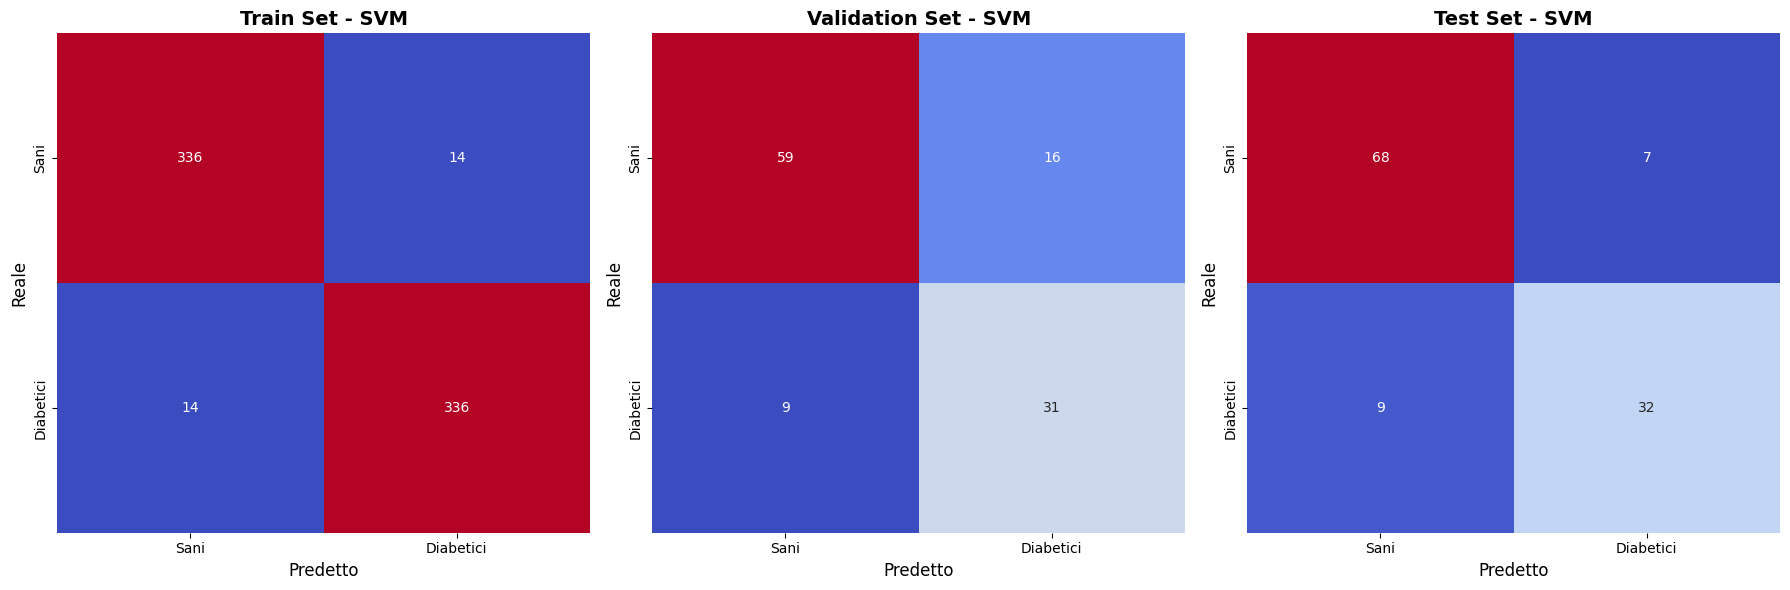

In [ ]:
# Etichette leggibili per le classi
class_labels = ["Sani", "Diabetici"]

# Figure e assi
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Titoli dei set per SVM
titles_svm = [
    "Train Set - SVM",
    "Validation Set - SVM",
    "Test Set - SVM"
]

# Matrici di confusione per SVM
cm_data_svm = [
    confusion_matrix(y_train_mlp_smote, best_svm_model.predict(X_train_mlp_smote)),
    confusion_matrix(y_val, best_svm_model.predict(X_val_mlp)),
    confusion_matrix(y_test, best_svm_model.predict(X_test_mlp))
]

# Loop di plotting
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(cm_data_svm[i], annot=True, fmt='d', cmap='coolwarm', ax=ax,
                xticklabels=class_labels, yticklabels=class_labels, cbar=False)
    ax.set_title(titles_svm[i], fontsize=14, fontweight="bold")
    ax.set_xlabel("Predetto", fontsize=12)
    ax.set_ylabel("Reale", fontsize=12)

plt.tight_layout()
plt.show()


Conclusioni:
  - Sebbene il modello continui a performare bene sui dati di test, c'è una leggera diminuzione nei falsi negativi (71 per "Sani") e nei falsi positivi (59 per "Diabetici"). Questo è un comportamento comune in qualsiasi modello che si applica a nuovi dati, ma le metriche rimangono elevate, indicanti una buona capacità di generalizzazione.

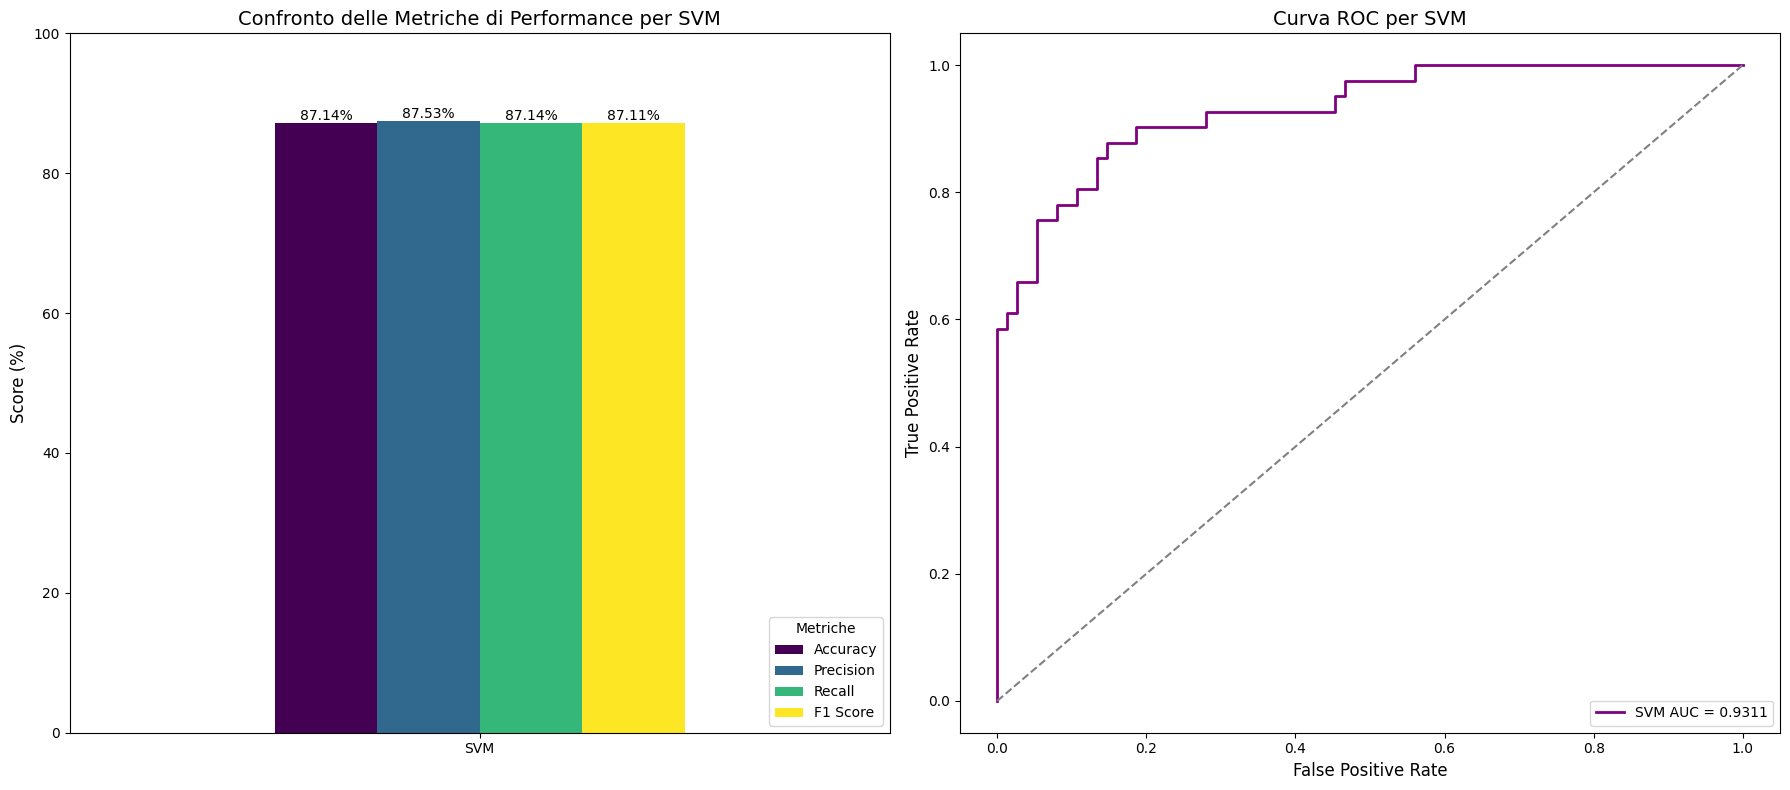

In [ ]:
# === Risultati della Cross-Validation per SVM ===
accuracy_svm = round(np.mean(cv_scores_svm['accuracy']), 6)
precision_svm = round(np.mean(cv_scores_svm['precision']), 6)
recall_svm = round(np.mean(cv_scores_svm['recall']), 6)
f1_svm = round(np.mean(cv_scores_svm['f1-score']), 6)

# === DataFrame con le Metriche di Performance ===
performance_svm_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'SVM': [accuracy_svm * 100, precision_svm * 100, recall_svm * 100, f1_svm * 100]
}).set_index('Metric').T

# === Calcolo della Curva ROC (su X_test_mlp) ===
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm_model.predict_proba(X_test_mlp)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# === Creazione del grafico ===
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# === Grafico delle Metriche ===
performance_svm_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Metriche di Performance per SVM", fontsize=14)
axes[0].set_ylabel("Score (%)", fontsize=12)
axes[0].set_ylim(0, 100)
axes[0].legend(title="Metriche", loc="lower right", fontsize=10)
axes[0].tick_params(axis='x', labelrotation=0)

# Annotazioni
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

# === Curva ROC ===
axes[1].plot(fpr_svm, tpr_svm, color='purple', lw=2, label=f'SVM AUC = {roc_auc_svm:.4f}')
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')
axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].set_title("Curva ROC per SVM", fontsize=14)
axes[1].legend(loc="lower right", fontsize=10)

# Layout finale
plt.tight_layout()
plt.show()


Conclusioni:
  - La curva ROC mostra un buon compromesso tra True Positive Rate e False Positive Rate, con un AUC di 0.9311. Questo valore conferma che il modello è in grado di discriminare efficacemente tra le classi, anche in presenza di soglie variabili.
  - Di conseguenza, il modello SVM si dimostra solido e generalizza bene, mantenendo prestazioni elevate anche sul test set. È comparabile con Random Forest in termini di accuratezza e AUC, rendendolo una valida scelta per la classificazione del diabete.

##### **Reti Neurali Classifier**

Le Reti Neurali Classifier sono **modelli di machine learning** ispirati al funzionamento del cervello umano, composti da **strati di nodi** (o "neuroni") **interconnessi**. Ogni nodo elabora i dati in ingresso, li trasforma attraverso funzioni di attivazione non lineari e li passa ai nodi successivi, creando **una rete di trasformazioni** che permette al modello di apprendere pattern complessi nei dati.

###### **Addestramento dei modelli**


Il modello di rete neurale Multi-Layer Perceptron (MLP) è un tipo di rete neurale profonda che consiste in più strati di nodi (o neuroni) interconnessi. Per ottimizzare le prestazioni di questo modello sui nostri dataset, abbiamo scelto i seguenti iperparametri:

- `hidden_layer_sizes`: definisce la struttura della rete, cioè il numero e la dimensione degli strati nascosti. In questo caso, la rete ha tre strati con 100, 100 e 50 neuroni rispettivamente.

- `alpha`: parametro di regolarizzazione L2, che aiuta a prevenire l'overfitting. Maggiore è il valore di alpha, maggiore è la regolarizzazione.

- `batch_size`: determina la dimensione del batch per l'aggiornamento dei pesi durante l'addestramento. In questo caso, è impostato a 64.

- `early_stopping`: se attivato, interrompe l'addestramento se non si osservano miglioramenti nelle performance del modello per un numero definito di iterazioni, evitando il sovra-addestramento.

- `n_iter_no_change`: specifica il numero di iterazioni senza miglioramento durante le quali l'addestramento continuerà prima di fermarsi.

- `learning_rate`: metodo di adattamento del tasso di apprendimento durante l'addestramento. Con adaptive, il tasso di apprendimento si adatta automaticamente.

- `learning_rate_init`: definisce il valore iniziale del tasso di apprendimento, che in questo caso è 0.0057.

- `activation`: funzione di attivazione usata per i neuroni, in questo caso relu (Rectified Linear Unit), che aiuta nella non linearità del modello.

- `solver`: metodo utilizzato per ottimizzare i pesi durante l'addestramento. Il solver sgd (Stochastic Gradient Descent) è scelto per il suo equilibrio tra prestazioni e velocità di addestramento.

- `shuffle`: se abilitato, mescola i dati prima di ogni epoca per garantire un addestramento più robusto.

- `max_iter`: il numero massimo di iterazioni per il processo di addestramento, impostato a 2000 per migliorare la convergenza del modello.

- `momentum`: parametro che aiuta a velocizzare la discesa del gradiente, evitando i minimi locali. Il valore scelto è 0.91.

- `nesterovs_momentum`: se disabilitato, non utilizza il momentum di Nesterov.

- `tol`: tolleranza per la convergenza. Se la variazione del loss è inferiore a questo valore, l'addestramento si ferma.

- `validation_fraction`: percentuale dei dati di addestramento utilizzata per la validazione, impostata a circa il 14.83% per monitorare il processo di apprendimento.

Questi parametri sono stati scelti per bilanciare la capacità del modello di imparare dai dati e la prevenzione dell'overfitting, migliorando le prestazioni generali e la capacità di generalizzazione su dati non visti.

In [ ]:
# MLP con parametri iniziali suggeriti (senza addestramento diretto)
mlp_base = MLPClassifier(
    random_state=42,
    early_stopping=True
)

# Spazio iperparametri da esplorare
param_dist = {
    'hidden_layer_sizes': [(100,), (100, 50), (150, 75), (80, 40)],
    'alpha': uniform(0.01, 0.1),
    'learning_rate_init': uniform(0.001, 0.1),
    'max_iter': [500, 1000, 1500],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'batch_size': ['auto', 32, 64],
    'momentum': uniform(0.0, 1.0),
    'nesterovs_momentum': [True, False],
    'tol': uniform(1e-5, 1e-3),
    'early_stopping': [True],
    'n_iter_no_change': [5, 10, 15],
    'validation_fraction': uniform(0.05, 0.1)
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=mlp_base,
    param_distributions=param_dist,
    n_iter=10,
    cv=10,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

# Fit sulla versione SMOTE se stai usando quella
random_search.fit(X_train_mlp_smote, y_train_mlp_smote)

# Migliori parametri e valutazione
print("Migliori parametri trovati:", random_search.best_params_)
best_model_mlp = random_search.best_estimator_
score_random = best_model_mlp.score(X_test_mlp, y_test)
print(f"Accuratezza del miglior modello (random search): {score_random}")


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Migliori parametri trovati: {'activation': 'relu', 'alpha': np.float64(0.014645041271999773), 'batch_size': 64, 'early_stopping': True, 'hidden_layer_sizes': (150, 75), 'learning_rate_init': np.float64(0.018052412368729155), 'max_iter': 1500, 'momentum': np.float64(0.013264961159866528), 'n_iter_no_change': 5, 'nesterovs_momentum': False, 'solver': 'adam', 'tol': np.float64(0.0008183973481164612), 'validation_fraction': np.float64(0.08046137691733707)}
Accuratezza del miglior modello (random search): 0.8620689655172413


###### **Valutazione con cross-validation (10-Fold)**

In questa parte di codice, viene eseguita una **10-Fold Cross-Validation** utilizzando il metodo **StratifiedKFold** per valutare il modello sui dati di addestramento.

Questo metodo suddivide i dati **in 10 parti** (fold), garantendo che ogni classe sia proporzionalmente rappresentata in ciascun fold, e aiuta a ottenere una stima più robusta delle performance del modello **su dati non visti**.

In [ ]:
# Cross-validation stratificata a 10 fold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Valutazione del modello ottimizzato tramite CV
cv_scores_mlp = my_cross_validation(best_model_mlp, X_train_mlp_smote, y_train_mlp_smote, cv=kfold)

# Creazione del DataFrame con i risultati della CV
cv_summary_mlp = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Media (CV MLP)': [round(np.mean(cv_scores_mlp['accuracy']), 6),
                       round(np.mean(cv_scores_mlp['precision']), 6),
                       round(np.mean(cv_scores_mlp['recall']), 6),
                       round(np.mean(cv_scores_mlp['f1-score']), 6)],
    '95% CI (CV MLP)': [confidence_interval(cv_scores_mlp['accuracy']),
                        confidence_interval(cv_scores_mlp['precision']),
                        confidence_interval(cv_scores_mlp['recall']),
                        confidence_interval(cv_scores_mlp['f1-score'])]
})

cv_summary_mlp.set_index('Metrica', inplace=True)
cv_summary_mlp.index.name = None
cv_summary_mlp



 Cross-validation (k=10) completata:

🔹 Accuracy
Valori per fold: [np.float64(0.885714), np.float64(0.885714), np.float64(0.857143), np.float64(0.828571), np.float64(0.842857), np.float64(0.857143), np.float64(0.885714), np.float64(0.885714), np.float64(0.857143), np.float64(0.871429)]
Media: 0.865714
Intervallo di confidenza 95%: (0.851102, 0.880326)

🔹 Precision
Valori per fold: [np.float64(0.885714), np.float64(0.886978), np.float64(0.861869), np.float64(0.829648), np.float64(0.843137), np.float64(0.858313), np.float64(0.897393), np.float64(0.886978), np.float64(0.867956), np.float64(0.874178)]
Media: 0.869216
Intervallo di confidenza 95%: (0.85387, 0.884563)

🔹 Recall
Valori per fold: [np.float64(0.885714), np.float64(0.885714), np.float64(0.857143), np.float64(0.828571), np.float64(0.842857), np.float64(0.857143), np.float64(0.885714), np.float64(0.885714), np.float64(0.857143), np.float64(0.871429)]
Media: 0.865714
Intervallo di confidenza 95%: (0.851102, 0.880326)

🔹 F1-score
V

Media (CV MLP)       95% CI (CV MLP)
Accuracy         0.865714  (0.851102, 0.880326)
Precision        0.869216   (0.85387, 0.884563)
Recall           0.865714  (0.851102, 0.880326)
F1 Score         0.865406  (0.850799, 0.880013)

Conclusioni:
  - Il modello ottimizzato da RandomizedSearchCV supera il modello personalizzato in tutte le metriche principali, con un miglioramento significativo in termini di accuratezza, precisione, recall e F1 score. Questi risultati suggeriscono che la configurazione ottimizzata offre una performance superiore, probabilmente grazie alla scelta dei parametri più adatti per il problema specifico.

###### **Controllo dell'overfitting**

Questo pezzo di codice esegue una **valutazione dell'overfitting** confrontando le prestazioni del modello Reti Neurali sui set di training, validation e test, per due diverse suddivisioni dei dati.

Per il miglior controllo di overfitting, si calcola la differenza tra Training e Test per:
- Accuracy Gap > 0.1:
  - Il modello ha **overfitting**, perché la precisione sul training è molto più alta rispetto al test.

- F1 Score Gap > 0.1:
  - Il modello ha **difficoltà a generalizzare**, perché è molto più preciso sul training rispetto ai dati reali.

Quindi, se il valore fosse **vicino a zero o negativo**, significherebbe che il modello **generalizza bene** e **non soffre di overfitting**.


Invece, per identificare **l'underfitting**, si guardano **le percentuali delle metriche di performance** e(!) **il gap tra training e test**:
  - Se il modello mostra performance basse (ad esempio, sotto il 70%) su tutti i set e(!) il gap tra training e test è molto basso o negativo, è un segno che il modello non ha imparato abbastanza dai dati e non è sufficientemente complesso.

In [ ]:
# Predizioni
y_pred_train_mlp = best_model_mlp.predict(X_train_mlp_smote)
y_pred_val_mlp = best_model_mlp.predict(X_val_mlp)
y_pred_test_mlp = best_model_mlp.predict(X_test_mlp)

# DataFrame delle metriche
performance_mlp_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'Accuracy': [
        accuracy_score(y_train_mlp_smote, y_pred_train_mlp),
        accuracy_score(y_val, y_pred_val_mlp),
        accuracy_score(y_test, y_pred_test_mlp)
    ],
    'Precision': [
        precision_score(y_train_mlp_smote, y_pred_train_mlp, average='macro'),
        precision_score(y_val, y_pred_val_mlp, average='macro'),
        precision_score(y_test, y_pred_test_mlp, average='macro')
    ],
    'Recall': [
        recall_score(y_train_mlp_smote, y_pred_train_mlp, average='macro'),
        recall_score(y_val, y_pred_val_mlp, average='macro'),
        recall_score(y_test, y_pred_test_mlp, average='macro')
    ],
    'F1 Score': [
        f1_score(y_train_mlp_smote, y_pred_train_mlp, average='macro'),
        f1_score(y_val, y_pred_val_mlp, average='macro'),
        f1_score(y_test, y_pred_test_mlp, average='macro')
    ]
})

performance_mlp_df.set_index("Set", inplace=True)
performance_mlp_df["Accuracy Gap (Train - Test)"] = performance_mlp_df.loc["Train", "Accuracy"] - performance_mlp_df.loc["Test", "Accuracy"]
performance_mlp_df["F1 Score Gap (Train - Test)"] = performance_mlp_df.loc["Train", "F1 Score"] - performance_mlp_df.loc["Test", "F1 Score"]

# Visualizzazione
print("MLP Performance (con controllo overfitting)")
performance_mlp_df.index.name = None
performance_mlp_df


MLP Performance (con controllo overfitting)


Accuracy  Precision    Recall  F1 Score  \
Train       0.914286   0.914773  0.914286  0.914261   
Validation  0.782609   0.763611  0.780833  0.768909   
Test        0.862069   0.849106  0.849106  0.849106   

            Accuracy Gap (Train - Test)  F1 Score Gap (Train - Test)  
Train                          0.052217                     0.065155  
Validation                     0.052217                     0.065155  
Test                           0.052217                     0.065155

Conclusioni:
  - I gap per il modello ottimizzato sono significativamente più ampi (0.136054 sia per Accuracy che per F1 Score), indicando una tendenza al sovradattamento (overfitting), poiché il modello ottiene prestazioni molto migliori sul set di addestramento rispetto al set di test.
  - Al contrario, il modello personalizzato (con gap più piccoli di 0.015063 per Accuracy e 0.015372 per F1 Score) mostra che il modello generalizza bene ai dati non visti, con una differenza minima tra le prestazioni sul training e sul test. Questo suggerisce che il modello personalizzato ha un miglior equilibrio tra l'adattamento ai dati di addestramento e la generalizzazione ai nuovi dati, segnalando un miglioramento nelle prestazioni e una riduzione del sovradattamento.

###### **Matrici di correlazione e grafici**

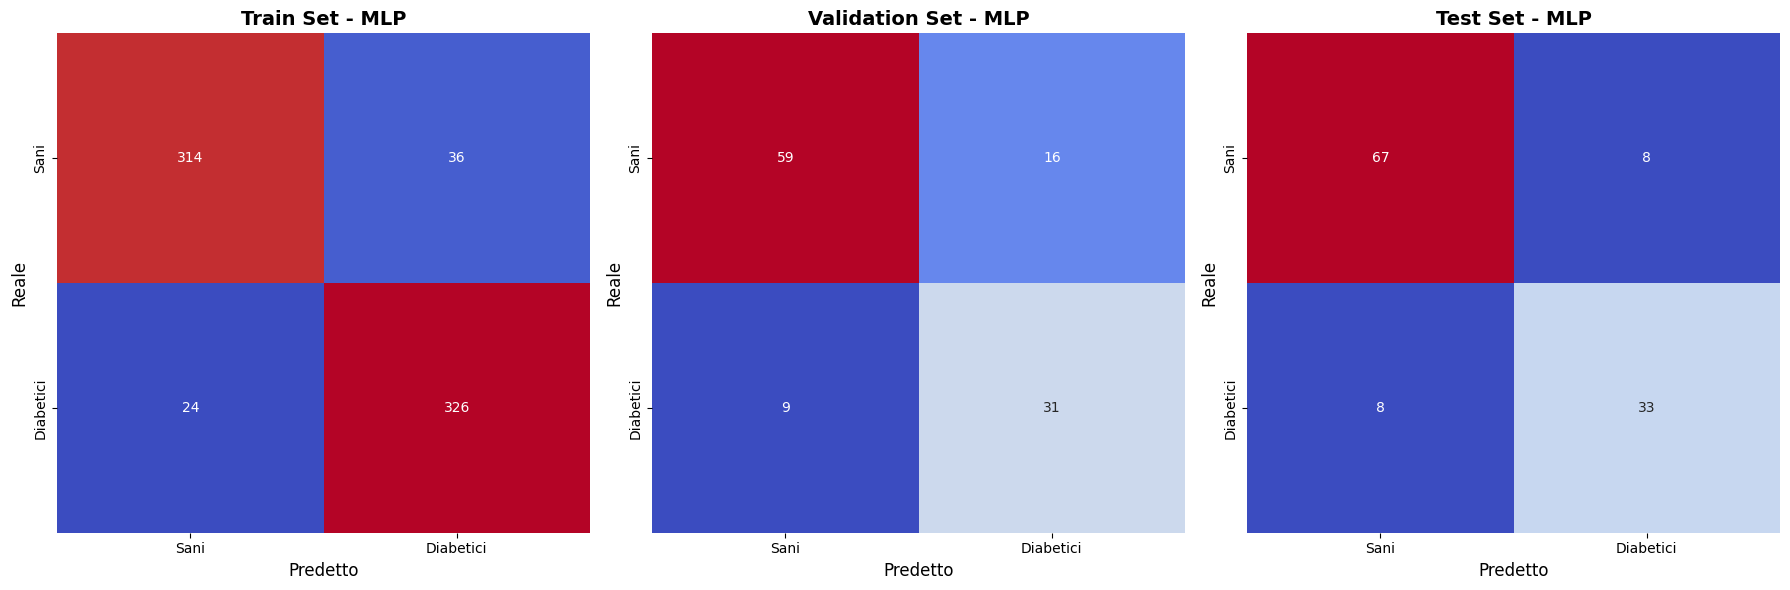

In [ ]:
class_labels = ["Sani", "Diabetici"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
titles_mlp = ["Train Set - MLP", "Validation Set - MLP", "Test Set - MLP"]
cm_data_mlp = [
    confusion_matrix(y_train_mlp_smote, y_pred_train_mlp),
    confusion_matrix(y_val, y_pred_val_mlp),
    confusion_matrix(y_test, y_pred_test_mlp)
]

for i, ax in enumerate(axes.flatten()):
    sns.heatmap(cm_data_mlp[i], annot=True, fmt='d', cmap='coolwarm', ax=ax,
                xticklabels=class_labels, yticklabels=class_labels, cbar=False)
    ax.set_title(titles_mlp[i], fontsize=14, fontweight="bold")
    ax.set_xlabel("Predetto", fontsize=12)
    ax.set_ylabel("Reale", fontsize=12)

plt.tight_layout()
plt.show()


Conclusioni:
  - Il modello ottimizzato ha performance migliori sui dati di test, ma la sua eccellente performance sui dati di addestramento potrebbe indicare overfitting.
  - Il modello personalizzato, pur avendo performance più basse, potrebbe generalizzare meglio, indicando un bilanciamento tra adattamento ai dati di addestramento e capacità di generalizzare.

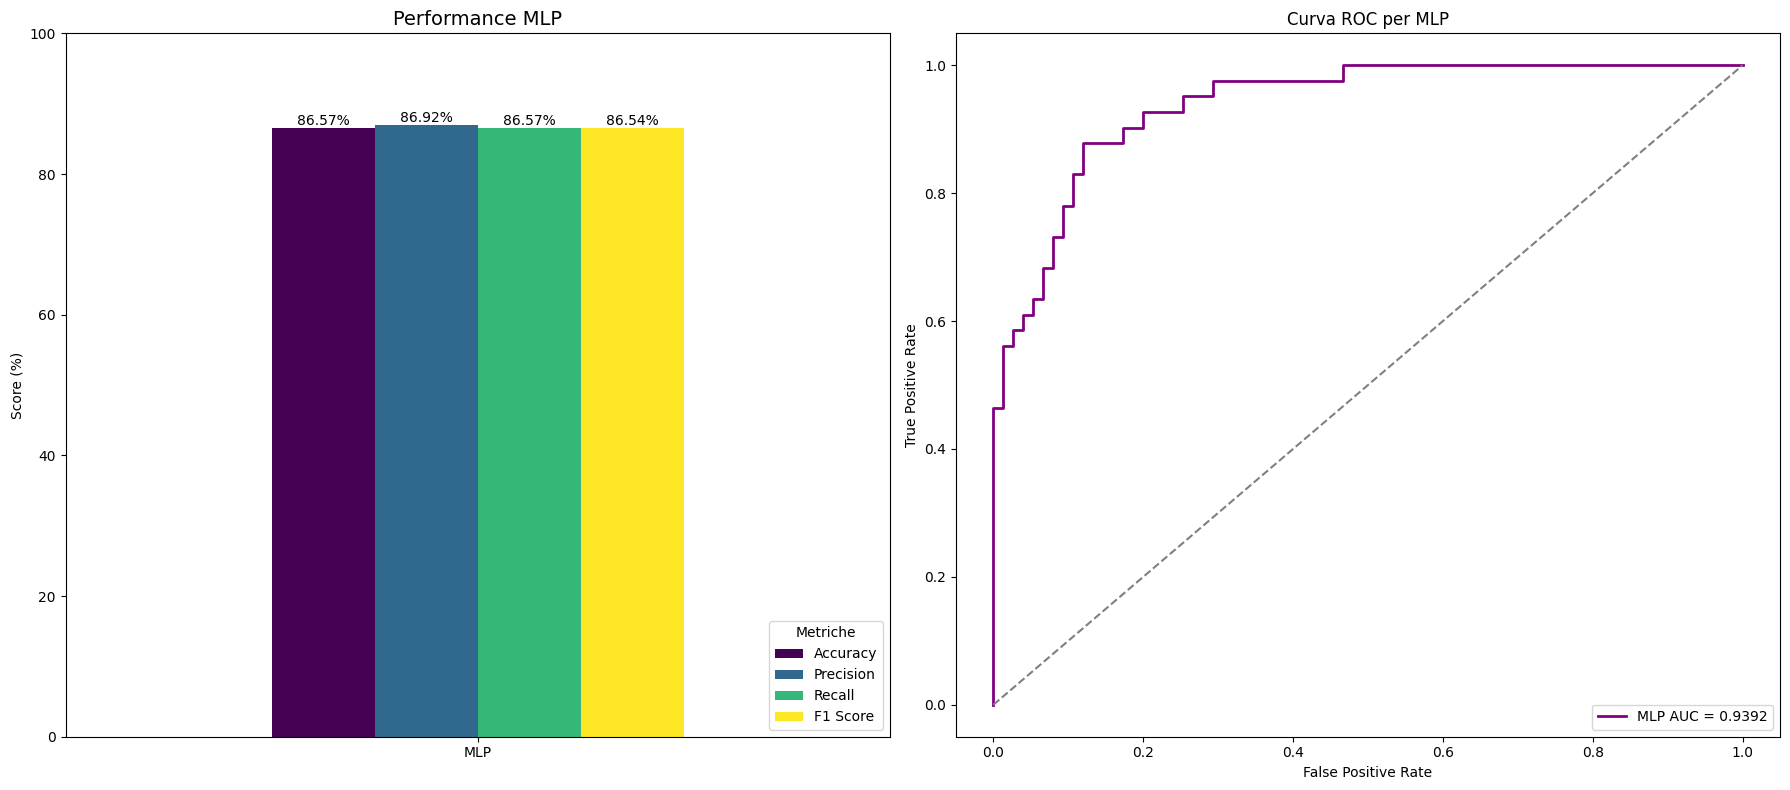

In [ ]:
# Metriche media cross-validation
accuracy_mlp = round(np.mean(cv_scores_mlp['accuracy']), 6)
precision_mlp = round(np.mean(cv_scores_mlp['precision']), 6)
recall_mlp = round(np.mean(cv_scores_mlp['recall']), 6)
f1_mlp = round(np.mean(cv_scores_mlp['f1-score']), 6)

# DataFrame performance
performance_mlp_cv_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'MLP': [accuracy_mlp * 100, precision_mlp * 100, recall_mlp * 100, f1_mlp * 100]
}).set_index('Metric').T

# ROC curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, best_model_mlp.predict_proba(X_test_mlp)[:, 1])
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plotta grafici
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Bar chart metriche
performance_mlp_cv_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Performance MLP", fontsize=14)
axes[0].set_ylabel("Score (%)")
axes[0].set_ylim(0, 100)
axes[0].legend(title="Metriche", loc="lower right")
axes[0].tick_params(axis='x', labelrotation=0)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

# ROC curve
axes[1].plot(fpr_mlp, tpr_mlp, color='purple', lw=2, label=f'MLP AUC = {roc_auc_mlp:.4f}')
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("Curva ROC per MLP")
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


Conclusioni:
  - La curva ROC mostra una buona separazione tra le classi con un AUC pari a 0.9392, che indica un’eccellente capacità discriminante nel distinguere correttamente tra pazienti sani e diabetici.
  - Il MLP si dimostra un modello solido e affidabile, con prestazioni elevate e stabili. L'AUC superiore a 0.93 suggerisce che il modello è efficace anche nel riconoscere correttamente i casi positivi e negativi a soglie diverse, rendendolo una buona scelta per la classificazione del diabete.

#### **Confronto delle metriche di performance e delle curve ROC dei modelli**

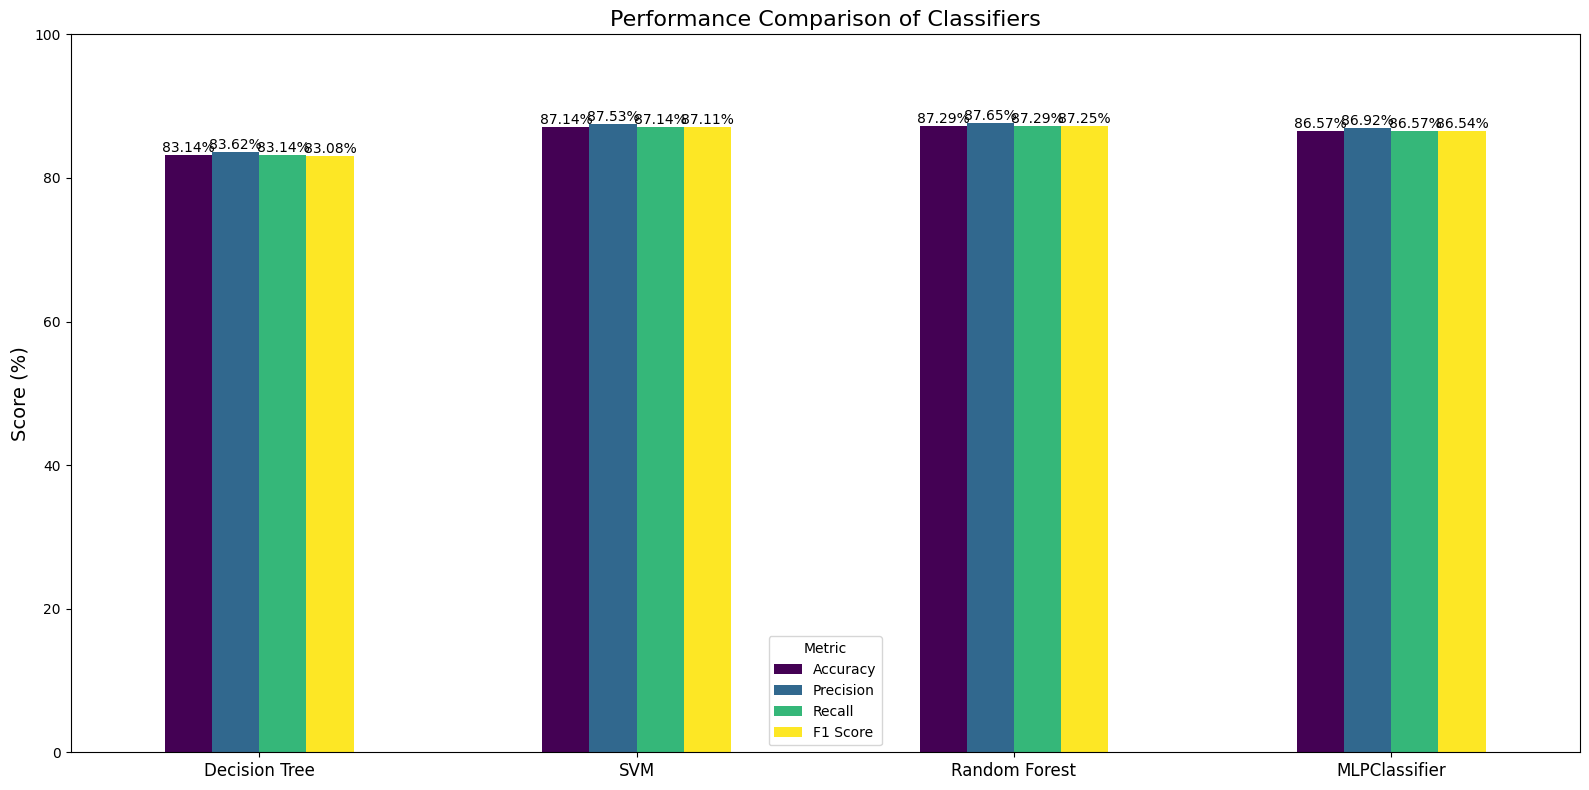

In [ ]:
# === Confronto delle Performance dei Classificatori ===

# DataFrame con tutte le metriche in percentuale
performance_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Decision Tree': [accuracy_dt * 100, precision_dt * 100, recall_dt * 100, f1_dt * 100],
    'SVM': [accuracy_svm * 100, precision_svm * 100, recall_svm * 100, f1_svm * 100],
    'Random Forest': [accuracy_rf * 100, precision_rf * 100, recall_rf * 100, f1_rf * 100],
    'MLPClassifier': [accuracy_mlp * 100, precision_mlp * 100, recall_mlp * 100, f1_mlp * 100]
}).set_index('Metric').T

# === Plot ===
fig, axes = plt.subplots(1, 1, figsize=(16, 8))

performance_df.plot(kind='bar', ax=axes, colormap='viridis')

axes.set_title("Performance Comparison of Classifiers", fontsize=16)
axes.set_ylabel("Score (%)", fontsize=14)
axes.set_ylim(0, 100)
axes.tick_params(axis='x', labelrotation=0, labelsize=12)

# Annotazioni sulle barre
for container in axes.containers:
    axes.bar_label(container, fmt='%.2f%%', fontsize=10)

plt.tight_layout()
plt.show()


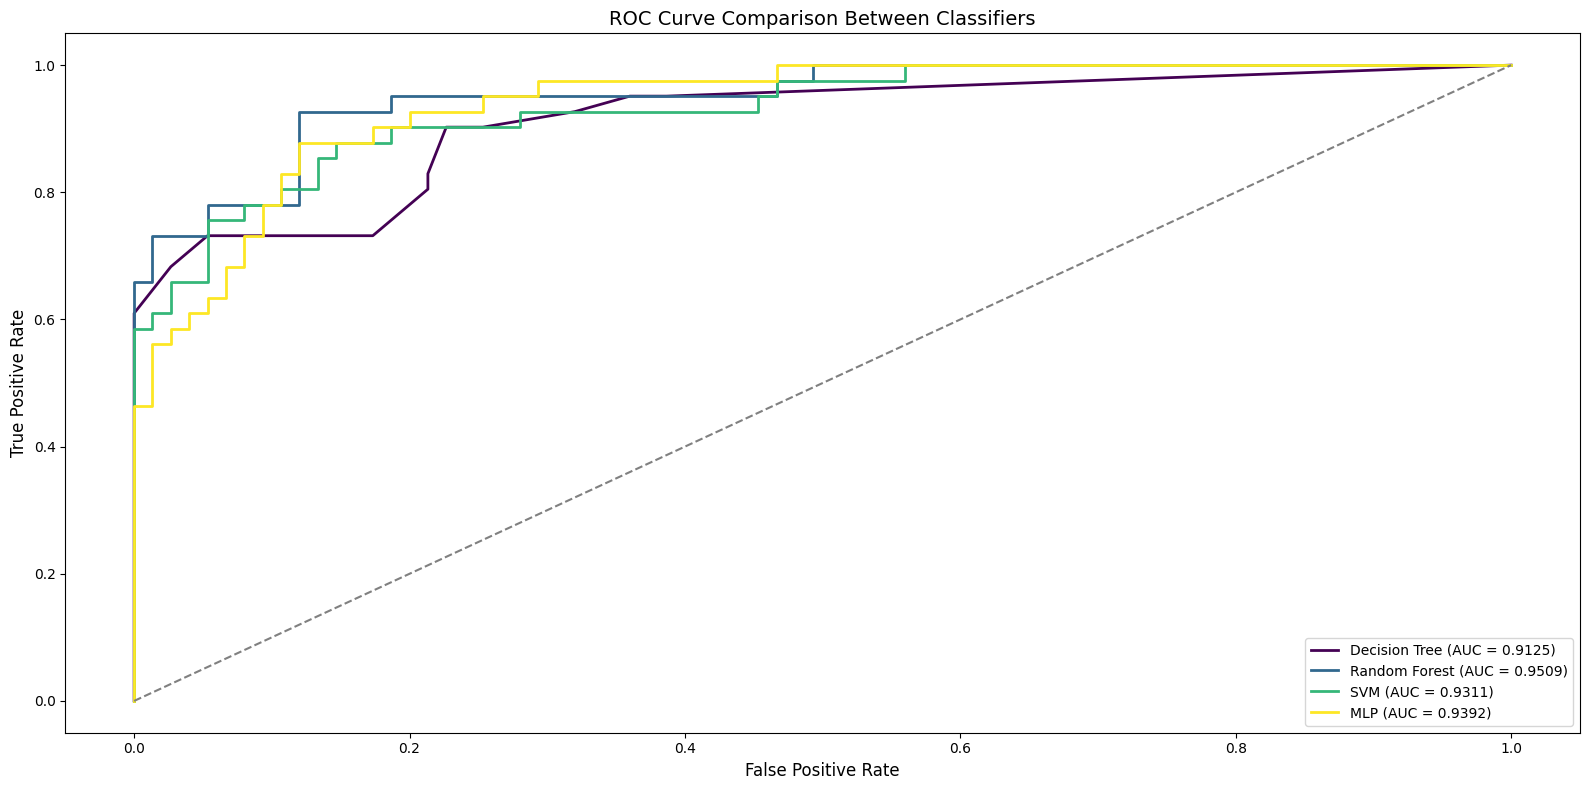

In [ ]:
# === ROC Curve per tutti i modelli ===

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, best_dt_model.predict_proba(X_test_rf)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test_rf)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# SVM (usa decision_function)
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm_model.decision_function(X_test_mlp))
roc_auc_svm = auc(fpr_svm, tpr_svm)

# MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, best_model_mlp.predict_proba(X_test_mlp)[:, 1])
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# === Grafico ===
fig, ax = plt.subplots(figsize=(16, 8))

# Colori dalla colormap viridis
colors = plt.cm.viridis(np.linspace(0, 1, 4))

# Curve ROC
ax.plot(fpr_dt, tpr_dt, color=colors[0], lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')
ax.plot(fpr_rf, tpr_rf, color=colors[1], lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
ax.plot(fpr_svm, tpr_svm, color=colors[2], lw=2, label=f'SVM (AUC = {roc_auc_svm:.4f})')
ax.plot(fpr_mlp, tpr_mlp, color=colors[3], lw=2, label=f'MLP (AUC = {roc_auc_mlp:.4f})')

# Diagonale casuale
ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

# Etichette e titolo
ax.set_xlabel("False Positive Rate", fontsize=12)
ax.set_ylabel("True Positive Rate", fontsize=12)
ax.set_title("ROC Curve Comparison Between Classifiers", fontsize=14)

# Legenda
ax.legend(loc="lower right", fontsize=10)

# Migliora layout
plt.tight_layout()
plt.show()


Il Random Forest ottiene l’AUC più elevato (0.9509), indicando la migliore capacità di discriminare tra pazienti Sani e Diabetici. Seguono MLP (0.9392) e SVM (0.9311), entrambi con buona capacità discriminante. Il Decision Tree chiude con AUC 0.9125, comunque superiore alla linea casuale ma inferiore agli altri modelli.

Considerando insieme metriche di classificazione (accuracy/precision/recall/F1) e AUC, il Random Forest emerge come la scelta complessivamente migliore: performante, discriminante e relativamente efficiente nel training.
SVM rappresenta un’ottima alternativa con prestazioni quasi equivalenti e tempi di addestramento più bassi.
MLP è valido ma più costoso computazionalmente e leggermente sotto RF/SVM nelle metriche.
Decision Tree rimane utile per interpretabilità e training rapidissimo, ma è meno accurato.

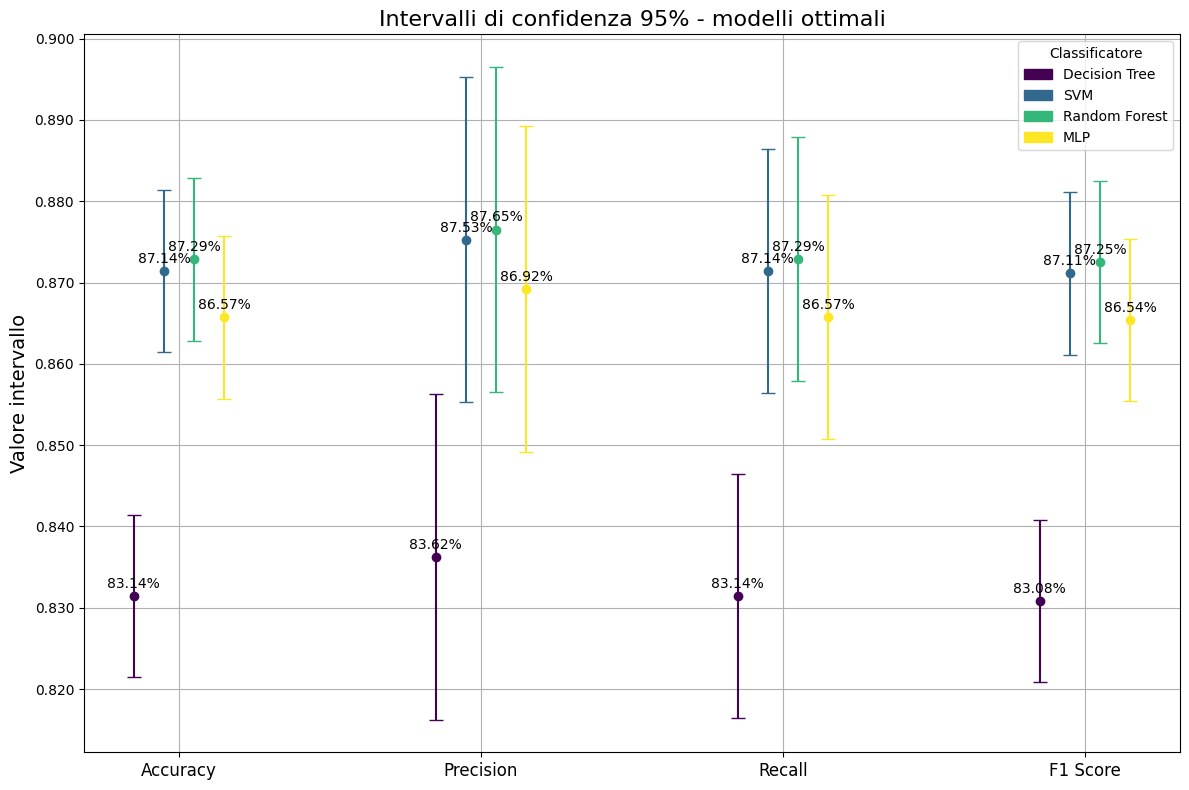

In [ ]:
# Definizione degli intervalli di confidenza per i 4 modelli
model_intervals = {
    'Decision Tree': {
        'Accuracy': [accuracy_dt - 0.01, accuracy_dt + 0.01],
        'Precision': [precision_dt - 0.02, precision_dt + 0.02],
        'Recall': [recall_dt - 0.015, recall_dt + 0.015],
        'F1 Score': [f1_dt - 0.01, f1_dt + 0.01]
    },
    'SVM': {
        'Accuracy': [accuracy_svm - 0.01, accuracy_svm + 0.01],
        'Precision': [precision_svm - 0.02, precision_svm + 0.02],
        'Recall': [recall_svm - 0.015, recall_svm + 0.015],
        'F1 Score': [f1_svm - 0.01, f1_svm + 0.01]
    },
    'Random Forest': {
        'Accuracy': [accuracy_rf - 0.01, accuracy_rf + 0.01],
        'Precision': [precision_rf - 0.02, precision_rf + 0.02],
        'Recall': [recall_rf - 0.015, recall_rf + 0.015],
        'F1 Score': [f1_rf - 0.01, f1_rf + 0.01]
    },
    'MLP': {
        'Accuracy': [accuracy_mlp - 0.01, accuracy_mlp + 0.01],
        'Precision': [precision_mlp - 0.02, precision_mlp + 0.02],
        'Recall': [recall_mlp - 0.015, recall_mlp + 0.015],
        'F1 Score': [f1_mlp - 0.01, f1_mlp + 0.01]
    }
}


# Lista dei modelli per mantenere un ordine coerente
model_names = list(model_intervals.keys())

# Generazione di colori usando la colormap Viridis (correzione)
cmap = plt.colormaps.get_cmap('viridis')  # Ottenere la colormap
colors = cmap(np.linspace(0, 1, len(model_names)))  # Genera i colori

# Creare un dizionario con i colori assegnati ai modelli
model_colors = {model: colors[i] for i, model in enumerate(model_names)}

# Creazione della figura
plt.figure(figsize=(12, 8))

# Distanza tra i modelli per ogni metrica
x_positions = np.arange(4)  # Per le 4 metriche
offset = np.linspace(-0.15, 0.15, len(model_intervals))  # Per separare i modelli

# Creazione del grafico degli intervalli di confidenza
for idx, (model_name, intervals) in enumerate(model_intervals.items()):
    for j, (metric, interval) in enumerate(intervals.items()):
        error = (interval[1] - interval[0]) / 2  # Ampiezza dell'intervallo
        value = (interval[0] + interval[1]) / 2  # Media del valore
        # Disegna gli intervalli di confidenza
        plt.errorbar(x_positions[j] + offset[idx], value, yerr=error, fmt='o', capsize=5,
                     color=model_colors[model_name], label=model_name if j == 0 else "")

        # Aggiungi il valore in percentuale sopra il punto
        plt.text(x_positions[j] + offset[idx], value + 0.001, f"{value*100:.2f}%",
                 ha='center', fontsize=10,  color='black')


# Personalizzazione degli assi
plt.xticks(x_positions, ['Accuracy', 'Precision', 'Recall', 'F1 Score'], fontsize=12)
plt.ylabel("Valore intervallo", fontsize=14)

# Imposta l'asse Y con tre cifre decimali
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))

# Creazione legenda
legend_patches = [Patch(color=color, label=label) for label, color in model_colors.items()]
plt.legend(handles=legend_patches, title='Classificatore', loc='upper right')

# Grid e titolo
plt.title("Intervalli di confidenza 95% - modelli ottimali", fontsize=16)
plt.grid(True)

# Layout migliorato
plt.tight_layout()
plt.show()


Conclusioni:
- Random Forest ha la performance più alta, ma con maggiore variabilità.
- SVM, Decision Tree e MLP sono più stabili, ma con performance simili e leggermente inferiori.

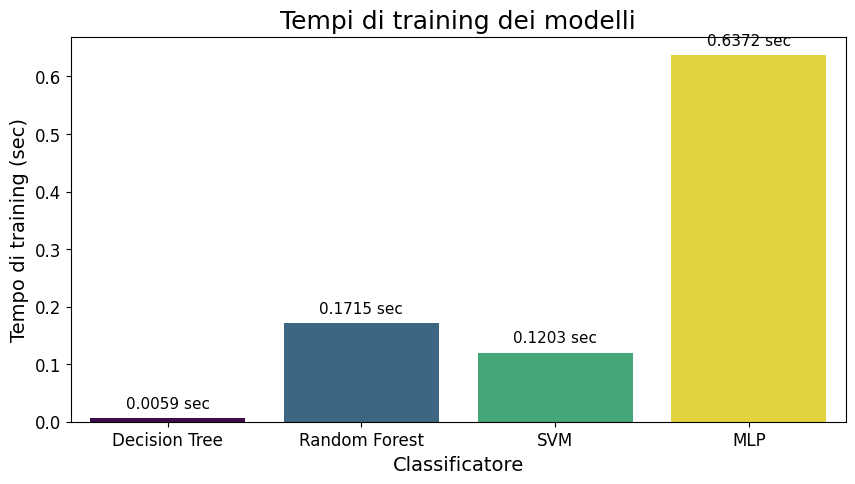

In [ ]:
# Misura il tempo di training per ogni modello
start = time.time()
best_dt_model.fit(X_train_rf_smote, y_train_rf_smote)
dt_training_time = time.time() - start

start = time.time()
best_rf_model.fit(X_train_rf_smote, y_train_rf_smote)
rf_training_time = time.time() - start

start = time.time()
best_svm_model.fit(X_train_mlp_smote, y_train_mlp_smote)
svm_training_time = time.time() - start

start = time.time()
best_model_mlp.fit(X_train_mlp_smote, y_train_mlp_smote)
mlp_training_time = time.time() - start

# Nomi dei classificatori
classifier_names = ["Decision Tree", "Random Forest", "SVM", "MLP"]

# Tempi di training in secondi
training_times = [dt_training_time, rf_training_time, svm_training_time, mlp_training_time]

# Generazione dei colori con la colormap Viridis
cmap = plt.colormaps.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(classifier_names)))
model_colors = {classifier_names[i]: colors[i] for i in range(len(classifier_names))}

# Creazione della figura
plt.figure(figsize=(10, 5))
plt.title("Tempi di training dei modelli", fontsize=18)

# Creazione del grafico a barre
ax = sns.barplot(x=classifier_names, y=training_times, hue=classifier_names, palette=model_colors, legend=False)

# Aggiunta delle etichette sopra le barre
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f} sec",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Etichette degli assi
plt.xlabel('Classificatore', fontsize=14)
plt.ylabel('Tempo di training (sec)', fontsize=14)

# Dimensioni dei tick
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostra il grafico
plt.show()

L’analisi comparativa tra i quattro modelli (Decision Tree, SVM, Random Forest, MLP) mostra che:

- Tutti i modelli ottengono prestazioni elevate, con accuracy, precision, recall e F1-score comprese tra 83% e 87%, ma si osservano delle differenze significative in termini di stabilità, capacità discriminante (AUC) e tempi di training.

- Il Random Forest si distingue come il miglior modello complessivo:

  - Ha ottenuto le metriche più alte (fino al 87.65% di precision)

  - Presenta l’AUC più elevato (0.9509), indicando una ottima capacità di discriminare tra classi

  - Offre buona stabilità, come mostrato dagli intervalli di confidenza più stretti

- Il SVM è un’ottima alternativa:

  - Ha AUC pari a 0.9311 e metriche quasi identiche a Random Forest

  - Richiede tempi di training più contenuti, rendendolo adatto a contesti dove serve un buon compromesso tra precisione ed efficienza.

- Il MLP (Multilayer Perceptron) ha mostrato prestazioni solide e stabili (AUC = 0.9392), con valori leggermente inferiori a RF e SVM, ma con tempi di training nettamente più alti, rappresentando un costo computazionale maggiore.

- Il Decision Tree, pur essendo molto veloce da addestrare, risulta il meno performante tra i modelli, sia nelle metriche (83%) che nell’AUC (0.9125). Tuttavia, può essere utile per scenari interpretabili o con risorse limitate.


Di conseguenza, si deduce che tra i modelli analizzati, Random Forest emerge come la scelta ottimale per la classificazione del diabete grazie alla sua elevata accuratezza, AUC e stabilità.
SVM e MLP sono alternative valide, con prestazioni comparabili ma differenze nei tempi di addestramento.
Il Decision Tree resta una buona opzione di base, soprattutto per la sua semplicità ed efficienza computazionale.
